## Load all necessary Libraries required

In [1]:
# Load libraries
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Load the dataset

After some research, we found a way to load the dataset from zipfile without extracting them manually. <br>
For more details please refer: [Zipfile](https://www.geeksforgeeks.org/working-zip-files-python/)

In [2]:
# Import the dataset - Dataset is in zip folder. Let's use zipfile library to download data directly

from zipfile import ZipFile
from io import BytesIO, StringIO
from urllib.request import urlopen

file = ZipFile(BytesIO("loan.zip"))
loan_csv = file.open("loan.csv")
loan = pd.read_csv(loan_csv,low_memory=False)

In [3]:
# Display top rows of the dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# Let's have a look at the dataset, their dimensions, data types
loan.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

In [5]:
# Check for types of values, missing values if any etc.
pd.options.display.float_format = '{:.2f}'.format
loan.describe(include = 'all')
# We have 39717 rows & 111 columns. From both the views we can clearly see missing values in the dataset

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717,39717,39717.00,39717,39717,37258,38642,39717,39717.00,39717,39717,39717,39717,39717,26777,39717,39706,39717,39717,39717.00,39717.00,39717,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39667,39717.00,39717,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39646,39717.00,1140,39715,39661.00,0.00,39717.00,39717,0.00,0.00,0.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39661.00,39717.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
unique,nan,nan,nan,nan,nan,2,371,nan,7,35,28820,11,5,nan,3,55,3,1,39717,26527,14,19615,823,50,nan,nan,526,nan,nan,nan,nan,nan,nan,1089,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,101,nan,2,106,nan,nan,nan,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,nan,nan,nan,36 months,10.99%,nan,B,B3,US Army,10+ years,RENT,nan,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt Consolidation,100xx,CA,nan,nan,Nov-98,nan,nan,nan,nan,nan,nan,0%,nan,f,nan,nan,nan,nan,nan,nan,nan,nan,nan,May-16,nan,Jun-16,May-16,nan,nan,nan,INDIVIDUAL,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,nan,nan,nan,29096,956,nan,12020,2917,134,8879,18899,nan,16921,2260,32950,39717,1,210,18641,2184,597,7099,nan,nan,370,nan,nan,nan,nan,nan,nan,977,nan,39717,nan,nan,nan,nan,nan,nan,nan,nan,nan,1256,nan,1125,10308,nan,nan,nan,39717,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,683131.91,850463.56,11219.44,10947.71,10397.45,NaN,NaN,324.56,NaN,NaN,NaN,NaN,NaN,68968.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.32,0.15,NaN,0.87,35.90,69.70,9.29,0.06,13382.53,NaN,22.09,NaN,51.23,50.99,12153.60,11

In total there are 39,717 rows & 111 columns in the loan dataset. We can clearly see the issue of **missing values** and don't know what any of the of the columns mean. There are few date columns like issue_d, last_payment_d etc. which are stored as objects. We won't be able to do any analysis, so these have to be converted to date data types.

# Understand & cleanse the data

Let's understand the description of columns in the dataset

In [6]:
# Before checking for missing values, let's have a look at column definitions
loan_description = pd.read_excel('Data_Dictionary.xlsx')
loan_description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


## Missing values

Let's start looking at missing values in each column and take percentage/count to understand them

In [7]:
# Let's have a look at missing values - how many are there & also get their percencentages
missing_values = pd.DataFrame((loan.isnull().sum()/len(loan))*100, columns = ['Missing%']).sort_values('Missing%',ascending = False)

In [8]:
# Get the count of columns which have missing values
missing_values[missing_values['Missing%'] != 0].count()

Missing%    68
dtype: int64

Out of 111 columns, 68 columns have missing values. Let's check their percentages

In [9]:
missing_values

,Missing%
verification_status_joint,100.00
annual_inc_joint,100.00
mo_sin_old_rev_tl_op,100.00
mo_sin_old_il_acct,100.00
bc_util,100.00
bc_open_to_buy,100.00
avg_cur_bal,100.00
acc_open_past_24mths,100.00
inq_last_12m,100.00
total_cu_tl,100.00


The percentage of missing data is high in few columns. So, lets discard if a column has a high percentage of missing values, as it probably will not be of much use. <br>
Let's remove all the columns which has completly missing values i.e. 100% . <br>

How many are there??

In [10]:
# As they are not going to add any value for our analysis, let's remove them
missing_values[missing_values['Missing%'] == 100].count()

Missing%    54
dtype: int64

In [11]:
# Drop the columns
loan = loan.drop(columns = list(missing_values[missing_values['Missing%'] == 100].index))

In [12]:
# Check the dataset once
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

## Format the date variables

In [13]:
loan['issue_d_mod'] = pd.to_datetime(loan['issue_d'], format = '%b-%y')
loan['earliest_cr_line_mod'] = pd.to_datetime(loan['earliest_cr_line'], format = '%b-%y')
loan['last_pymnt_d_mod'] = pd.to_datetime(loan['last_pymnt_d'], format = '%b-%y')
loan['last_credit_pull_d_mod'] = pd.to_datetime(loan['last_credit_pull_d'], format = '%b-%y')

In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 61 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

From the above dates, *issue_d* is the month which loan was funded. Let's get the Year, Month, day out of it and see if we can get any patterns out of it.

In [15]:
# Now let's create new features from date column
loan['issue_Year'] = loan['issue_d_mod'].dt.year
loan['issue_Month'] = loan['issue_d_mod'].dt.month
loan['issue_Day'] = loan['issue_d_mod'].dt.day
loan['issue_Day_Name'] = loan['issue_d_mod'].dt.day_name()

loan['ear_cr_ln_Year'] = loan['earliest_cr_line_mod'].dt.year

Next thing to cleanse is *Interest rate*. Currently it is stored as an object. We need to change it numeric to carry out any analysis.

In [16]:
loan['int_rate_mod'] = loan['int_rate'].str.replace('%','').astype('float64')

Next thing to cleanse is *revol_util*. Currently it is stored as an object. We need to change it numeric to carry out any analysis.

In [17]:
loan['revol_util_mod'] = loan['revol_util'].str.replace('%','').astype('float64')

If we have observed few variables have only one unique value. These type of variables doesn't add value. Let's have a look and drop them.

In [18]:
unique_values = pd.DataFrame(loan.nunique(), columns = ['count'])
unique_values[unique_values['count'] == 1]

,count
pymnt_plan,1
initial_list_status,1
collections_12_mths_ex_med,1
policy_code,1
application_type,1
acc_now_delinq,1
chargeoff_within_12_mths,1
delinq_amnt,1
tax_liens,1
issue_Day,1


In [19]:
# Drop the columns
loan = loan.drop(columns = list(unique_values[unique_values['count'] == 1].index))

The *id* & *member_id* variables are stored as numeric. We are not going to carry out any analysis as they are identifier columns. Let's change them to object type.

In [20]:
loan['id'] = loan['id'].astype('object')
loan['member_id'] = loan['member_id'].astype('object')

In [21]:
loan['member_id'].value_counts().sort_values(ascending = False).head()

458757     1
1048602    1
1030105    1
917517     1
786448     1
Name: member_id, dtype: int64

From the above we can infer that none of the members has taken multiple loans.

# Exploratory Data Analysis

The goal of EDA is to determine what our data can tell us!!! <br>
In this section, we make plots and find patterns, relationships etc. <br>

We will start with single variable plots. <br>
*loan_status* is our target variable and let's start with that

In [22]:
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

Text(0.5,1,'Loan Status Distribution')

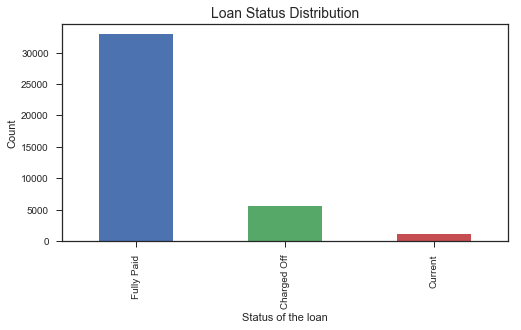

In [23]:
plt.figure(figsize=(8,4))
loan['loan_status'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Status of the loan')
plt.title('Loan Status Distribution',fontsize=14)

We can notice from the above that this is a imbalanced dataset means the value of one class is far less than the other. 
- ~14% of the members are classified as Charged Off or Defaulter
- ~83% memebers has Fully Paid i.e. applicant has paid the principal and the interest rate
- ~3% are is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed <br>

As per our problem statement, we need to understand the factors behind the defaulters <br>
Let's dive into the other variables

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

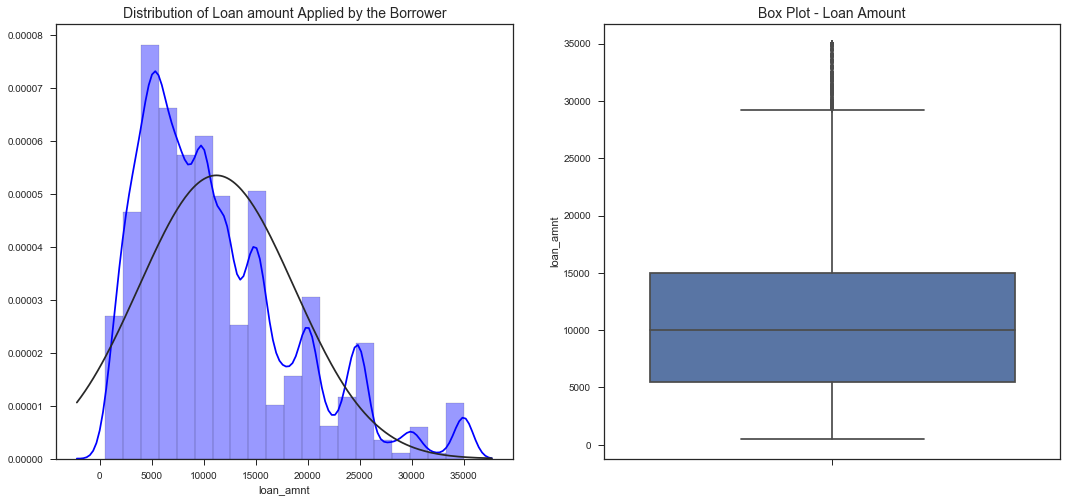

In [24]:
from scipy.stats import norm
from scipy import stats

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['loan_amnt'], hist = True, kde = True, bins = 20, ax=ax[0] , color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Distribution of Loan amount Applied by the Borrower',fontsize=14)
sns.boxplot(y = loan['loan_amnt'],ax=ax[1])
ax[1].set_title('Box Plot - Loan Amount',fontsize=14)

round(loan['loan_amnt'].describe(),2)

The above chart shows the distribution of loan amounts. From histogram plot, we can infer that the distribution is skewed to the right and has several modes. <br>
Most of the loans issued were in the range of 5,000 to 15,000 <br>
Can we normalize them? How will do it? - Let's apply log sscale to it & check the loan amount variable

Text(0.5,1,'Box Plot - Loan Amount (Normalized)')

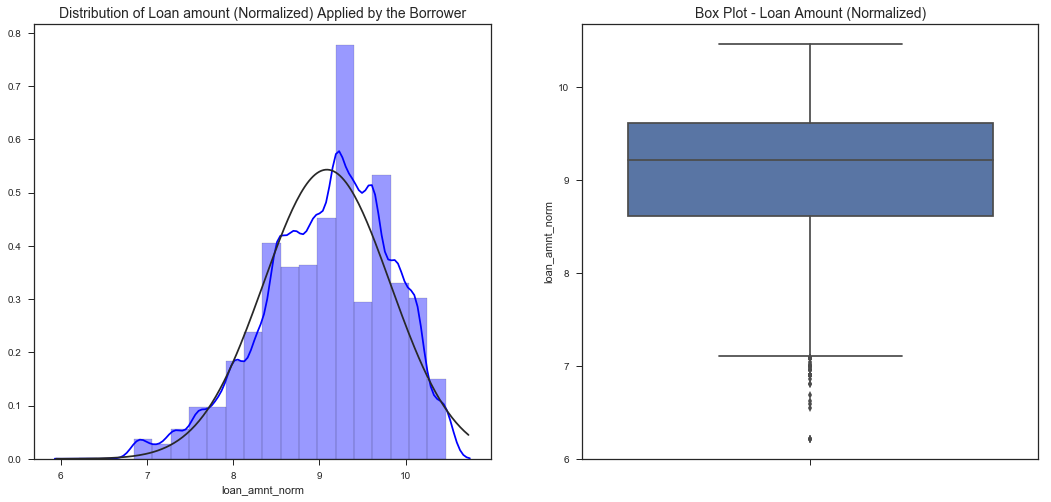

In [25]:
loan['loan_amnt_norm'] = np.log(loan['loan_amnt'])

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['loan_amnt_norm'], hist = True, kde = True, bins = 20, ax=ax[0] , color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Distribution of Loan amount (Normalized) Applied by the Borrower',fontsize=14)
sns.boxplot(y = loan['loan_amnt_norm'],ax=ax[1])
ax[1].set_title('Box Plot - Loan Amount (Normalized)',fontsize=14)

From the above plot, we can infer that after normalizing, loan amount almost followed Normal or Gaussian distribution.

What is funded amount means? It is the total amount committed to that loan at that point in time.

count   39717.00
mean    10947.71
std      7187.24
min       500.00
25%      5400.00
50%      9600.00
75%     15000.00
max     35000.00
Name: funded_amnt, dtype: float64

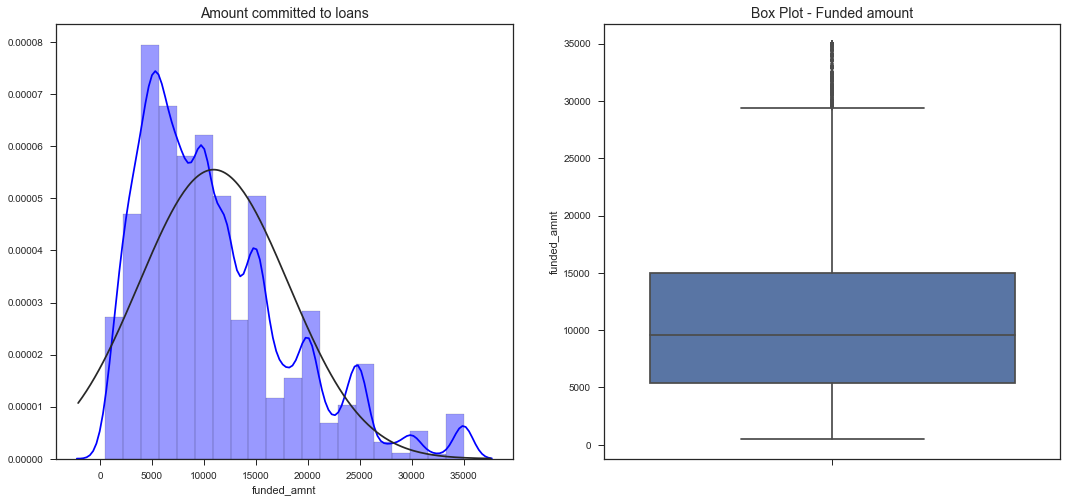

In [26]:
# Plot Funded amount
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['funded_amnt'], hist = True, kde = True, bins = 20, ax=ax[0] , color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Amount committed to loans',fontsize=14)
sns.boxplot(y = loan['funded_amnt'],ax=ax[1])
ax[1].set_title('Box Plot - Funded amount',fontsize=14)

round(loan['funded_amnt'].describe(),2)

Funded amount is slightly skwed to right. Let's normalize it & see if it follow a normal distribution

Text(0.5,1,'Box Plot - Funded amount (Normalized)')

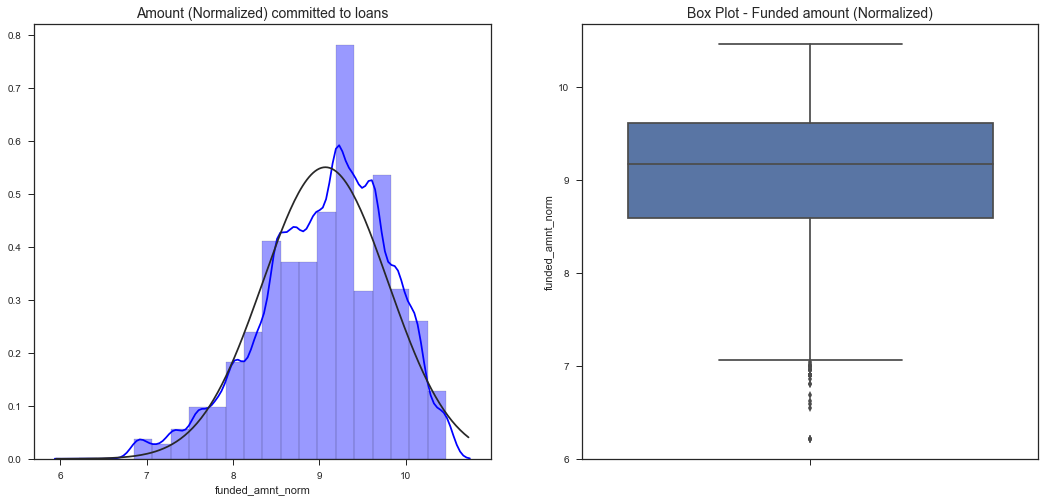

In [27]:
loan['funded_amnt_norm'] = np.log(loan['funded_amnt'])

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['funded_amnt_norm'], hist = True, kde = True, bins = 20, ax=ax[0] , color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Amount (Normalized) committed to loans',fontsize=14)
sns.boxplot(y = loan['funded_amnt_norm'],ax=ax[1])
ax[1].set_title('Box Plot - Funded amount (Normalized)',fontsize=14)

After applying log to funded amount, it almost follows a normal distribution

What is funded amount inv means? It is the total amount committed by investors to that loan at that point in time.

count   39717.00
mean    10397.45
std      7128.45
min         0.00
25%      5000.00
50%      8975.00
75%     14400.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

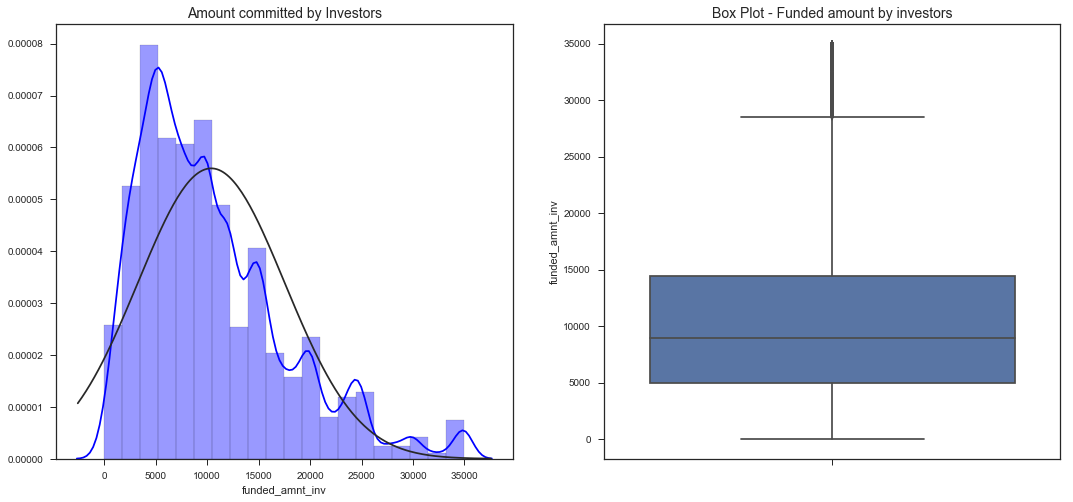

In [28]:
# Plot Funded amount
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['funded_amnt_inv'], hist = True, kde = True, bins = 20, ax=ax[0] , color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Amount committed by Investors',fontsize=14)
sns.boxplot(y = loan['funded_amnt_inv'],ax=ax[1])
ax[1].set_title('Box Plot - Funded amount by investors',fontsize=14)

round(loan['funded_amnt_inv'].describe(),2)

Funded amount investor is slightly skewed. In this case we won't be able to apply log as we can notice minimum value is '0' (log 0 is undefined)

All the 3 graphs show similar distribution i.e. loan applied by borrowers, amount committed to the loans and amount funded by investors have same distribution. <br>
Let's bring all three charts together. There seems to be a relationship between these variables

Text(0.5,1,'Amount committed by Investors')

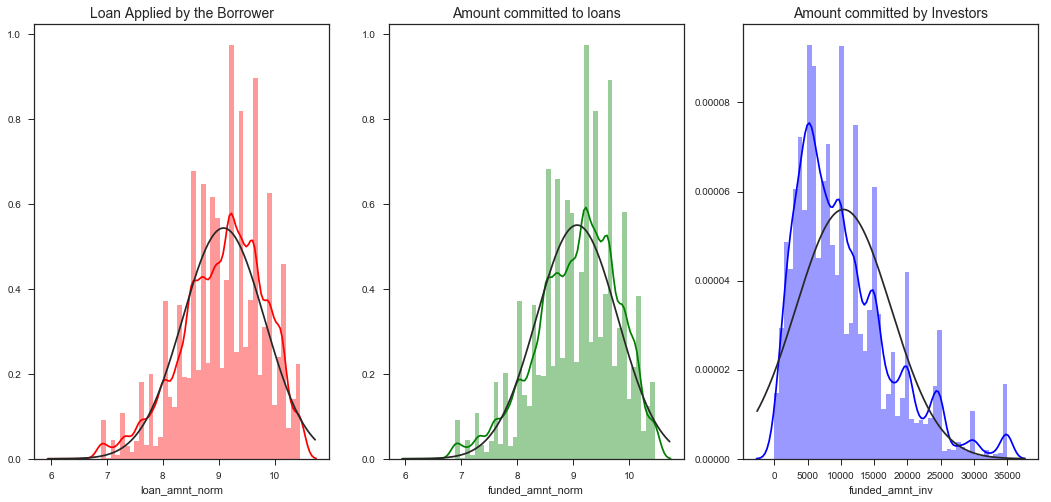

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))
sns.distplot(loan['loan_amnt_norm'],ax=ax[0], color = 'r', fit = norm)
ax[0].set_title('Loan Applied by the Borrower',fontsize=14)
sns.distplot(loan['funded_amnt_norm'],ax=ax[1], color = 'g', fit = norm)
ax[1].set_title('Amount committed to loans',fontsize=14)
sns.distplot(loan['funded_amnt_inv'],ax=ax[2], color = 'b', fit = norm)
ax[2].set_title('Amount committed by Investors',fontsize=14)

Text(0.5,1,'Term view')

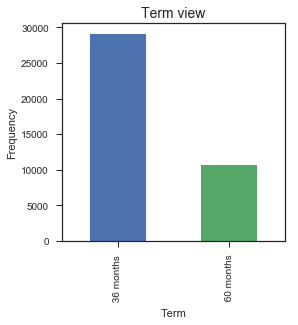

In [30]:
# Let's explore Term variable
plt.figure(figsize=(4,4))
loan['term'].value_counts().plot(kind = 'bar')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('Term view', fontsize = 14)

~73% of the loans are in 36 months term only

count   39717.00
mean       12.02
std         3.72
min         5.42
25%         9.25
50%        11.86
75%        14.59
max        24.59
Name: int_rate_mod, dtype: float64

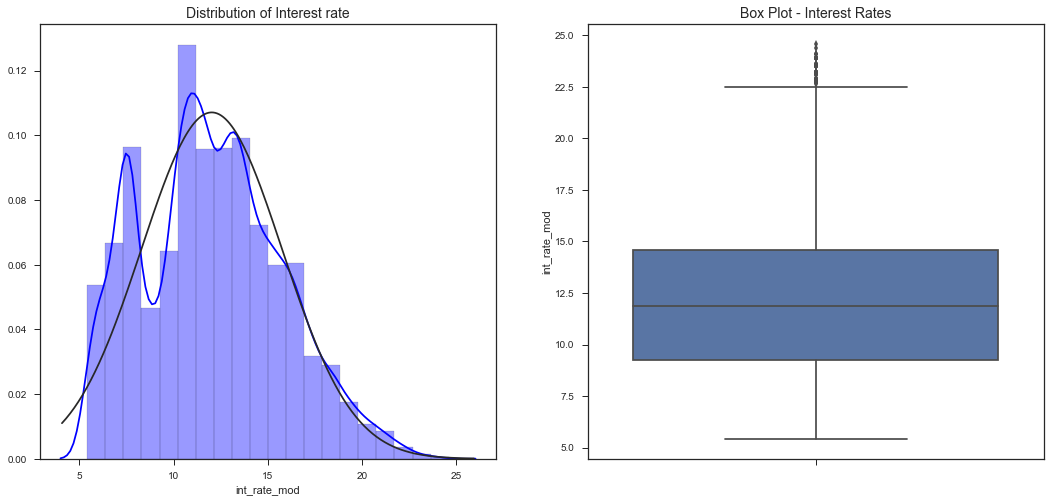

In [31]:
# Interest rate distribution
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['int_rate_mod'], hist = True, kde = True, bins = 20,ax=ax[0] , color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Distribution of Interest rate',fontsize=14)
sns.boxplot(y = loan['int_rate_mod'],ax=ax[1])
ax[1].set_title('Box Plot - Interest Rates',fontsize=14)
round(loan['int_rate_mod'].describe(),2)

The above chart shows the interest rate distribution. It almost follows the normal distribution. Most of the density is between 9% to 15%

count   39717.00
mean      324.56
std       208.87
min        15.69
25%       167.02
50%       280.22
75%       430.78
max      1305.19
Name: installment, dtype: float64

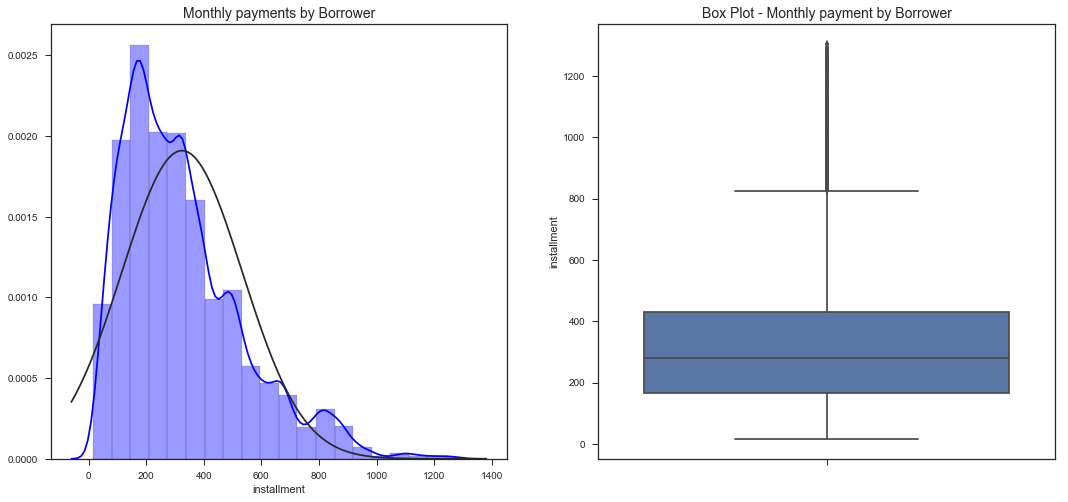

In [32]:
# Let's work with Installment variable - its the monthly payment owned by borrower
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['installment'], hist = True, kde = True, bins = 20,ax=ax[0] , color = 'blue', hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Monthly payments by Borrower',fontsize=14)
sns.boxplot(y = loan['installment'],ax=ax[1])
ax[1].set_title('Box Plot - Monthly payment by Borrower',fontsize=14)
round(loan['installment'].describe(),2)

Most of the installments are in the range of 180 to 420. And the data is skewed to right.

Text(0.5,1,'Box Plot - Monthly payment (Normalized) by Borrower')

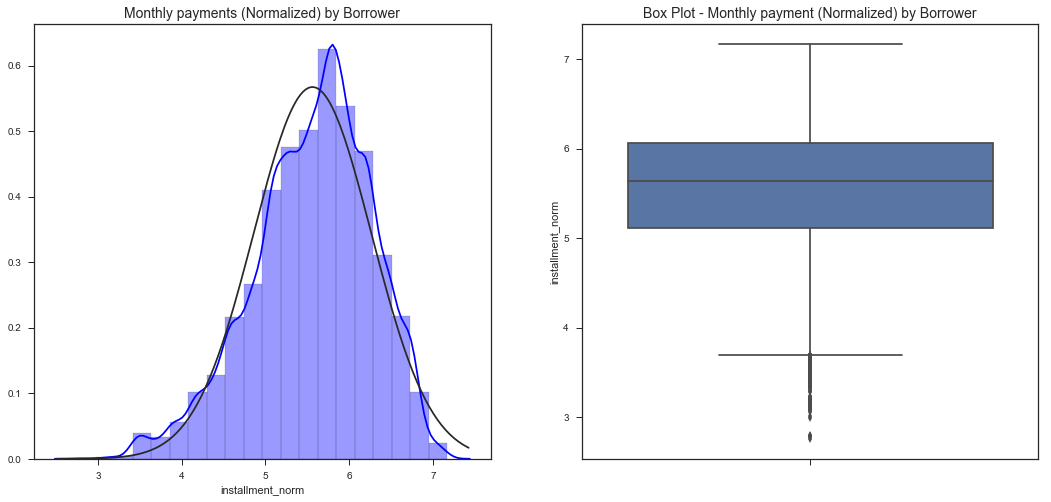

In [33]:
loan['installment_norm'] = np.log(loan['installment'])

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['installment_norm'], hist = True, kde = True, bins = 20,ax=ax[0] , color = 'blue', hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Monthly payments (Normalized) by Borrower',fontsize=14)
sns.boxplot(y = loan['installment_norm'],ax=ax[1])
ax[1].set_title('Box Plot - Monthly payment (Normalized) by Borrower',fontsize=14)

After normalizing the installment amount, it almost follows a normal distribution

B   0.30
A   0.25
C   0.20
D   0.13
E   0.07
F   0.03
G   0.01
Name: grade, dtype: float64

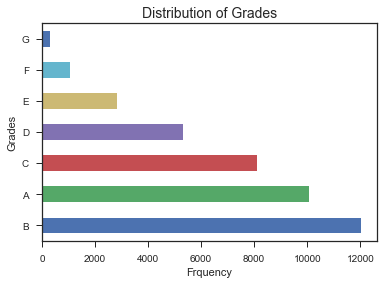

In [34]:
# Whate Grade provides us? 
loan['grade'].value_counts().plot(kind = 'barh')
plt.xlabel('Frquency')
plt.ylabel('Grades')
plt.title('Distribution of Grades', fontsize=14)

loan['grade'].value_counts()/len(loan)

These are the assigned grades by LC.
- ~30% loans are assigned to grade B
- ~25% loans are assigned to grade A
- followed by ~20% loans given to grade C

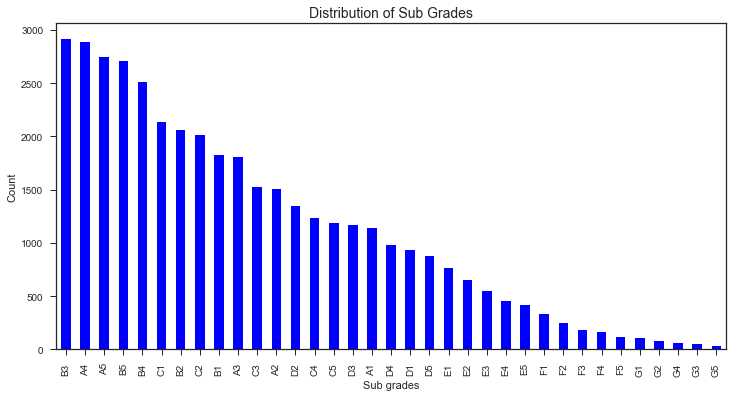

In [35]:
# From above we can sense most of the loans are in grades A, B & C.
# Now let's understand Sub_grade
#plt.figure(figsize=(12,6))
loan['sub_grade'].value_counts().plot.bar(color="b", figsize=(12,6))
plt.ylabel('Count')
plt.xlabel('Sub grades')
plt.title('Distribution of Sub Grades', fontsize = 14)
plt.show()

Within each grade, we have 5 sub grades i.e. 1,2,3,4 & 5. Need to understand what each sub grade is all about. We will explore about these in upcoming sections

In [36]:
# Let's check the emp title
loan['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

As per the data dictionary, Employer title replaces employer name. And we can see there are so many unique values. We won't be using this variable for the analysis.

In [37]:
# Let's check Employment length
loan['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

Text(0.5,1,'Loans distribution by employment years')

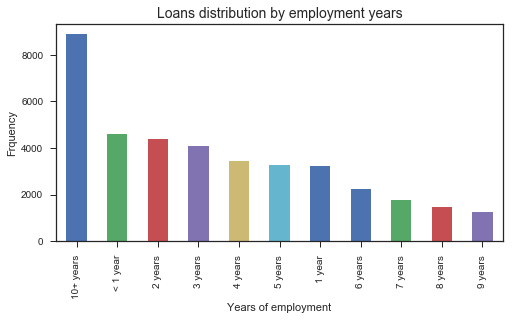

In [38]:
plt.figure(figsize=(8,4))
loan['emp_length'].value_counts().plot(kind = 'bar')
plt.xlabel('Years of employment')
plt.ylabel('Frquency')
plt.title('Loans distribution by employment years', fontsize = 14)

In [39]:
loan['emp_length'].isna().sum()

1075

There are few missing values (# 1075) in employment length. Most of the loans are given to 10+ years members. <br>
Let's change the type of this variable to numeric and fill blank values with < 1 year of experience, assuming the member hasn't worked or self employed etc to capture the details.

In [40]:
loan['emp_length_mod'] = loan['emp_length'].apply(lambda x: 0 if x == '< 1 year' else 
                                                  (1 if x == '1 year' else
                                                   (2 if x == '2 years' else
                                                    (3 if x == '3 years' else
                                                     (4 if x == '4 years' else
                                                      (5 if x == '5 years' else
                                                       (6 if x == '6 years' else
                                                        (7 if x == '7 years' else
                                                         (8 if x == '8 years' else
                                                          (9 if x == '9 years' else
                                                           (10 if x == '10+ years' else 0)
                                                          )
                                                         )
                                                        )
                                                       )
                                                      )
                                                     )
                                                    )
                                                   )
                                                  )
                                                 )

RENT       0.48
MORTGAGE   0.44
OWN        0.08
OTHER      0.00
NONE       0.00
Name: home_ownership, dtype: float64

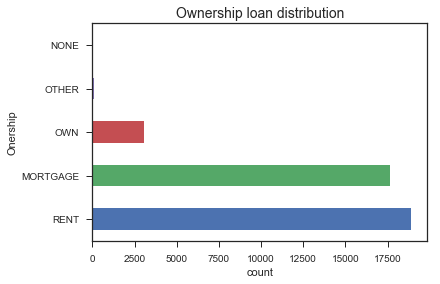

In [41]:
# Home ownership
loan['home_ownership'].value_counts().plot(kind = 'barh')
plt.xlabel('count')
plt.ylabel('Onership')
plt.title('Ownership loan distribution', fontsize = 14)

loan['home_ownership'].value_counts()/len(loan)

Majority of the loans are issued to members with Rent & Mortgage as ownership status.

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

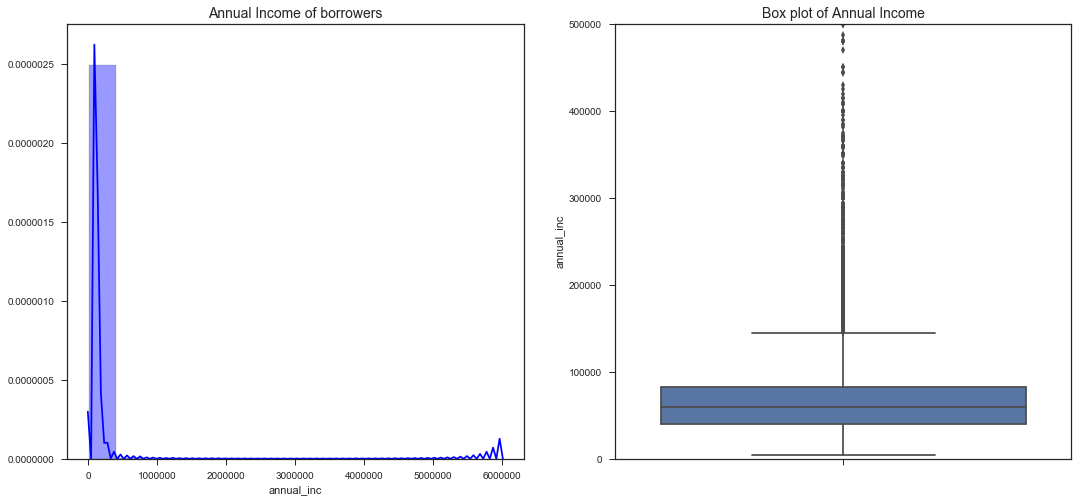

In [42]:
# What is Annual income telling us
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['annual_inc'], hist = True, kde = True, bins = 15, ax=ax[0], color = 'blue', hist_kws={'edgecolor':'black'})
ax[0].set_title('Annual Income of borrowers',fontsize=14)
sns.boxplot(y=loan['annual_inc'], ax=ax[1])
ax[1].set_title('Box plot of Annual Income',fontsize=14)
plt.ylim(0,500000)

loan['annual_inc'].describe()

The maximum value is 6,000,000 which is nearly 90 times more than mean value. There seems to be a outliers in Annual income. <br>
The data is skewed due to those one of large amounts. <br> 
To deal with outliers, we can delete those entries or transform or impute them. Let's use log to reduce the variation that the outlier values cause in the data set.

Text(0.5,1,'Box plot of Annual Income (Normalized)')

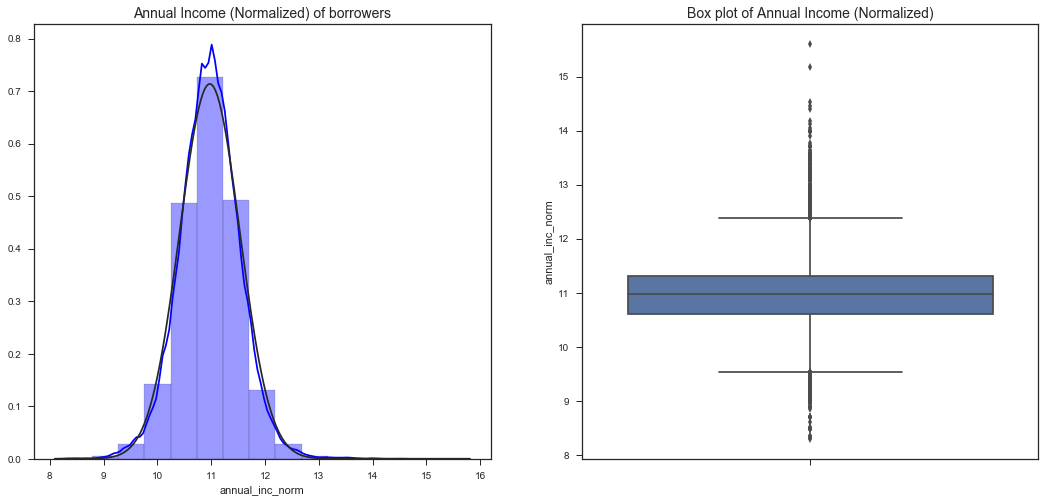

In [43]:
loan['annual_inc_norm'] = np.log(loan['annual_inc'])

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['annual_inc_norm'], hist = True, kde = True, bins = 15, ax=ax[0], color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Annual Income (Normalized) of borrowers',fontsize=14)
sns.boxplot(y=loan['annual_inc_norm'], ax=ax[1])
ax[1].set_title('Box plot of Annual Income (Normalized)',fontsize=14)

After normalizing the annual income follows a normal distribution <br>
From the box plot, we can visualize the values close to lower whisker. Are they outliers? <br>

There are various thumb rules to detect outliers. Some of them are:

- Any value, which is beyond the range of *+/-1.5 times IQR* or *+/-3 times IQR*.  IQR is interquartile range i.e Q3 - Q1.
- Use capping methods. Any value which out of range of 1st and 99th percentile can be considered as outlier
- Data points, three or more standard deviation away from mean are considered outlier

In [44]:
loan['annual_inc_norm'].quantile([0.0, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9, 0.99, 1])
Q1 = loan['annual_inc_norm'].quantile(0.25)
Q3 = loan['annual_inc_norm'].quantile(0.75)
IQR = Q3 - Q1

print(round(loan[(loan['annual_inc_norm'] >= (Q1 - 3 * IQR)) & (loan['annual_inc_norm'] <= (Q3 + 3 * IQR))]['annual_inc_norm'].describe()['count']/len(loan) * 100,2))
print(len(loan) - loan[(loan['annual_inc_norm'] >= (Q1 - 3 * IQR)) & (loan['annual_inc_norm'] <= (Q3 + 3 * IQR))]['annual_inc_norm'].describe()['count'])


99.89
44.0


From above, we can infer there are no (much or many) outliers. We can proceed without deleting as the distribution is almost normal.

In [45]:
print(loan[(loan['annual_inc_norm'] == Q1)][['annual_inc_norm','annual_inc']].head(1))
print(loan[(loan['annual_inc_norm'] == Q3)][['annual_inc_norm','annual_inc']].head(1))

      annual_inc_norm  annual_inc
9085            10.61    40404.00
       annual_inc_norm  annual_inc
10111            11.32    82300.00


Most of the borrowers are in the range of 40,000 to 82,000. It's better if we bucket them and study each bucket individually. <br>
Let's make Annual income into buckets

In [46]:
# Income buckets
loan['income_buckets'] = loan['annual_inc'].apply(lambda x: '1. 0-40K' if x <= 40000 
                                                  else ('2. 40K-60K' if x <= 60000 
                                                        else ('3. 60K-80K' if x <= 80000
                                                              else ('4. 80K-120K' if x <= 120000
                                                                    else '5. 120K above'
                                                                  )
                                                            )
                                                       )
                                                 )
loan['income_buckets'].value_counts().sort_index()

1. 0-40K          9877
2. 40K-60K       11608
3. 60K-80K        7861
4. 80K-120K       7093
5. 120K above     3278
Name: income_buckets, dtype: int64

(0, 300000)

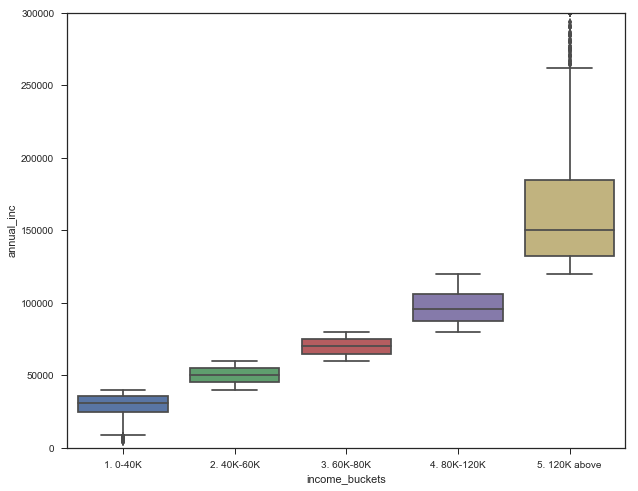

In [47]:
plt.figure(figsize=(10,8))
sns.boxplot(x=loan['income_buckets'], y=loan['annual_inc'])
plt.ylim(0,300000)

In [48]:
# Let's understand verification status variable
loan['verification_status'].value_counts()/len(loan)

Not Verified      0.43
Verified          0.32
Source Verified   0.25
Name: verification_status, dtype: float64

~43% of the assigned loans are not verified. Is this one of the main reason for default. We will explore this in coming sections

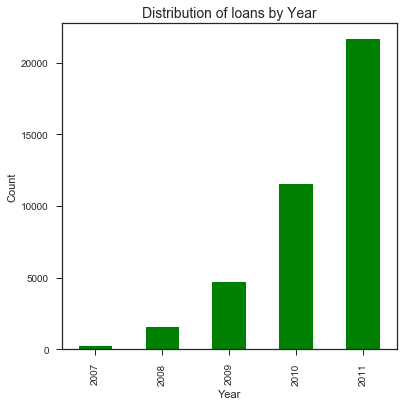

In [49]:
# Let's see when the actual loan was issued? On what day or month or year?
loan['issue_Year'].value_counts().sort_index().plot.bar(color='g', figsize=(6,6))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Distribution of loans by Year', fontsize = 14)
plt.show()

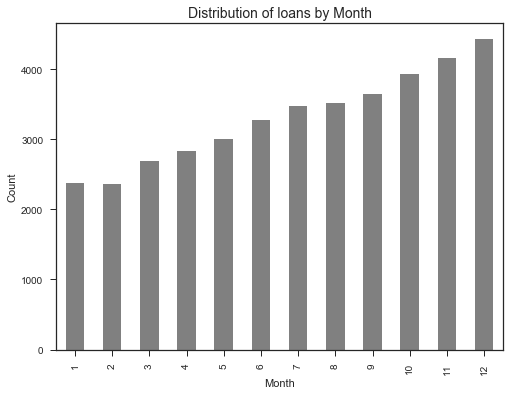

In [50]:
loan['issue_Month'].value_counts().sort_index().plot.bar(color='grey', figsize=(8,6))
plt.ylabel('Count')
plt.xlabel('Month')
plt.title('Distribution of loans by Month', fontsize = 14)
plt.show()

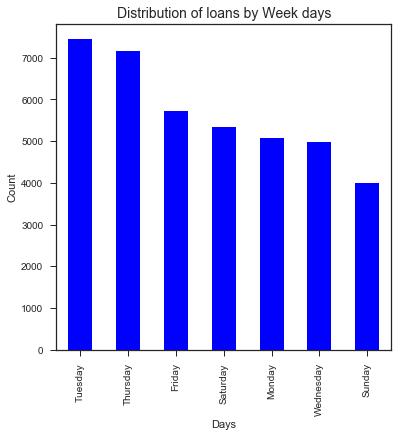

In [51]:
loan['issue_Day_Name'].value_counts(sort = True).plot.bar(color='b', figsize=(6,6))
plt.ylabel('Count')
plt.xlabel('Days')
plt.title('Distribution of loans by Week days', fontsize = 14)
plt.show()

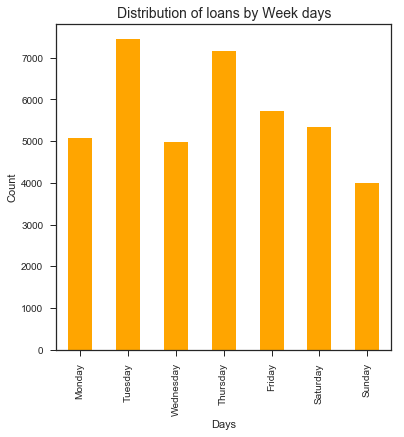

In [52]:
# Let's sort them properly starting with Monday onwards.
loan['issue_Day_Name'] = pd.Categorical(loan['issue_Day_Name'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
loan['issue_Day_Name'].value_counts().sort_index().plot.bar(color='orange', figsize=(6,6))
plt.ylabel('Count')
plt.xlabel('Days')
plt.title('Distribution of loans by Week days', fontsize = 14)
plt.show()

From the above we can infer that
- Issuance of loans has increased year on year
- **2011** was the year where most loans was issued
- Months 11 & 12 where most loans was issued. Need to check if the pattern is same across the years or not
- Most of the loans was issued on Tuesday and then followed by Thrusday. Does this days have any significance?

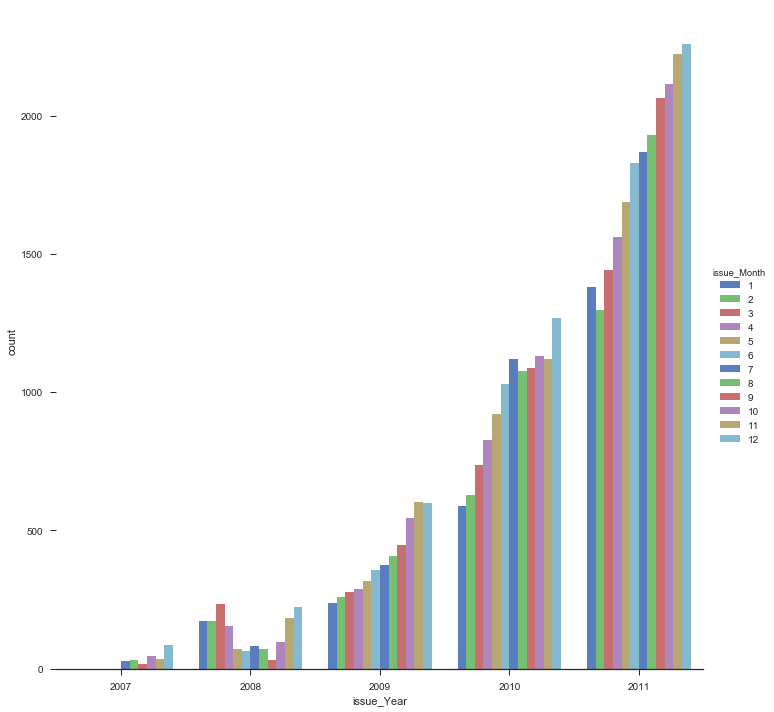

In [53]:
grouped_Yr_Mth = loan.groupby(['issue_Year','issue_Month'], as_index = False)['member_id'].count().rename(columns={'member_id':'count'})
g = sns.factorplot('issue_Year', 'count', 'issue_Month', data=grouped_Yr_Mth, kind='bar', size = 10, palette='muted', legend_out=True)
g.despine(left=True)

Loans issued showing a incrmental trend, there is no effect of month as such. So we can infer that month has no effect on issuance or default. <br>
Let's check if the days of a week has an effect or not?

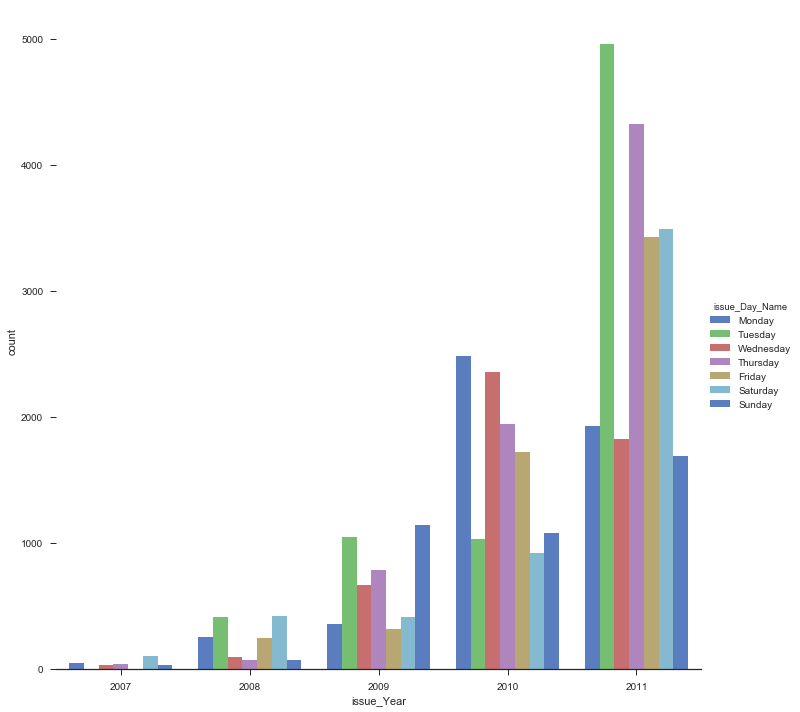

In [54]:
grouped_Yr_day = loan.groupby(['issue_Year','issue_Day_Name'], as_index = False)['member_id'].count().rename(columns={'member_id':'count'})
g = sns.factorplot('issue_Year', 'count', 'issue_Day_Name', data=grouped_Yr_day, kind='bar', size = 10, palette='muted', legend_out=True)
g.despine(left=True)

We couldn't notice any pattern with respect to issuance of loans on a particular day. So, we can exclude day from our analysis.

debt_consolidation   0.47
credit_card          0.13
other                0.10
home_improvement     0.07
major_purchase       0.06
small_business       0.05
car                  0.04
wedding              0.02
medical              0.02
moving               0.01
vacation             0.01
house                0.01
educational          0.01
renewable_energy     0.00
Name: purpose, dtype: float64

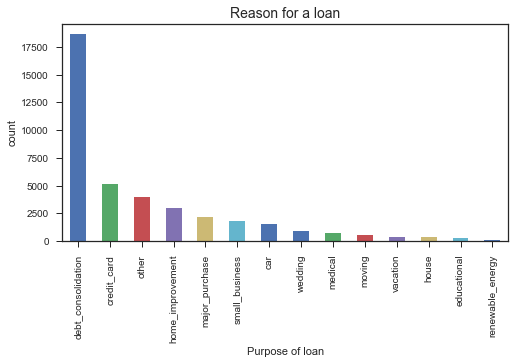

In [55]:
# What purpose the loan was taken by borrowers?
plt.figure(figsize=(8,4))
loan['purpose'].value_counts().plot(kind = 'bar')
plt.xlabel('Purpose of loan')
plt.ylabel('count')
plt.title('Reason for a loan', fontsize = 14)

loan['purpose'].value_counts()/len(loan)

The reason that borrowers applied loan is for debt consolidation (~47%).<br>
*What is debt consolidation means?* <br>
Debt consolidation means taking out a new loan to pay off others. (please refer for more details: [Debt consolidation](https://en.wikipedia.org/wiki/Debt_consolidation)) <br>
Most of the borrowers are applying for loan to clear off the other loans etc. Is this causing defaults?

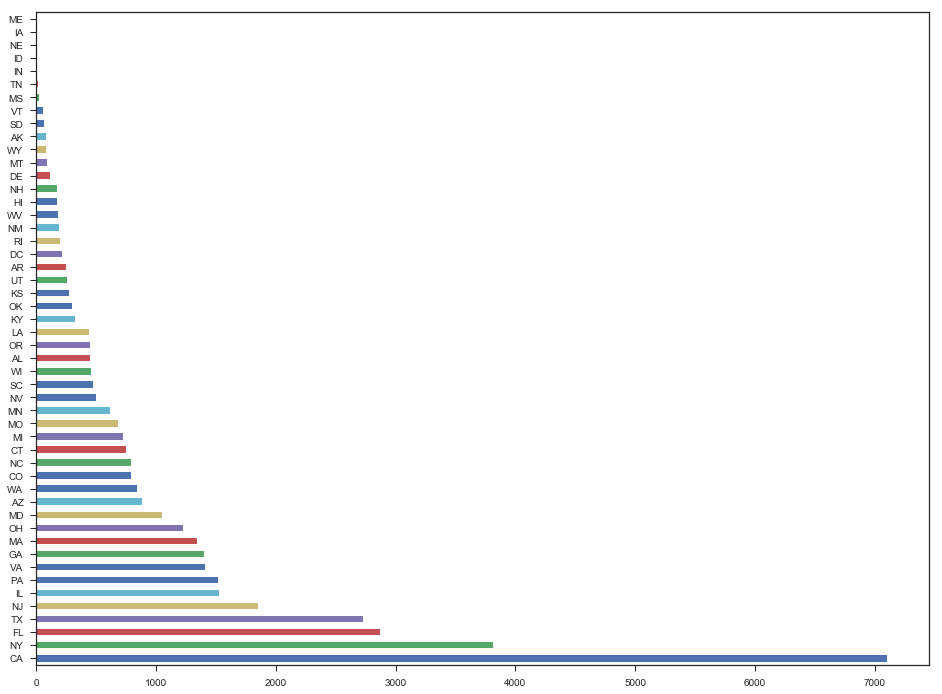

In [56]:
# Which region has received most of the loans?
plt.figure(figsize= (16,12))
loan['addr_state'].value_counts().plot(kind = 'barh')

Most of the loans are issued to **CA** state

count   39717.00
mean       13.32
std         6.68
min         0.00
25%         8.17
50%        13.40
75%        18.60
max        29.99
Name: dti, dtype: float64

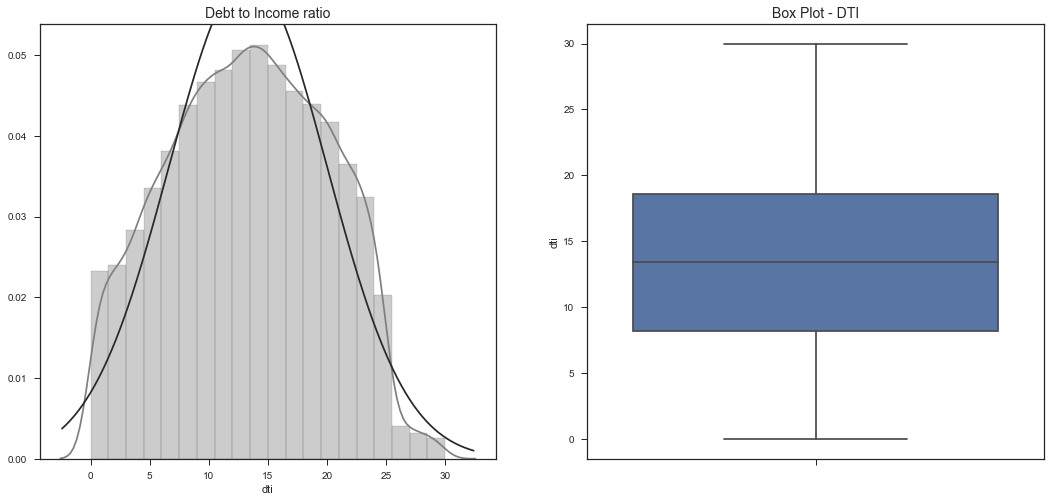

In [57]:
# What is dti means in this study?
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(loan['dti'], hist = True, kde = True, bins = 20,ax=ax[0] , color = 'grey', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Debt to Income ratio',fontsize=14)
sns.boxplot(y = loan['dti'],ax=ax[1])
ax[1].set_title('Box Plot - DTI',fontsize=14)
round(loan['dti'].describe(),2)

A **Debt-to-Income Ratio** (often abbreviated **DTI**) is the percentage of a consumer's monthly gross income that goes toward paying debts. (please refer for more: [DTI](https://www.investopedia.com/ask/answers/081214/whats-considered-be-good-debttoincome-dti-ratio.asp)) <br>
From the above chart we can infer *dti* is normally distributed. And the ratio is around 13.4, which is good indicator. <br>

A low debt-to-income ratio demonstrates a good balance between debt and income. In general, the lower the percentage, the better the chance to be able to get the loan. Lenders like the number to be low because they figure these borrowers with a small debt-to-income ratio are more likely to successfully manage monthly payments. On the contrary, a high debt-to-income ratio signals that borrowers may have too much debt for the amount of income they have, and lenders view this as a signal that they would be unable to take on any additional obligations.

This would definately be a good indicator for our analysis.

In [58]:
# Let's check the next feature delinq_2yrs. What is it means to us?
loan['delinq_2yrs'].value_counts().sort_index()/len(loan)

0    0.89
1    0.08
2    0.02
3    0.01
4    0.00
5    0.00
6    0.00
7    0.00
8    0.00
9    0.00
11   0.00
Name: delinq_2yrs, dtype: float64

What is **delinquency** means? - commonly refers to a situation where a borrower is late or overdue on a payment. For more details please refer [Delinquency](https://www.investopedia.com/terms/d/delinquent.asp) <br>

From the above we can infer that most (~89%) of the borrowers hasn't made late payments.

What is *earliest_cr_line* means? - It informs the month borrower's earliest reported credit line was opened

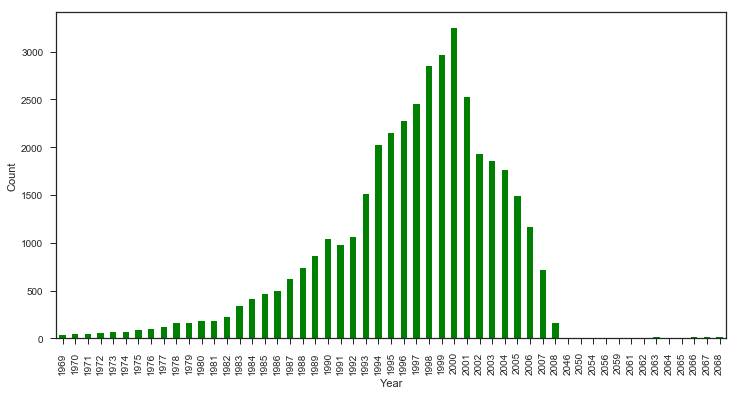

In [59]:
loan['ear_cr_ln_Year'].value_counts().sort_index().plot.bar(color='g', figsize=(12,6))
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

How come the credit line report shows the future date? From loan issue date, we can see the loan year is available until 2011 only. <br>

What we can notice from above graph - seems dates are ambiguous to python, so it doesn't know whether it's 1946 or 2046
After some research in google - we found out that there is a **Two digits year ambiguity** in python. <br>
        - anything with the %y year below 69 will be attributed a century of 2000, and 69 upwards get 1900
        - The %y two digits can only go from 00 to 99 which is going to be ambiguous if we start crossing centuries
        
Let's correct them

In [60]:
 loan['ear_cr_ln_Year'] = np.where(loan['ear_cr_ln_Year']>2011, (loan['ear_cr_ln_Year']-100),loan['ear_cr_ln_Year'])

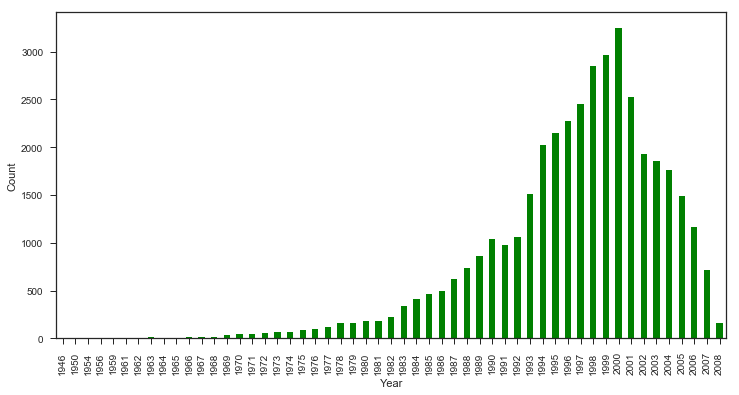

In [61]:
# Lets plot them & see if it is resolved
loan['ear_cr_ln_Year'].value_counts().sort_index().plot.bar(color='g', figsize=(12,6))
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [62]:
# What does mths_since_last_delinq provides us?
loan['mths_since_last_delinq'].describe()

count   14035.00
mean       35.90
std        22.02
min         0.00
25%        18.00
50%        34.00
75%        52.00
max       120.00
Name: mths_since_last_delinq, dtype: float64

What does mths_since_last_delinq tells us? <br>
As per definition *mths_since_last_delinq* is the number of months since the borrower's last delinquency. <br>
We can see missing values. To impute *mths_since_last_delinq*, only 35% of data is available. <br>
Let's check *delinq_2yrs* feature.

In [63]:
loan[loan['mths_since_last_delinq'].isna()]['delinq_2yrs'].unique()

array([0], dtype=int64)

For all null values in *mths_since_last_delinq*, *delinq_2yrs* are all zeros. <br>
So, we can make all null values as zero, which may bias our data towards left side as ~65% data is missing. <br> 
So let's leave them as is

What is opp_acc means? - The number of open credit lines in the borrower’s credit file. In simple words number of open accounts. <br>
How is it useful in our analysis? - A member having fewer lines of credit would tend to have a lower score given the limited information. On the contrary, if a member have more credit lines, it could negatively impact the score as it is perceived as risky.

Text(0.5,1,'Distribution of Open accounts')

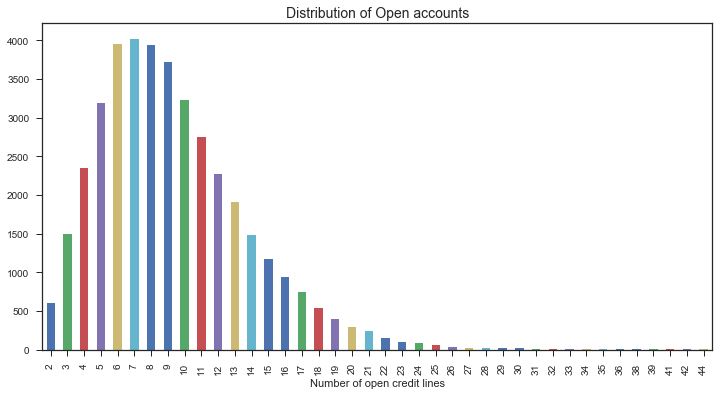

In [64]:
# Let's check the opp_acc
plt.figure(figsize=(12,6))
loan['open_acc'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Number of open credit lines')
plt.title('Distribution of Open accounts', fontsize = 14)

Most of the borrowers have open accounts in the range og 6 to 9

What does *pub_rec* tells us? - As per data dictionary pub_rec is number of derogatory public records. <br>
Derogratory means negative. It typically indicates a serious delinquency or late payments. Public record items, such as bankruptcies, tax liens, and judgments are also considered derogatory.

In [65]:
# What is pub_rec means?
loan['pub_rec'].value_counts()

0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

Most of the borrowers do not have any negative records.

What is the number of inquiries in past 6 months means to us? - Inquiry in general is nothing but request for an information. How is it going to help us here? If a borrower made multiple requests, then we can assume deseparate need of loan or a borrower who has been declined by several lenders and is having difficulty getting approved.

In [66]:
# inq_last_6mths???
round(loan['inq_last_6mths'].value_counts()/len(loan),2)

0   0.49
1   0.28
2   0.15
3   0.08
4   0.01
5   0.00
6   0.00
7   0.00
8   0.00
Name: inq_last_6mths, dtype: float64

Most of the borrowers hasn't made many requests for the loan.

What is revol_bal means & how does it help us?
Revol balance is nothing but total credit revolving balance i.e. the portion of spending that goes unpaid at the end of a cycle. When the balance is paid off, the customer is no longer revolving the debt. As long as borrower keeps the revolving balance low or 0 is a good sign for getting a easy loan

What is *mths_since_last_record*? - The number of months since the last public record

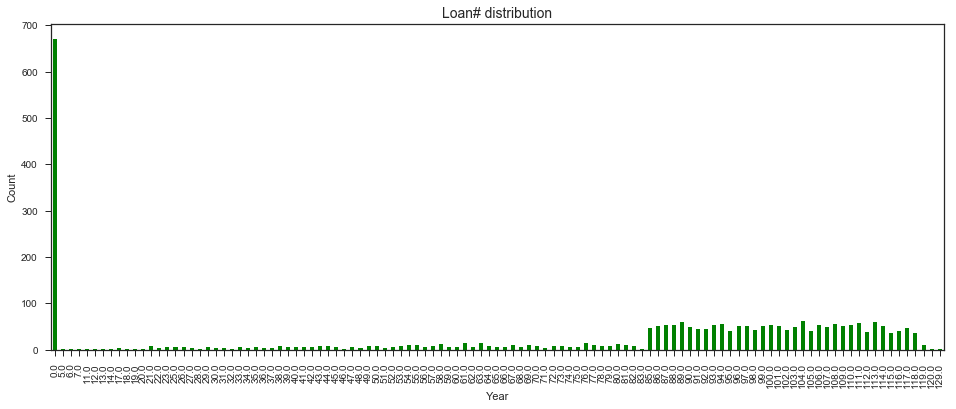

In [67]:
# Let's plot it
loan['mths_since_last_record'].value_counts().sort_index().plot.bar(color='g', figsize=(16,6))
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Loan# distribution', fontsize = 14)
plt.show()

Most of the borrowers shows '0' as number of months since the last public record. That means most of them has a public record recently.

count    39717.00
mean     13382.53
std      15885.02
min          0.00
25%       3703.00
50%       8850.00
75%      17058.00
max     149588.00
Name: revol_bal, dtype: float64

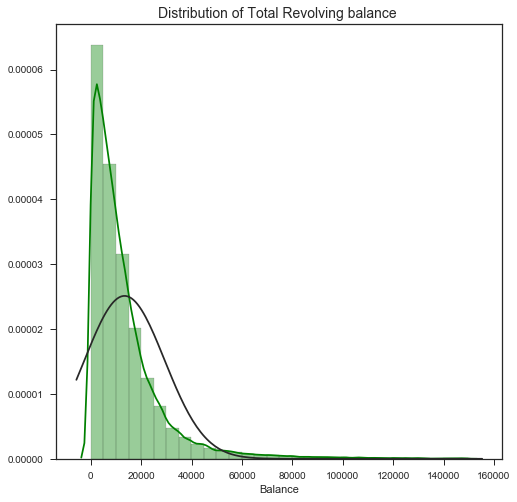

In [68]:
# What is revol_bal means?
plt.figure(figsize=(8,8))
sns.distplot(loan['revol_bal'], hist = True, kde = True, bins = 30, color = 'green', 
             hist_kws={'edgecolor':'black'}, fit = norm)
plt.xlabel('Balance')
plt.title('Distribution of Total Revolving balance ', fontsize = 14)

loan['revol_bal'].describe()

Most of the borrowers has less revolving balance. The graph shows a long tailed distribution, indicates few borrowers has high balance, which means they are not paying off regulary or on time

What is *revol_util* means? - it's nothing but Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [69]:
# revol_util
print(loan['revol_util'].describe())

print(loan['revol_util'].isna().sum())

count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object
50


Text(0.5,1,'Distribution of Borrowers Revolving line utilization')

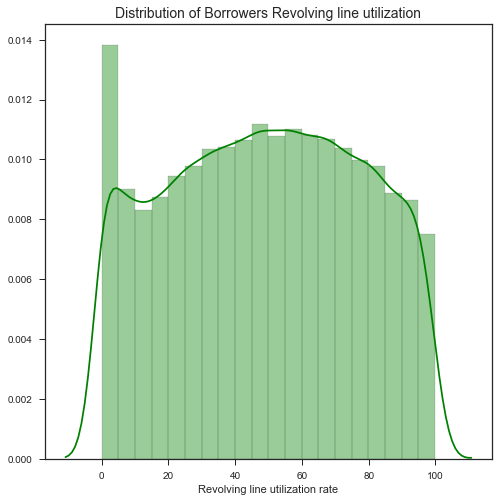

In [70]:
# There are few null values in the datset. Since the count is very less, let's make them as 0
loan['revol_util_mod'].fillna(value=0,inplace=True)
# What is revol_util means?
plt.figure(figsize=(8,8))
sns.distplot(loan['revol_util_mod'], hist = True, kde = True, bins = 20, color = 'green', hist_kws={'edgecolor':'black'})
plt.xlabel('Revolving line utilization rate')
plt.title('Distribution of Borrowers Revolving line utilization', fontsize = 14)

*total_acc* means? - It is the total number of credit lines currently in the borrower's credit file.

Text(0.5,1,'Distribution of Total accounts')

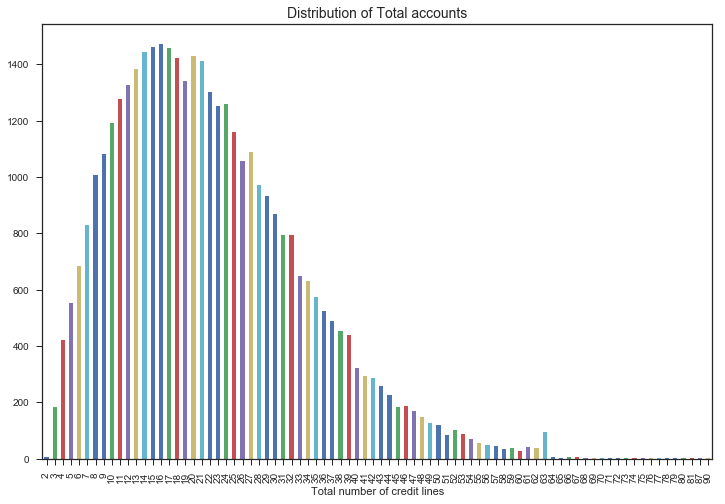

In [71]:
plt.figure(figsize=(12,8))
loan['total_acc'].value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('Total number of credit lines')
plt.title('Distribution of Total accounts', fontsize = 14)

#loan['total_acc'].describe()

What is the difference between *total accounts* & *open accounts*? <br>
Total accounts are the accounts which are both open & closed ones, whereas Open accounts are the one which are currently open. From this we can infer that, total accounts are always larger than or equal to the open accounts. <br>

Let's confirm the statement with data

In [72]:
print(loan[['total_acc','open_acc']].describe())
print(loan[['total_acc','open_acc']].head())

       total_acc  open_acc
count   39717.00  39717.00
mean       22.09      9.29
std        11.40      4.40
min         2.00      2.00
25%        13.00      6.00
50%        20.00      9.00
75%        29.00     12.00
max        90.00     44.00
   total_acc  open_acc
0          9         3
1          4         3
2         10         2
3         37        10
4         38        15


In [73]:
loan['acc_bal'] = np.where(loan['total_acc']<loan['open_acc'],loan['total_acc'], np.nan)
loan['acc_bal'].unique()

array([nan,  8.])

We can clearly infer that, total accounts are always greater or equal to open accounts. Looking at this total accounts may not be as useful, since some/all of those accounts may not be available to the borrower, and the numbers can be very different. The descriptive stats shows the difference between the groups. So, we won't be using this for our analysis.

Let's verify *next_pymnt_d*

In [74]:
loan['next_pymnt_d'].describe()

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

From the initial observation, we can notice missing values from the *next_pymnt_d* feature. <br>
From missing_values table, we can infer that *next_pymnt_d* has ~97% values missing.

Based on definition, we can think *next_pymnt_d* belongs to Current loans only. Let's verify it

In [75]:
loan.groupby('loan_status')['next_pymnt_d'].count()

loan_status
Charged Off       0
Current        1140
Fully Paid        0
Name: next_pymnt_d, dtype: int64

- Next one to study is about *out_prncp* & *out_prncp_inv*. These provides us the details of remaining outstanding amount by borrower. For Fully Paid & Charged Off, the values will be 0. So, we won't be using these variables for study <br>
- *total_pymnt* & *total_pymnt_inv* relates to Payments received to date for total amount funded. For Fully Paid accounts the payments would have completed. For Charged Off accounts, there will be balance which is defaulted. For Current accounts, it provides the payments made till now
- *total_rec_prncp*, *total_rec_int* & *total_rec_late_fee* - deals with amount received to date and *recoveries* & *collection_recovery_fee* - deals with post default recovery & fees for the same
    - these variables is nothing but breakup of total_pymnt details (sum all the variables excluding collection_recovery_fee will be equal to total_pymnt)
- *last_pymnt_d* & *last_pymnt_amnt* - deals with last month payment date for all types/status of loans & how much payment amount received
- *next_pymnt_d* - deals with next scheduled payment date, which is only for Current loans
- *last_pymnt_amnt* - provides us last payment amount received
- *pub_rec_bankruptcies* - provides details of public record bankruptcies count. This information is also available & very relevant to *pub_rec*. So this variable will be redundant.
- *next_pymnt_d* is available for Current loans only. Let's drop them from the analysis, as it doesn't add value to the analysis.

All these variables doesn't add much value to our analysis

In [76]:
loan.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
           'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 
           'pub_rec_bankruptcies','acc_bal', 'total_acc', 'issue_Month', 'next_pymnt_d'],axis=1, inplace=True)

In [77]:
pd.options.display.float_format = '{:.2f}'.format
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,issue_Year,ear_cr_ln_Year,int_rate_mod,revol_util_mod,loan_amnt_norm,funded_amnt_norm,installment_norm,emp_length_mod,annual_inc_norm
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00
mean,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,2010.33,1996.56,12.02,48.77,9.09,9.07,5.56,4.84,10.97
std,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,0.88,6.83,3.72,28.37,0.73,0.72,0.70,3.61,0.56
min,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2007.00,1946.00,5.42,0.00,6.21,6.21,2.75,0.00,8.29
25%,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,2010.00,1993.00,9.25,25.30,8.61,8.59,5.12,2.00,10.61
50%,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,2011.00,1998.00,11.86,49.20,9.21,9.17,5.64,4.00,10.99
75%,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,52.00,104.00,12.00,0.00,17058.00,2011.00,2001.00,14.59,72.30,9.62,9.62,6.07,9.00,11.32
max,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,120.00,129.00,44.00,4.00,149588.00,2011.00,2008.00,24.59,99.90,10.46,10.46,7.17,10.00,15.61


We have transformed or cleansed few variables and created new features out of them. Let's drop redundant ones and store them in new dataframe. In this dataframe we can exclude all *Current* deals, as we are more interested in *Fully Paid* & *Charged Off* only

In [78]:
loan_df = loan.copy()
loan_df.drop(['funded_amnt', 'int_rate', 'revol_util', 'installment', 'emp_length', 'annual_inc',
              'id','member_id','emp_title','issue_d','url','desc','title','zip_code','last_credit_pull_d'
             ],axis=1, inplace=True)
loan_df = loan_df[loan_df['loan_status'] != 'Current']
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 34 columns):
loan_amnt                 38577 non-null int64
funded_amnt_inv           38577 non-null float64
term                      38577 non-null object
grade                     38577 non-null object
sub_grade                 38577 non-null object
home_ownership            38577 non-null object
verification_status       38577 non-null object
loan_status               38577 non-null object
purpose                   38577 non-null object
addr_state                38577 non-null object
dti                       38577 non-null float64
delinq_2yrs               38577 non-null int64
earliest_cr_line          38577 non-null object
inq_last_6mths            38577 non-null int64
mths_since_last_delinq    13672 non-null float64
mths_since_last_record    2740 non-null float64
open_acc                  38577 non-null int64
pub_rec                   38577 non-null int64
revol_bal                 385

## Finding Relationships

Main aim of EDA is to identify the relationships between the variables. Variables that are correlated with target are very useful. Also variables that show relationship other than target variable will be redundant. Either we need to exclude one of them or combine them to form a new variable. <br>
For numeric variables, we can measure relationship using Correlation <br>
For categorical variables, we can examine the effect through plots like density plots/histogram or encode them  etc.

In [79]:
corr = loan_df.corr()
corr.style.background_gradient().set_precision(2)

,loan_amnt,funded_amnt_inv,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,issue_Year,ear_cr_ln_Year,int_rate_mod,revol_util_mod,loan_amnt_norm,funded_amnt_norm,installment_norm,emp_length_mod,annual_inc_norm
loan_amnt,1,0.94,0.062,-0.032,0.013,0.015,-0.00077,0.18,-0.05,0.31,0.11,-0.18,0.3,0.065,0.92,0.9,0.87,0.16,0.44
funded_amnt_inv,0.94,1,0.071,-0.038,-0.0028,0.073,0.44,0.16,-0.051,0.29,0.25,-0.16,0.3,0.074,0.86,0.87,0.84,0.17,0.42
dti,0.062,0.071,1,-0.033,0.0022,0.069,0.19,0.29,-0.0047,0.23,0.093,-0.038,0.11,0.28,0.066,0.065,0.059,0.051,-0.1
delinq_2yrs,-0.032,-0.038,-0.033,1,0.0087,-0.57,-0.037,0.012,0.0076,-0.054,-0.0031,-0.066,0.16,-0.043,-0.037,-0.036,-0.025,0.016,0.032
inq_last_6mths,0.013,-0.0028,0.0022,0.0087,1,-0.0059,-0.029,0.093,0.024,-0.021,-0.059,-0.0082,0.13,-0.07,0.0088,0.0084,0.0089,0.0099,0.043
mths_since_last_delinq,0.015,0.073,0.069,-0.57,-0.0059,1,0.49,0.025,0.059,0.014,0.14,0.005,-0.054,0.11,0.027,0.027,0.014,0.045,0.002
mths_since_last_record,-0.00077,0.44,0.19,-0.037,-0.029,0.49,1,0.019,0.78,-0.1,0.75,-0.044,0.33,0.22,0.0047,0.00077,-0.037,0.2,0.025
open_acc,0.18,0.16,0.29,0.012,0.093,0.025,0.019,1,2.8e-05,0.29,0.011,-0.23,0.006,-0.087,0.19,0.19,0.18,0.1,0.29
pub_rec,-0.05,-0.051,-0.0047,0.0076,0.024,0.059,0.78,2.8e-05,1,-0.061,-0.006,-0.049,0.099,0.059,-0.046,-0.046,-0.042,0.051,-0.015
revol_bal,0.31,0.29,0.23,-0.054,-0.021,0.014,-0.1,0.29,-0.061,1,-0.0093,-0.26,0.094,0.3,0.29,0.28,0.28,0.15,0.41


Loan amount, funded amount, funded amount by investors & installment show strong correlation. This is expected behavior. Annual income doesn't show strong correlation with loan amount, which is strange.

Our traget variable is loan status, which is categorical in nature. Let's make a new variable named Target from loan status

In [80]:
loan_df['Target'] = loan_df['loan_status'].apply(lambda x: 0 if x == 'Charged Off' else 1)
loan_df['Target'].value_counts()

1    32950
0     5627
Name: Target, dtype: int64

Let's convert all categorical variables to numeric

In [81]:
# term variable
uniques = sorted(list(set(loan_df['term'])))
loan_df['cat_term'] = [uniques.index(x) + 1 for x in loan_df['term']]

# grade variable
uniques = sorted(list(set(loan_df['grade'])))
loan_df['cat_grade'] = [uniques.index(x) + 1 for x in loan_df['grade']]

# sub_grade variable
uniques = sorted(list(set(loan_df['sub_grade'])))
loan_df['cat_sub_grade'] = [uniques.index(x) + 1 for x in loan_df['sub_grade']]

# home_ownership variable
uniques = sorted(list(set(loan_df['home_ownership'])))
loan_df['cat_home_ownership'] = [uniques.index(x) + 1 for x in loan_df['home_ownership']]

# verification_status variable
uniques = sorted(list(set(loan_df['verification_status'])))
loan_df['cat_verification_status'] = [uniques.index(x) + 1 for x in loan_df['verification_status']]

# purpose variable
uniques = sorted(list(set(loan_df['purpose'])))
loan_df['cat_purpose'] = [uniques.index(x) + 1 for x in loan_df['purpose']]

# addr_state variable
uniques = sorted(list(set(loan_df['addr_state'])))
loan_df['cat_addr_state'] = [uniques.index(x) + 1 for x in loan_df['addr_state']]

Let's check correlation with our target variable

In [82]:
# Plot the correlation matrix
joincorr = loan_df.corr()
joincorr.style.background_gradient().set_precision(2)

,loan_amnt,funded_amnt_inv,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,issue_Year,ear_cr_ln_Year,int_rate_mod,revol_util_mod,loan_amnt_norm,funded_amnt_norm,installment_norm,emp_length_mod,annual_inc_norm,Target,cat_term,cat_grade,cat_sub_grade,cat_home_ownership,cat_verification_status,cat_purpose,cat_addr_state
loan_amnt,1,0.94,0.062,-0.032,0.013,0.015,-0.00077,0.18,-0.05,0.31,0.11,-0.18,0.3,0.065,0.92,0.9,0.87,0.16,0.44,-0.059,0.35,0.29,0.3,-0.17,0.41,-0.13,-0.001
funded_amnt_inv,0.94,1,0.071,-0.038,-0.0028,0.073,0.44,0.16,-0.051,0.29,0.25,-0.16,0.3,0.074,0.86,0.87,0.84,0.17,0.42,-0.038,0.34,0.26,0.27,-0.16,0.42,-0.14,-0.00073
dti,0.062,0.071,1,-0.033,0.0022,0.069,0.19,0.29,-0.0047,0.23,0.093,-0.038,0.11,0.28,0.066,0.065,0.059,0.051,-0.1,-0.045,0.076,0.097,0.1,0.024,0.071,-0.14,0.017
delinq_2yrs,-0.032,-0.038,-0.033,1,0.0087,-0.57,-0.037,0.012,0.0076,-0.054,-0.0031,-0.066,0.16,-0.043,-0.037,-0.036,-0.025,0.016,0.032,-0.02,0.0073,0.16,0.16,-0.017,0.0069,0.041,0.0042
inq_last_6mths,0.013,-0.0028,0.0022,0.0087,1,-0.0059,-0.029,0.093,0.024,-0.021,-0.059,-0.0082,0.13,-0.07,0.0088,0.0084,0.0089,0.0099,0.043,-0.072,0.048,0.12,0.12,-0.081,0.014,0.046,0.041
mths_since_last_delinq,0.015,0.073,0.069,-0.57,-0.0059,1,0.49,0.025,0.059,0.014,0.14,0.005,-0.054,0.11,0.027,0.027,0.014,0.045,0.002,-0.0054,0.039,-0.076,-0.076,-0.014,0.053,-0.044,-0.014
mths_since_last_record,-0.00077,0.44,0.19,-0.037,-0.029,0.49,1,0.019,0.78,-0.1,0.75,-0.044,0.33,0.22,0.0047,0.00077,-0.037,0.2,0.025,-0.064,0.28,0.12,0.13,-0.14,0.4,-0.1,-0.067
open_acc,0.18,0.16,0.29,0.012,0.093,0.025,0.019,1,2.8e-05,0.29,0.011,-0.23,0.006,-0.087,0.19,0.19,0.18,0.1,0.29,0.0091,0.046,0.01,0.012,-0.21,0.083,-0.1,0.037
pub_rec,-0.05,-0.051,-0.0047,0.0076,0.024,0.059,0.78,2.8e-05,1,-0.061,-0.006,-0.049,0.099,0.059,-0.046,-0.046,-0.042,0.051,-0.015,-0.051,0.01,0.093,0.096,-0.03,-0.012,-0.0087,0.0026
revol_bal,0.31,0.29,0.23,-0.054,-0.021,0.014,-0.1,0.29,-0.061,1,-0.0093,-0.26,0.094,0.3,0.29,0.28,0.28,0.15,0.41,-0.0059,0.066,0.091,0.098,-0.22,0.15,-0.12,-0.016


In [83]:
df = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
df[((df[0] < 1) & (df[0] >= 0.4)) | ((df[0] <= -0.4) & (df[0] > -1))]

,level_0,level_1,0
393,loan_amnt_norm,funded_amnt_norm,0.99
419,funded_amnt_norm,loan_amnt_norm,0.99
615,cat_sub_grade,cat_grade,0.98
589,cat_grade,cat_sub_grade,0.98
421,funded_amnt_norm,installment_norm,0.98
447,installment_norm,funded_amnt_norm,0.98
446,installment_norm,loan_amnt_norm,0.97
394,loan_amnt_norm,installment_norm,0.97
606,cat_sub_grade,int_rate_mod,0.96
346,int_rate_mod,cat_sub_grade,0.96


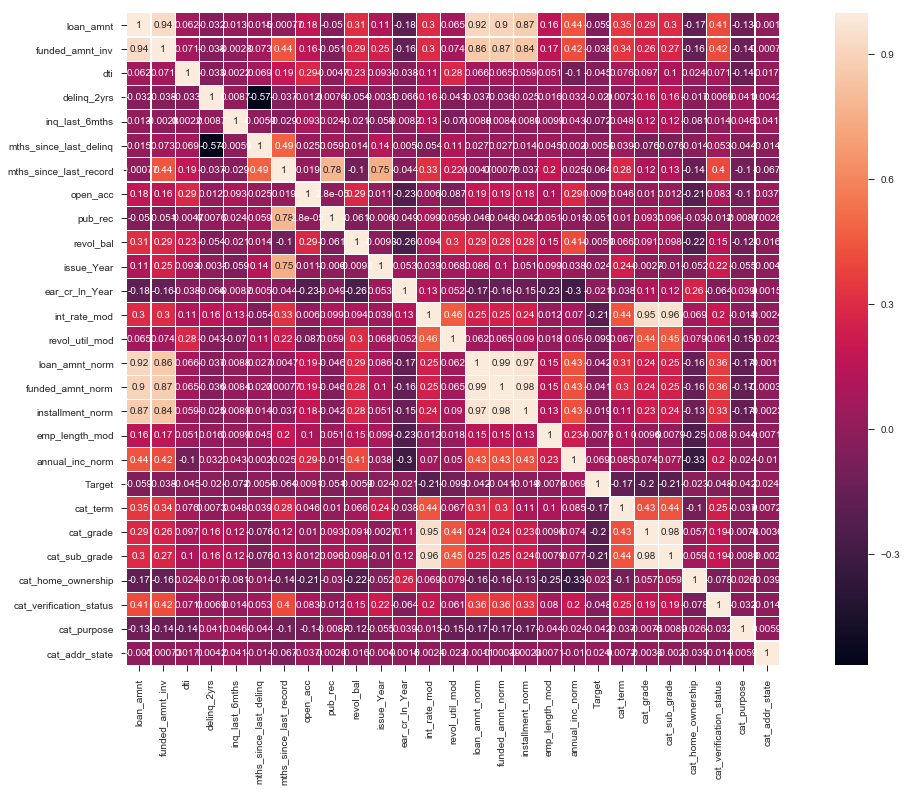

In [84]:
# Correlation plot using Seaborn
plt.figure(figsize=(20,12))

sns.heatmap(loan_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)
plt.show()

- Our *Target* variable doesn't seem to be related to other variables
- It is evident from heat map that *'loan_amnt','funded_amnt', 'funded_amnt_inv' & 'installment'* are highly correlated
- *'annual_inc'* show relation with *'loan_amnt'*, but not strong i.e. only 0.4
- *'mths_since_last_delinq'* & *'delinq_2yrs'* show a negative relation. If there are no missing values, we may expect a strong correlation
- *'grade'* or *'sub_grade'* show a strong relationship with *'int_rate'*
- *'int_rate'* & *'term'* show a relationship, which can be considered for analysis
- *'grade'* & *'term'* seem to have a correlation
- *'revol_util'* & *'int_rate'* show a relation (not a strong one). As per definition as a borrower has higher utilization then the interest rate will be higher as we classify them as high risk ones
- *'mths_since_last_record'* has shown strong positive correlation with *'pub_rec'* and good correlation (of around 0.49) with *'mths_since_last_delinq'*
- *'dti'* doesn't show any relation with the features, which is strange & not expected

## Bi/Multi variable plots

Let's start with loan amounts versus target variable which is loan status

### Loan Amount

Text(0.5,1,'Distribution of loan amount by status - Violin plot')

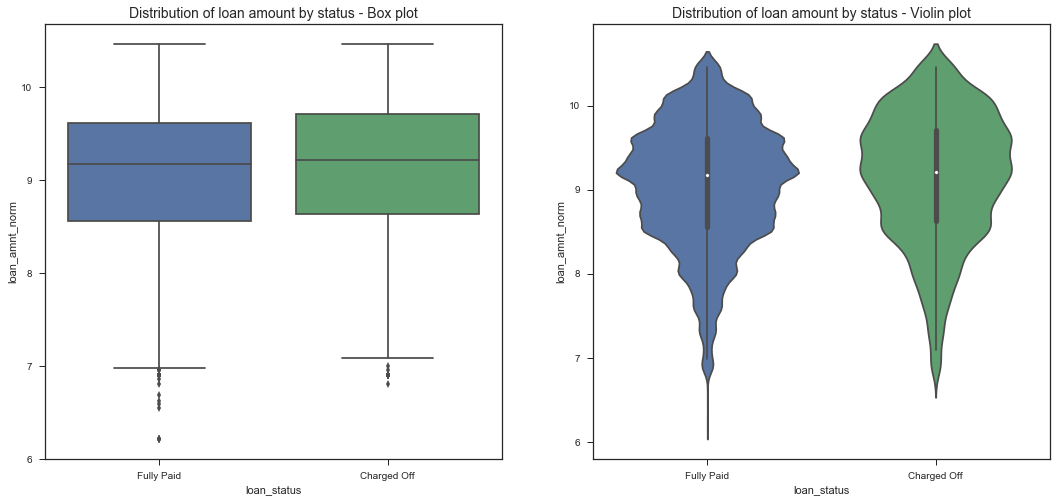

In [85]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, ax = ax[0])
ax[0].set_title('Distribution of loan amount by status - Box plot',fontsize=14)
sns.violinplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, ax = ax[1])
ax[1].set_title('Distribution of loan amount by status - Violin plot',fontsize=14)

Both box plot & violin plot show same distribution. Then why Violin plot? Violin plots allows a deeper understanding of the density.
Fully Paid & Default loans show similar distribution, but the density is different for fully paid ones.

### Term

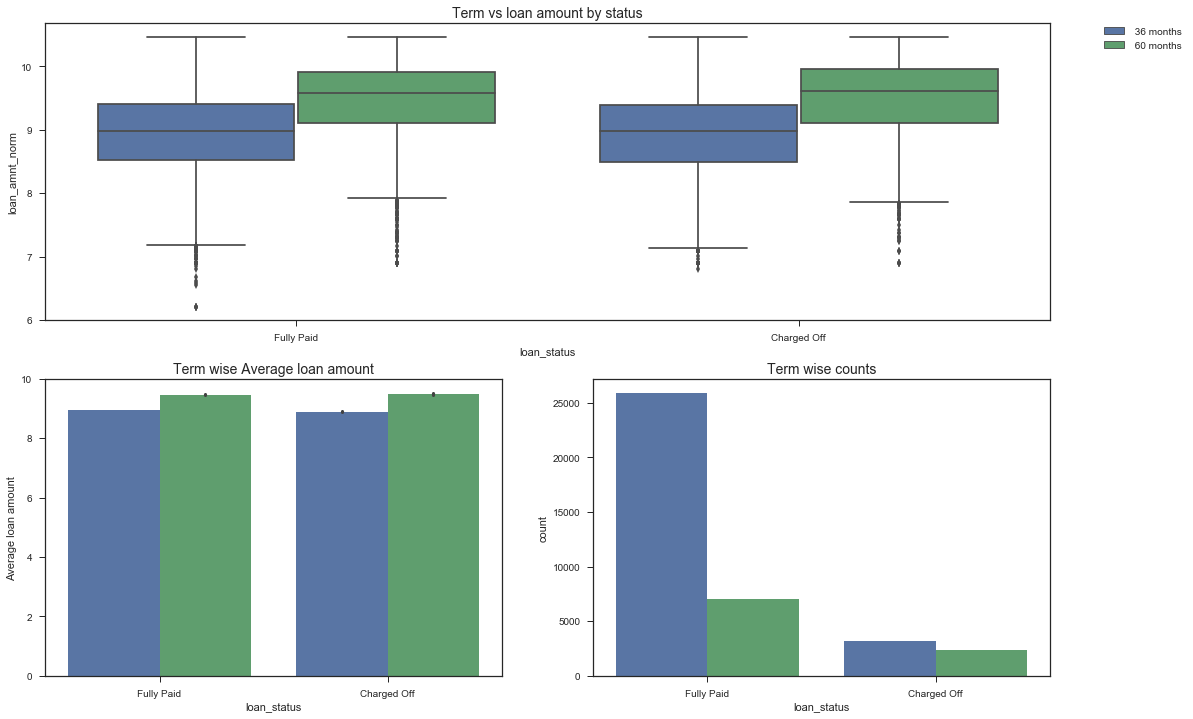

In [86]:
# Let's check the above distribution by Term wise. Will it make a difference?
fig = plt.figure(figsize = (18,12))

gs=GridSpec(2,2) # 2 rows, 2 columns

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'term', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Term vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'term', ax = ax2)
ax2.set_title('Term wise Average loan amount', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='loan_status', data = loan_df, hue = 'term', ax = ax3)
ax3.set_title('Term wise counts', fontsize = 14)
ax3.legend().set_visible(False)

Defaults are high in 60 months. Need to deep dive in 60 months term

In [87]:
df = loan_df.groupby(['term','issue_Year','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
#df.sort_values(by = 'BGLI', ascending = True)
df

loan_status            Charged Off  Fully Paid  Total  ChargedOff_row%  \
term       issue_Year                                                    
 36 months 2007                 45         206    251             0.18   
           2008                247        1315   1562             0.16   
           2009                594        4122   4716             0.13   
           2010                842        7624   8466             0.10   
           2011               1499       12602  14101             0.11   
 60 months 2010                643        2423   3066             0.21   
           2011               1757        4658   6415             0.27   

loan_status            FullyPaid_row%  Badloan%  Goodloan%  BGLI  
term       issue_Year                                             
 36 months 2007                  0.82      0.01       0.01  1.28  
           2008                  0.84      0.04       0.04  1.10  
           2009                  0.87      0.11       0.13  0.84  
           2010                  0.90      0.15       0.23  0.65  
           2011                  0.89      0.27       0.38  0.70  
 60 months 2010                  0.79      0.11       0.07  1.55  
           2011                  0.73      0.31       0.14  2.21

- Interesting thing, loans for term of 60 months has started only from 2010 onwards (new ones)
- 60 months showed a high default rate when compared to 36 months
- From BGLI, we can clearly infer that the risk of default slowly came down with 36 months loan
- One conclusion could be, lending club need to revist their strategy for 60 months term or scrap off it completly

Let's check if there is a significant relationship between term & loan status. In here we will use Chi-Square test.

    H0 (Null Hypothesis): There is no relationship between variable one and variable two.
    H1 (Alternative Hypothesis): There is a relationship between variable one and variable two.

In [88]:
df = loan_df.groupby(['term','loan_status'], as_index = False).size().unstack('loan_status')
stats.chi2_contingency(df)

(1159.9348526526892,
 3.1095440690986406e-254,
 1,
 array([[ 4244.06231692, 24851.93768308],
        [ 1382.93768308,  8098.06231692]]))

Let's understand the result from Chi-square:

The first value (1159.93) is the Chi-square value, followed by the p-value (3.1095440690986406e-254), then comes the degrees of freedom (1), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi-square test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between term & loan status.

how did we arrive at the degrees of freedom? = (no. of rows - 1) x (no. of columns - 1). So in our case (2-1)x(2-1) = 1

Text(0.5,1,'Distribution of interest rates by Term wise')

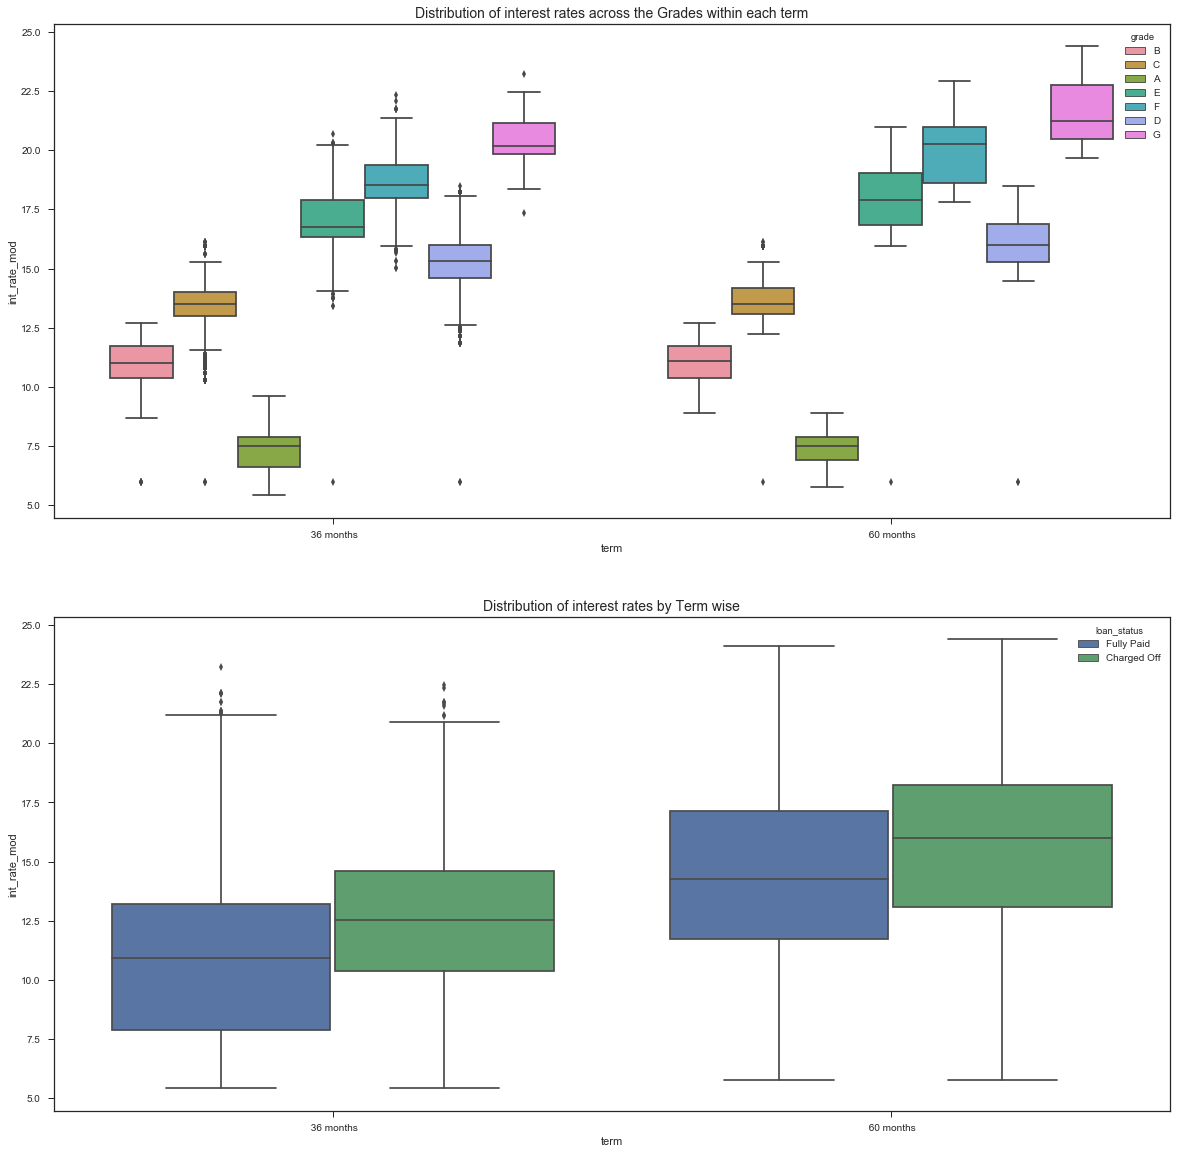

In [89]:
fig, ax = plt.subplots(2, 1, figsize=(20,20))
sns.boxplot(x='term', y= 'int_rate_mod', hue = 'grade', data = loan_df, ax = ax[0])
ax[0].set_title('Distribution of interest rates across the Grades within each term',fontsize=14)

sns.boxplot(x='term', y= 'int_rate_mod', hue = 'loan_status', data = loan_df, ax = ax[1])
ax[1].set_title('Distribution of interest rates by Term wise',fontsize=14)

### Grade

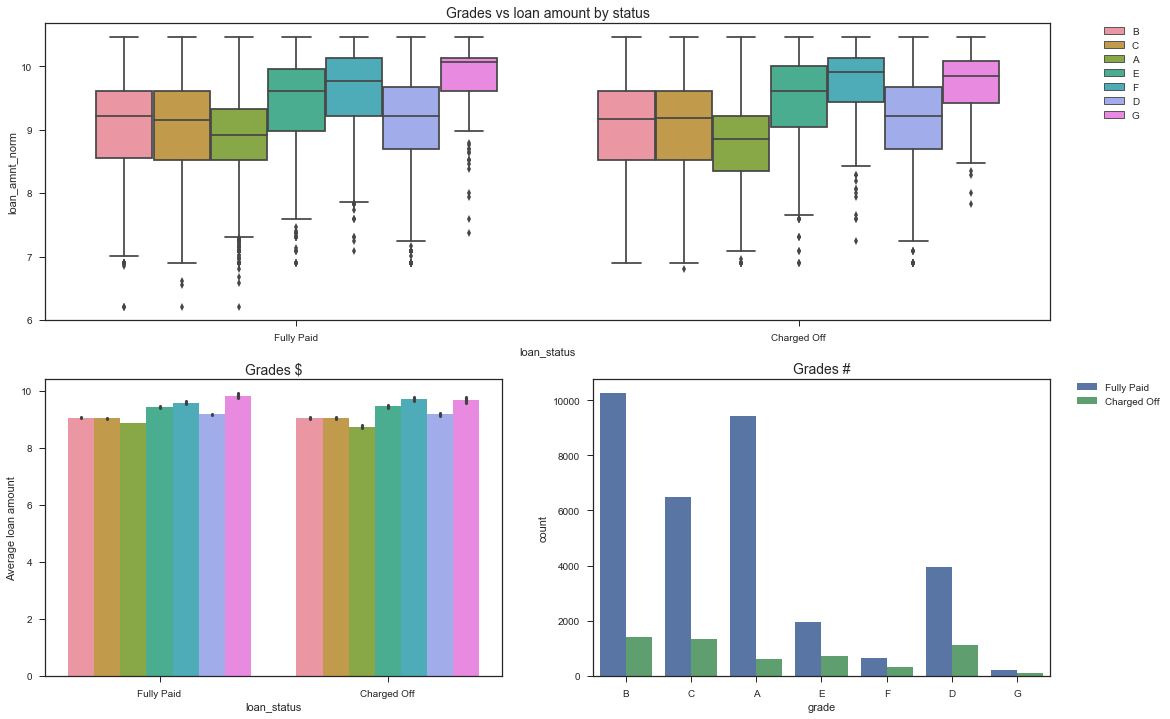

In [90]:
# Now we will check the behavior by Grades
fig = plt.figure(figsize = (18,12))

gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'grade', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Grades vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'grade', ax = ax2)
ax2.set_title('Grades $', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='grade', data = loan_df, hue = 'loan_status', ax = ax3)
ax3.set_title('Grades #', fontsize = 14)
#ax3.legend().set_visible(False)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [91]:
df = loan_df.groupby(['grade','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
grade,,,,,,,,
A,602,9443,10045,0.06,0.94,0.11,0.29,0.37
B,1425,10250,11675,0.12,0.88,0.25,0.31,0.81
C,1347,6487,7834,0.17,0.83,0.24,0.20,1.22
D,1118,3967,5085,0.22,0.78,0.20,0.12,1.65
E,715,1948,2663,0.27,0.73,0.13,0.06,2.15
F,319,657,976,0.33,0.67,0.06,0.02,2.84
G,101,198,299,0.34,0.66,0.02,0.01,2.99


- From count prespective, most of the loans defaulted are in grades B, C & D
- Grade A seems to be less risky ones, Grade G is very risky one
- Total customer default rate is 6% at grade A and steadily increases to 34% at grade G
- Except Grade A & B, all the remaining grades show  the index greater than 1 means risker flag
<br>

What kind of loans consititute majorly in grade B followed C & D?

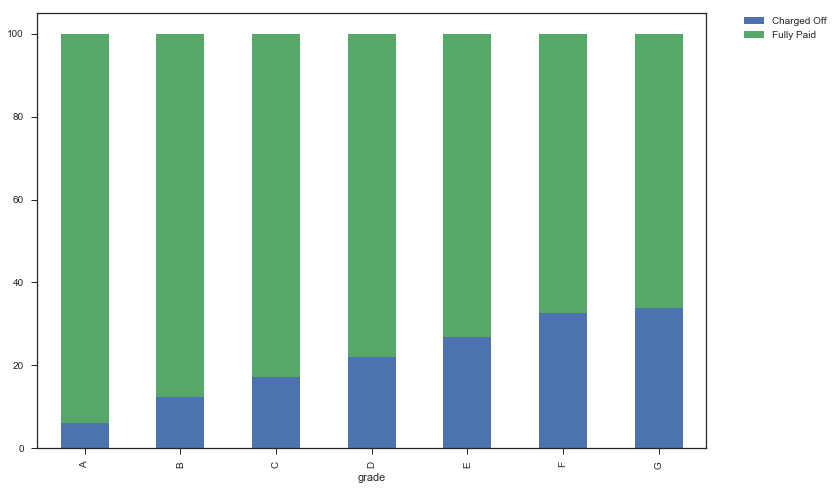

In [92]:
# Let's check Sub Grade behavior as well
df = loan_df.groupby(['grade','loan_status'], as_index = False).size().unstack('loan_status')
percent = df.div(df.sum(1)/100,0)

ax = percent.plot(kind='bar', stacked=True, figsize=(12,8))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

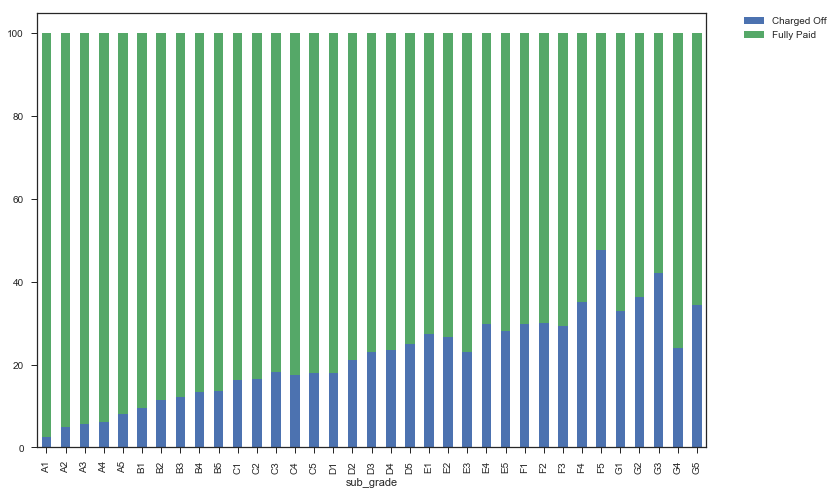

In [93]:
# Let's check Sub Grade behavior as well
df = loan_df.groupby(['sub_grade','loan_status'], as_index = False).size().unstack('loan_status')
percent = df.div(df.sum(1)/100,0)

ax = percent.plot(kind='bar', stacked=True, figsize=(12,8))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [94]:
df = loan_df.groupby(['sub_grade','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
sub_grade,,,,,,,,
A1,30,1109,1139,0.03,0.97,0.01,0.03,0.16
A2,74,1434,1508,0.05,0.95,0.01,0.04,0.30
A3,103,1707,1810,0.06,0.94,0.02,0.05,0.35
A4,178,2695,2873,0.06,0.94,0.03,0.08,0.39
A5,217,2498,2715,0.08,0.92,0.04,0.08,0.51
B1,171,1626,1797,0.10,0.90,0.03,0.05,0.62
B2,228,1773,2001,0.11,0.89,0.04,0.05,0.75
B3,341,2484,2825,0.12,0.88,0.06,0.08,0.80
B4,329,2108,2437,0.14,0.86,0.06,0.06,0.91


Text(0.5,1,'Distribution of interest rates by Sub Grades - Charged Off')

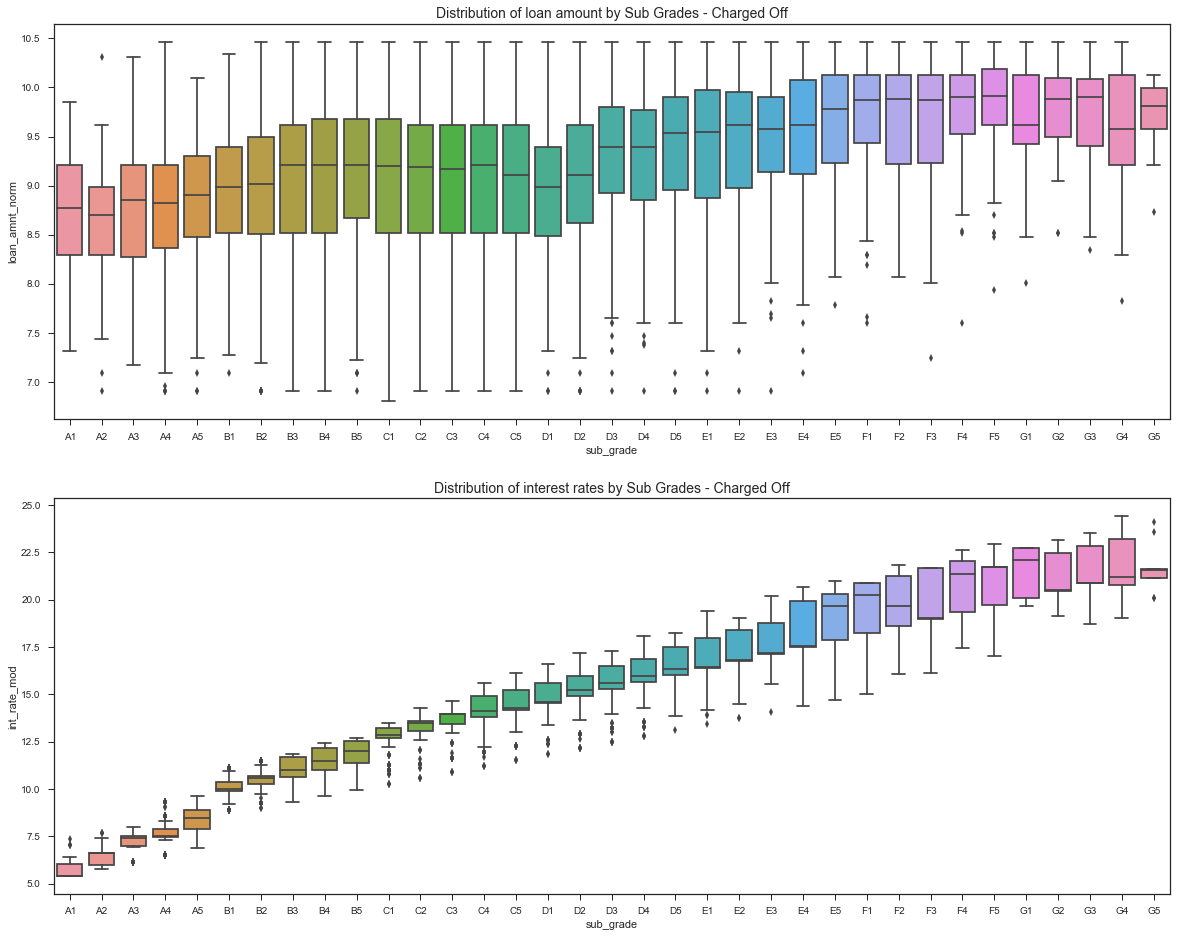

In [95]:
df = loan_df[loan_df['loan_status'] == 'Charged Off'][['loan_status', 'sub_grade','loan_amnt_norm', 'int_rate_mod']]
df = df.sort_values(['loan_status', 'sub_grade','loan_amnt_norm','int_rate_mod'], ascending = [0,1,0,0])

fig, ax = plt.subplots(2, 1, figsize=(20,16))
sns.boxplot(x='sub_grade', y= 'loan_amnt_norm', data = df, ax = ax[0])
ax[0].set_title('Distribution of loan amount by Sub Grades - Charged Off',fontsize=14)

sns.boxplot(x='sub_grade', y= 'int_rate_mod', data = df, ax = ax[1])
ax[1].set_title('Distribution of interest rates by Sub Grades - Charged Off',fontsize=14)

Text(0.5,1,'Distribution of interest rates by Sub Grades - Charged Off')

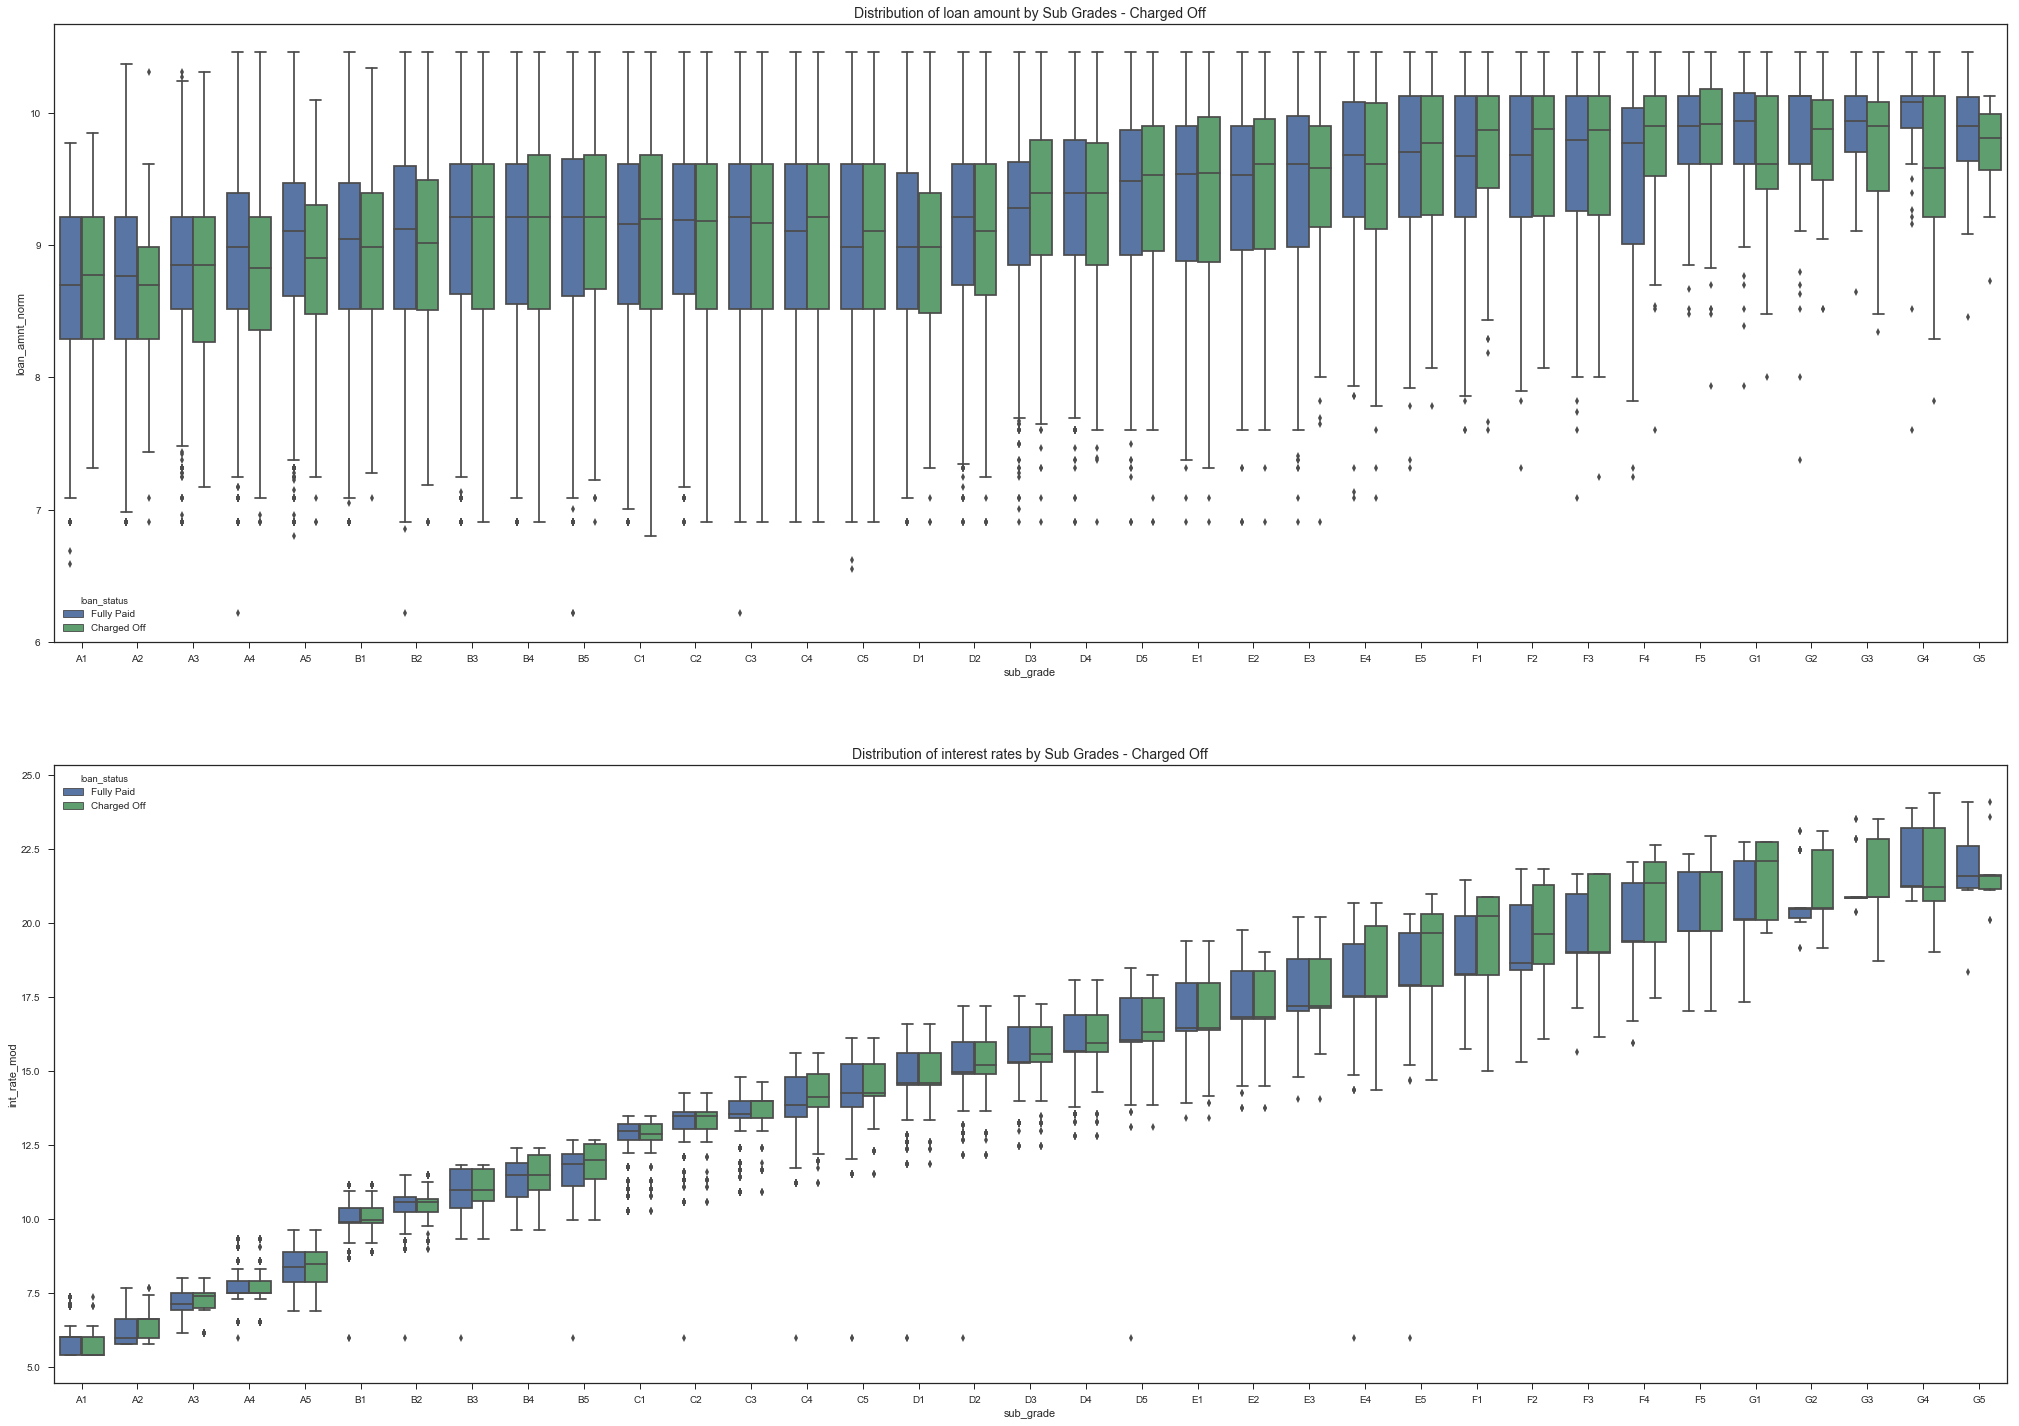

In [96]:
df = loan_df[['loan_status', 'sub_grade','loan_amnt_norm', 'int_rate_mod']]
df = df.sort_values(['loan_status', 'sub_grade','loan_amnt_norm','int_rate_mod'], ascending = [0,1,0,0])

fig, ax = plt.subplots(2, 1, figsize=(35,25))
sns.boxplot(x='sub_grade', y= 'loan_amnt_norm', hue = 'loan_status', data = df, ax = ax[0])
ax[0].set_title('Distribution of loan amount by Sub Grades - Charged Off',fontsize=14)

sns.boxplot(x='sub_grade', y= 'int_rate_mod', hue = 'loan_status', data = df, ax = ax[1])
ax[1].set_title('Distribution of interest rates by Sub Grades - Charged Off',fontsize=14)

- From the above we can infer that *Grade* indicates the loan risk category.
- We can observe a strong relationship between *Grade* & *Interest rate*. *Interest rate* increases steadily for members from A to G grade
- Sub grade G3 & F5 are very high risk borrowers

Let's check if there exists a significant relationship between grade & loan status.

    H0 (Null Hypothesis): There is no relationship between variable one and variable two.
    H1 (Alternative Hypothesis): There is a relationship between variable one and variable two.

In [97]:
df = loan_df.groupby(['grade','loan_status'], as_index = False).size().unstack('loan_status')
stats.chi2_contingency(df)

(1581.1887205669082, 0.0, 6, array([[1465.20504446, 8579.79495554],
        [1702.96355341, 9972.03644659],
        [1142.69948415, 6691.30051585],
        [ 741.71902947, 4343.28097053],
        [ 388.43614071, 2274.56385929],
        [ 142.36337714,  833.63662286],
        [  43.61337066,  255.38662934]]))

Let's understand the result from Chi-square:

The first value (1581.18) is the Chi-square value, followed by the p-value (0.0), then comes the degrees of freedom (6), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi-square test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between Grade & loan status.

how did we arrive at the degrees of freedom? = (no. of rows - 1) x (no. of columns - 1). So in our case (7-1)x(2-1) = 6

Let's check if there is a statistical significant relationship between grade & interest rate.

    H0 (Null Hypothesis): Interest rate is same for all grades.
    H1 (Alternative Hypothesis): Interest rate is different for atleast one grade.

In [98]:
Grade_vs_loan_int = loan_df.pivot_table(values ='int_rate_mod', index = 'grade', dropna=True, aggfunc='mean').reset_index()
Grade_vs_loan_int['expected']= loan_df['int_rate_mod'].mean()

import scipy.stats as stats
#from scipy.stats import chisquare
chisq = stats.chisquare(Grade_vs_loan_int.expected, Grade_vs_loan_int.int_rate_mod)
print("chi-square=", chisq[0])
print("p-value=",chisq[1])
crit = stats.chi2.ppf(q = 1-0.95, # Find the critical value for 95% confidence*
                      df = loan_df['grade'].nunique()-1)   # Df = number of variable categories - 1

print("Critical value")
print(crit)
if(chisq[0] > crit):
   print("Reject the NULL hypothesis")
else:
   print("cannot reject NULL hypothesis")


chi-square= 13.040175245282251
p-value= 0.0424023786219046
Critical value
1.6353828943279078
Reject the NULL hypothesis


Inference: <br>
    p-value is less than 0.05. So, we reject null hypothesis. It means that the interest rate is different for atleast one of the grades.

Let's check for Grade vs Term:

    H0 (Null Hypothesis): There is no relationship between variables.
    H1 (Alternative Hypothesis): There is relationship exists between variable one & variable two.

In [99]:
df = loan_df.groupby(['grade','term'], as_index = False).size().unstack('term')
stats.chi2_contingency(df)

(7519.858998212871, 0.0, 6, array([[7576.25839231, 2468.74160769],
        [8805.65622003, 2869.34377997],
        [5908.65189102, 1925.34810898],
        [3835.26868341, 1249.73131659],
        [2008.51927314,  654.48072686],
        [ 736.13023304,  239.86976696],
        [ 225.51530705,   73.48469295]]))

We reject the null hypothesis as the p-value is less than 0.05. This means that there is a relationship between Grade & term.

### Employement Length

Text(0.5,1,'Issuance of loans by length of service')

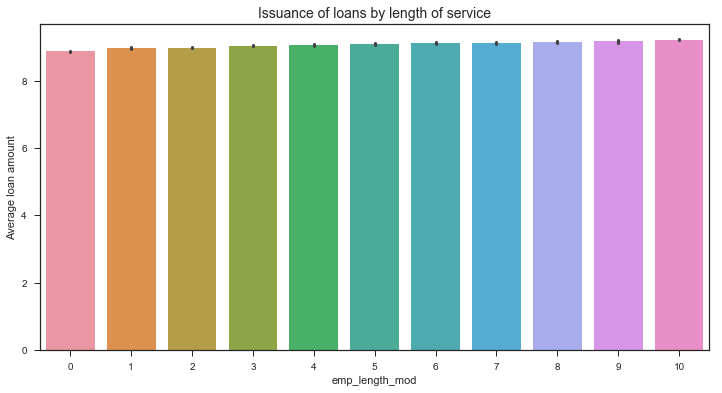

In [100]:
# Now check by Employement Length
plt.figure(figsize=(12,6))
sns.barplot(x='emp_length_mod', y = 'loan_amnt_norm', data = loan_df)
plt.ylabel('Average loan amount')
plt.title('Issuance of loans by length of service', fontsize = 14)

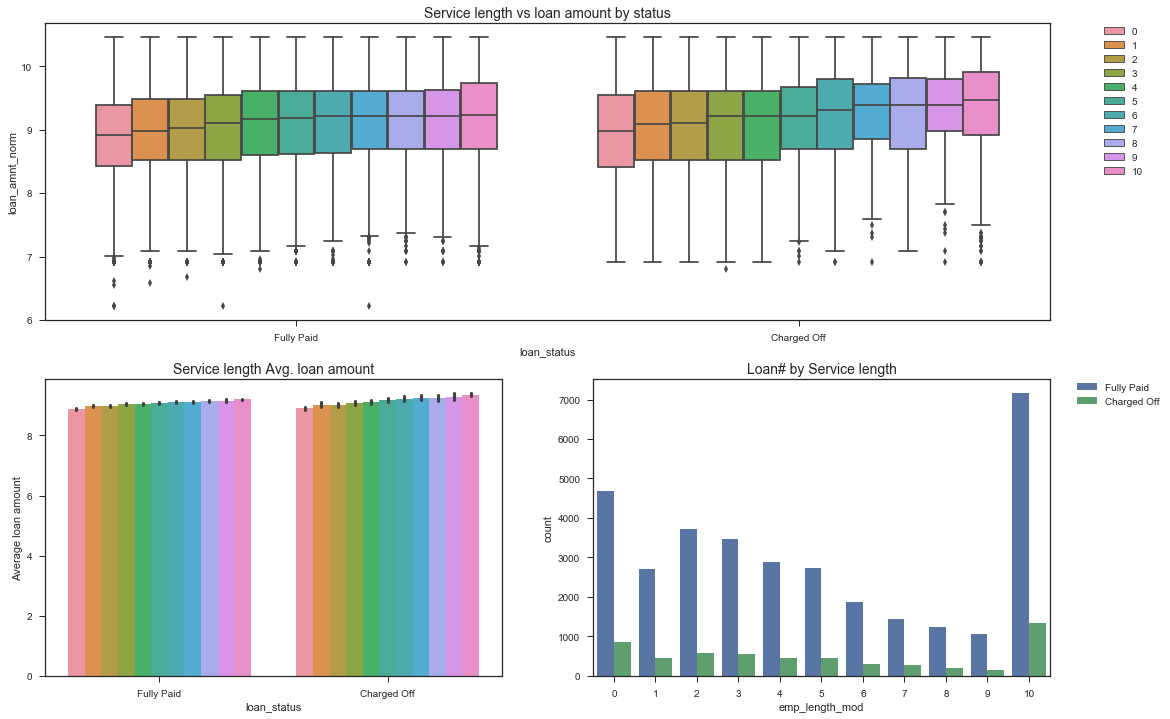

In [101]:
fig = plt.figure(figsize = (18,12))

gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'emp_length_mod', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Service length vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'emp_length_mod', ax = ax2)
ax2.set_title('Service length Avg. loan amount', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='emp_length_mod', data = loan_df, hue = 'loan_status', ax = ax3)
ax3.set_title('Loan# by Service length', fontsize = 14)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [102]:
df = loan_df.groupby(['emp_length_mod','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
emp_length_mod,,,,,,,,
9,158,1068,1226,0.13,0.87,0.03,0.03,0.87
2,567,3724,4291,0.13,0.87,0.10,0.11,0.89
4,462,2880,3342,0.14,0.86,0.08,0.09,0.94
3,555,3457,4012,0.14,0.86,0.10,0.10,0.94
8,203,1232,1435,0.14,0.86,0.04,0.04,0.96
6,307,1861,2168,0.14,0.86,0.05,0.06,0.97
5,458,2736,3194,0.14,0.86,0.08,0.08,0.98
1,456,2713,3169,0.14,0.86,0.08,0.08,0.98
7,263,1448,1711,0.15,0.85,0.05,0.04,1.06


- 10+ years of experience has received most of the loans, followed by less than a year
- 10+ years service length customers are most likely to default the loans
-  ~40% of default loans comes from 10+ years, less than a year & 7 years service length customers and are high risky borrowers
- within each bucket the default ratio is very similar
- There is no significant difference between the average loan amount they have received by length of service

*Is there are diiference in interest rates offered to them?*

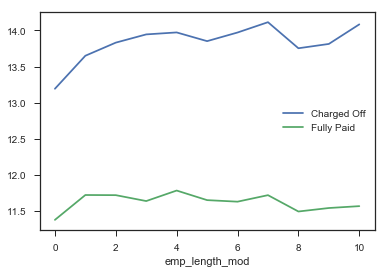

In [103]:
df = loan_df.groupby(['emp_length_mod','loan_status'], as_index = False)['int_rate_mod'].mean()

fig, ax = plt.subplots()
for name, group in df.groupby('loan_status'):
    group.plot('emp_length_mod', y='int_rate_mod', ax=ax, label=name)

We can notice difference between the status, but not within the same group. <br>

Let's check if there is a significant relationship between variables. In here we will use Chi-Square test.

    H0 (Null Hypothesis): There is no relationship between variable one and variable two.
    H1 (Alternative Hypothesis): There is a relationship between variable one and variable two.

In [104]:
df = loan_df.groupby(['emp_length_mod','loan_status'], as_index = False).size().unstack('loan_status')
stats.chi2_contingency(df)

(27.51913301125355,
 0.002154316280491315,
 10,
 array([[ 808.23306633, 4732.76693367],
        [ 462.24338336, 2706.75661664],
        [ 625.90292143, 3665.09707857],
        [ 585.20683309, 3426.79316691],
        [ 487.47787542, 2854.52212458],
        [ 465.88998626, 2728.11001374],
        [ 316.23340332, 1851.76659668],
        [ 249.57350235, 1461.42649765],
        [ 209.31500635, 1225.68499365],
        [ 178.82940612, 1047.17059388],
        [1238.09461596, 7249.90538404]]))

Let's understand the result from Chi-square:

The first value (27.5) is the Chi-square value, followed by the p-value (0.002), then comes the degrees of freedom (10), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi-square test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between employee length & loan status.

how did we arrive at the degrees of freedom? = (no. of rows - 1) x (no. of columns - 1). So in our case (11-1) x (2-1) = 10

Now lets check the relationship between enployee lenght & Interest rate

    H0 (Null Hypothesis): Interest rate is same at all length of service.
    H1 (Alternative Hypothesis): Interest rate is different in length of service.

In [105]:
Emplength_vs_loan_int = loan_df.pivot_table(values ='int_rate_mod', index = 'emp_length_mod', dropna=True, aggfunc='mean').reset_index()
Emplength_vs_loan_int['expected']= loan_df['int_rate_mod'].mean()

import scipy.stats as stats
#from scipy.stats import chisquare
chisq = stats.chisquare(Emplength_vs_loan_int.expected, Emplength_vs_loan_int.int_rate_mod)
print("chi-square=", chisq[0])
print("p-value=",chisq[1])
crit = stats.chi2.ppf(q = 1-0.95, # Find the critical value for 95% confidence*
                      df = loan_df['emp_length_mod'].nunique()-1)   # Df = number of variable categories - 1

print("Critical value")
print(crit)
if(chisq[0] > crit):
   print("Reject the NULL hypothesis")
else:
   print("cannot reject NULL hypothesis")

chi-square= 0.013296746360973395
p-value= 0.9999999999998923
Critical value
3.9402991361190622
cannot reject NULL hypothesis


Inference: <br>
    p-value is more than 0.05. So, we failed to reject null hypothesis. There is no difference in interest rate offered based on length of service.

### Ownership

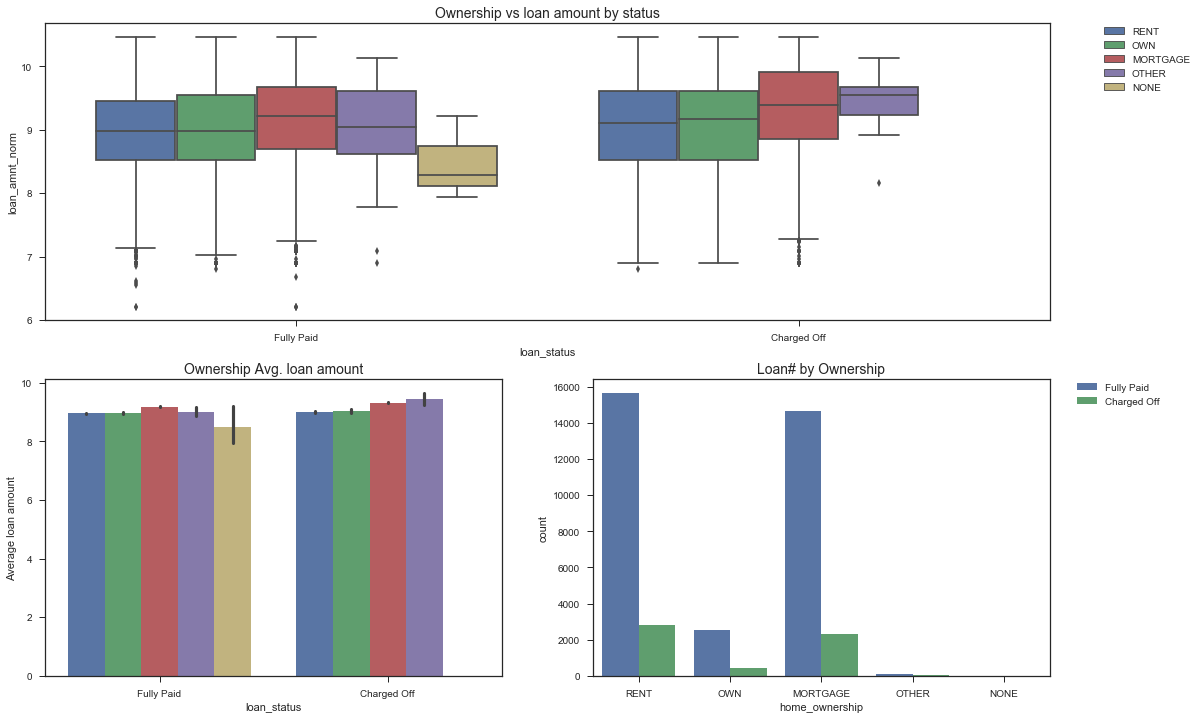

In [106]:
# What kind of ownership has applied/received the loans?
fig = plt.figure(figsize = (18,12))

gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'home_ownership', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Ownership vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'home_ownership', ax = ax2)
ax2.set_title('Ownership Avg. loan amount', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='home_ownership', data = loan_df, hue = 'loan_status', ax = ax3)
ax3.set_title('Loan# by Ownership', fontsize = 14)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [107]:
df = loan_df.groupby(['home_ownership','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
home_ownership,,,,,,,,
MORTGAGE,2327.00,14694.00,17021.00,0.14,0.86,0.41,0.45,0.93
OWN,443.00,2532.00,2975.00,0.15,0.85,0.08,0.08,1.02
RENT,2839.00,15641.00,18480.00,0.15,0.85,0.50,0.47,1.06
OTHER,18.00,80.00,98.00,0.18,0.82,0.00,0.00,1.32
NONE,nan,3.00,nan,nan,nan,nan,0.00,nan


- Rent & Mortgage has higher number of defaults
- Mortgage is still a better bet as per the index

*Will Interest rate differs across the ownership??*

In [108]:
df = loan_df.groupby(['home_ownership','loan_status'], as_index = False)['int_rate_mod'].mean()
df = df.pivot_table('int_rate_mod', ['home_ownership'], 'loan_status')
df

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,13.79,11.33
NONE,nan,8.70
OTHER,13.19,11.78
OWN,13.70,11.34
RENT,13.87,11.92


We can notice the difference in interest rate within each group <br>
Defaulters has higher interest rates when compared to paid off borrowers

Let's check if there is a statistical significant relationship between variables. From above we can notice Other & None counts are very less. Let's ignore them from our analysis

    H0 (Null Hypothesis): There is no relationship between variable one and variable two.
    H1 (Alternative Hypothesis): There is a relationship between variable one and variable two.

In [109]:
df = loan_df[loan_df['home_ownership'].isin(['MORTGAGE','OWN','RENT'])].groupby(['home_ownership','loan_status'], as_index = False).size().unstack('loan_status')
stats.chi2_contingency(df)

(20.60386392266276,
 3.356818007330024e-05,
 2,
 array([[ 2481.30754236, 14539.69245764],
        [  433.6930814 ,  2541.3069186 ],
        [ 2693.99937623, 15786.00062377]]))

The p-value (3.356818007330024e-05) is less than 0.05. So, we can reject the null hypothesis, which confirms that there is a relationship between home ownership & loan status.

### Income category

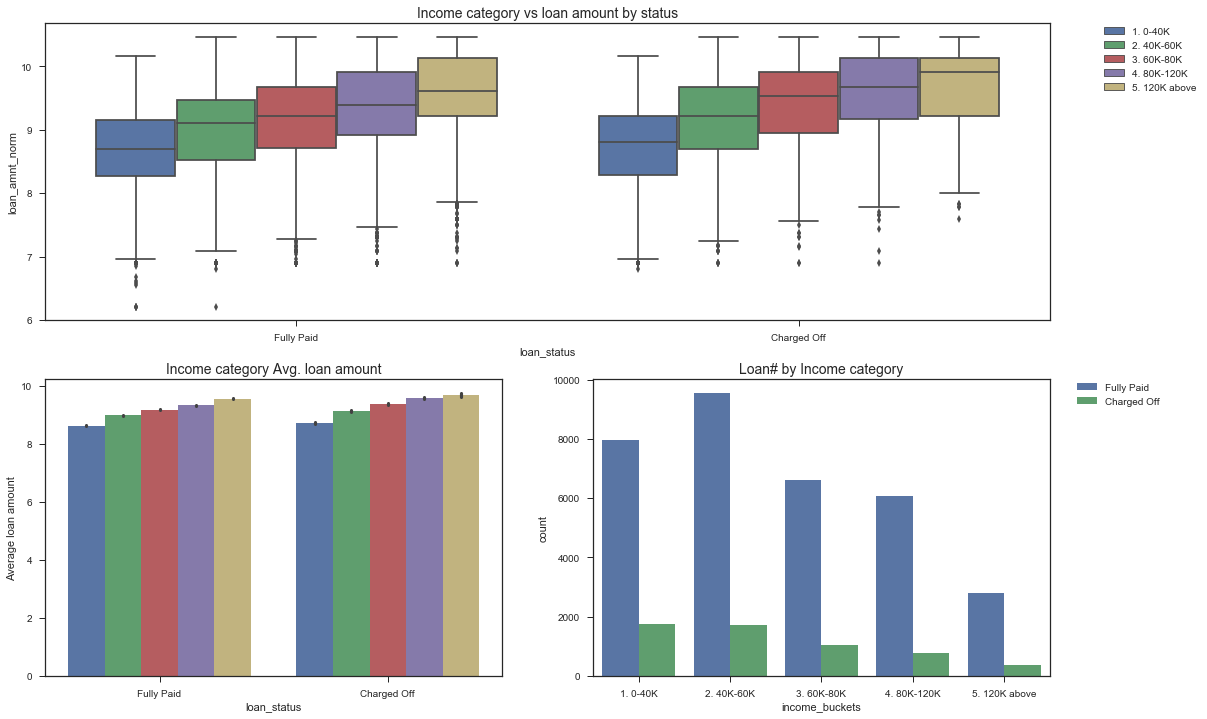

In [110]:
# Let's check how annual income performs?
# We are going to use income buckets which we have categorised annual income to
fig = plt.figure(figsize = (18,12))

gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'income_buckets', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Income category vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'income_buckets', ax = ax2)
ax2.set_title('Income category Avg. loan amount', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='income_buckets', data = loan_df, hue = 'loan_status', ax = ax3)
ax3.set_title('Loan# by Income category', fontsize = 14)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [111]:
df = loan_df.groupby(['income_buckets','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
income_buckets,,,,,,,,
5. 120K above,348,2805,3153,0.11,0.89,0.06,0.09,0.73
4. 80K-120K,775,6067,6842,0.11,0.89,0.14,0.18,0.75
3. 60K-80K,1024,6597,7621,0.13,0.87,0.18,0.20,0.91
2. 40K-60K,1729,9534,11263,0.15,0.85,0.31,0.29,1.06
1. 0-40K,1751,7947,9698,0.18,0.82,0.31,0.24,1.29


- As the income group raises, the loan amount increases (which is expected)
- Both Default & paid has almost the same average loan amount
- Defaults are more 0-40K & 40K-60K groups
- Higher the income the risk of default is very less

*Check the interest rates across the income group*

In [112]:
df = loan_df.groupby(['income_buckets','loan_status'], as_index = False)['int_rate_mod'].mean()
df = df.pivot_table('int_rate_mod', ['income_buckets'], 'loan_status')
df

loan_status,Charged Off,Fully Paid
income_buckets,,
1. 0-40K,13.09,11.35
2. 40K-60K,13.70,11.48
3. 60K-80K,14.29,11.59
4. 80K-120K,14.53,11.84
5. 120K above,15.14,12.35


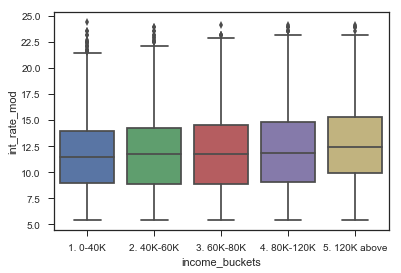

In [113]:
sns.boxplot(x='income_buckets', y= 'int_rate_mod', data = loan_df)

Interest rates are high for default group <br>
As the income group raises, the interest rate also raises


Let's check if there is a statistical significant relationship between variables.

    H0 (Null Hypothesis): There is no relationship between variable one and variable two.
    H1 (Alternative Hypothesis): There is a relationship between variable one and variable two.

In [114]:
df = loan_df.groupby(['income_buckets','loan_status'], as_index = False).size().unstack('loan_status')
stats.chi2_contingency(df)

(197.26046762598966,
 1.458226061530354e-41,
 4,
 array([[1414.59019623, 8283.40980377],
        [1642.86753765, 9620.13246235],
        [1111.63042746, 6509.36957254],
        [ 998.00228115, 5843.99771885],
        [ 459.90955751, 2693.09044249]]))

The p-value (0.00) is less than 0.05. So, we can reject the null hypothesis, which confirms that there is a relationship between income & loan status.

### Verification Status

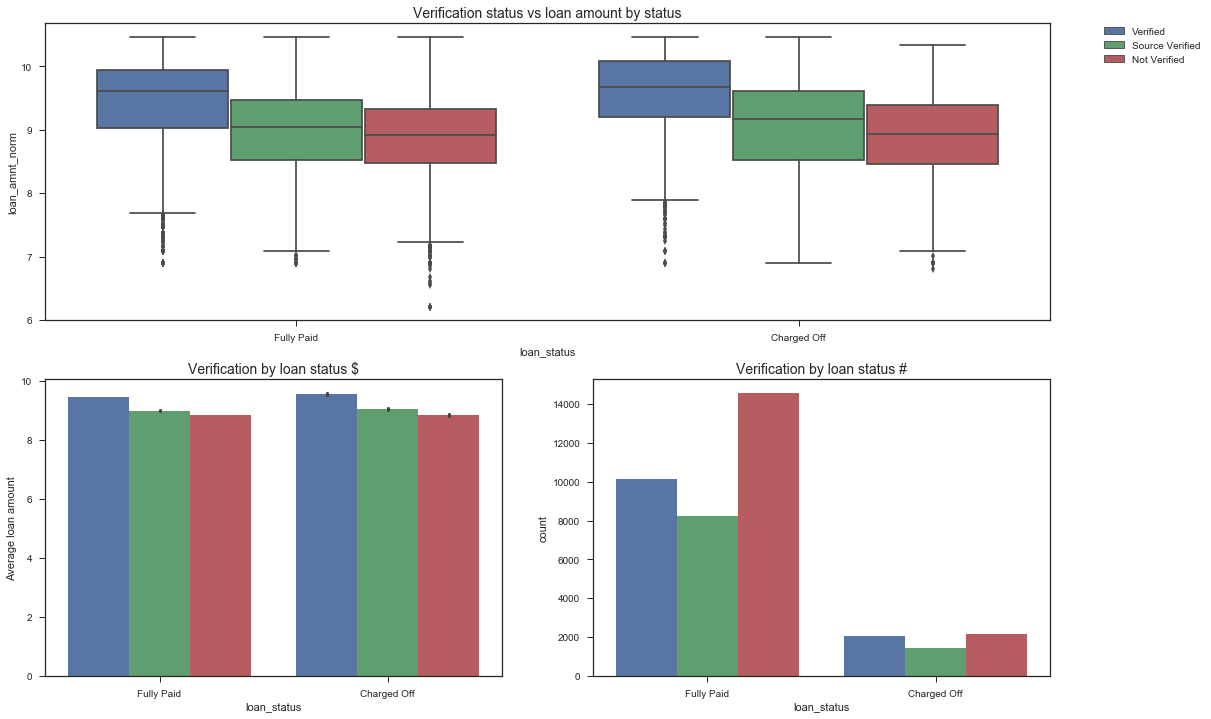

In [115]:
# Let's check verification status
fig = plt.figure(figsize = (18,12))

gs=GridSpec(2,2) # 2 rows, 2 columns

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'verification_status', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Verification status vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'verification_status', ax = ax2)
ax2.set_title('Verification by loan status $', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='loan_status', data = loan_df, hue = 'verification_status', ax = ax3)
ax3.set_title('Verification by loan status #', fontsize = 14)
ax3.legend().set_visible(False)

In [116]:
df = loan_df.groupby(['verification_status','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
verification_status,,,,,,,,
Not Verified,2142,14552,16694,0.13,0.87,0.38,0.44,0.86
Source Verified,1434,8243,9677,0.15,0.85,0.25,0.25,1.02
Verified,2051,10155,12206,0.17,0.83,0.36,0.31,1.18


- Strange, most of the loans are not verified
- Most of the loans are issued to not verified borrowers, but risk of default is less compared to verified ones
- Source verified is other category which is still better than verified category
- Conclusion, LC has to be more stringent with verification process

In [117]:
df = loan_df.groupby(['verification_status','loan_status'], as_index = False)['int_rate_mod'].mean()
df = df.pivot_table('int_rate_mod', ['verification_status'], 'loan_status')
df

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,12.69,10.95
Source Verified,14.13,11.64
Verified,14.78,12.53


### Purpose

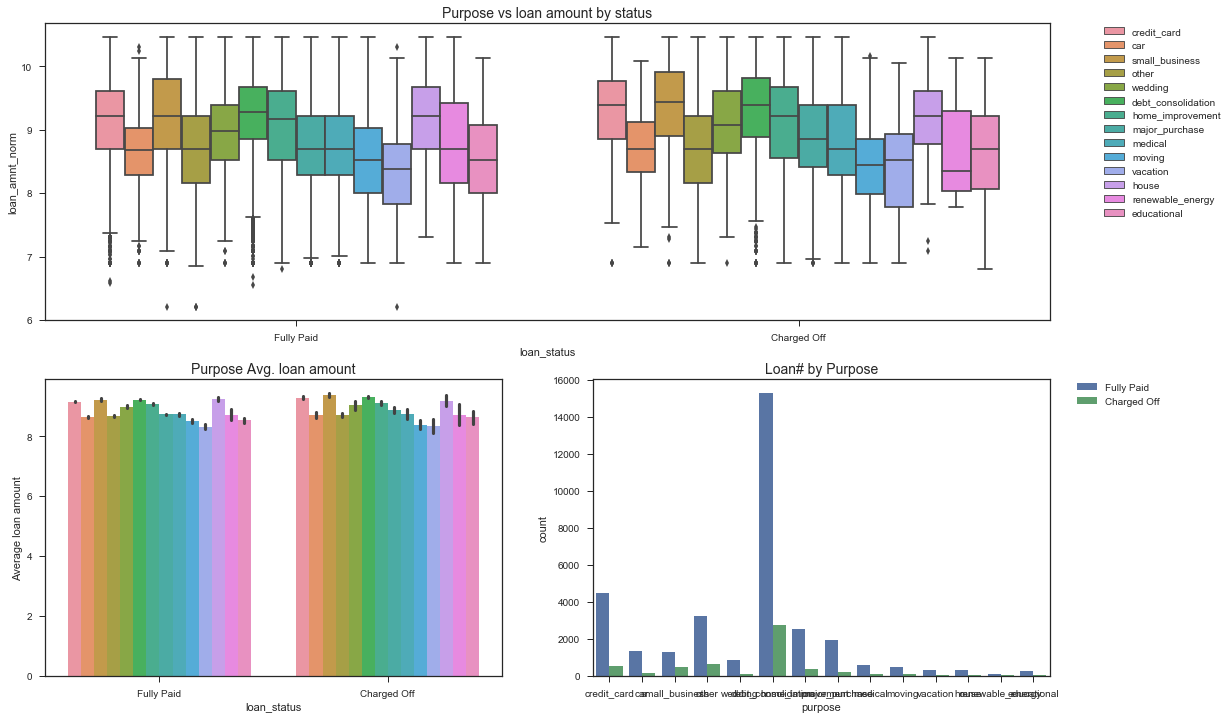

In [118]:
# For what purpose the loan has been applied?
fig = plt.figure(figsize = (18,12))

gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'purpose', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Purpose vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'purpose', ax = ax2)
ax2.set_title('Purpose Avg. loan amount', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='purpose', data = loan_df, hue = 'loan_status', ax = ax3)
ax3.set_title('Loan# by Purpose', fontsize = 14)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [119]:
df = loan_df.groupby(['purpose','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
purpose,,,,,,,,
major_purchase,222,1928,2150,0.10,0.90,0.04,0.06,0.67
wedding,96,830,926,0.10,0.90,0.02,0.03,0.68
car,160,1339,1499,0.11,0.89,0.03,0.04,0.70
credit_card,542,4485,5027,0.11,0.89,0.10,0.14,0.71
home_improvement,347,2528,2875,0.12,0.88,0.06,0.08,0.80
vacation,53,322,375,0.14,0.86,0.01,0.01,0.96
debt_consolidation,2767,15288,18055,0.15,0.85,0.49,0.46,1.06
medical,106,575,681,0.16,0.84,0.02,0.02,1.08
moving,92,484,576,0.16,0.84,0.02,0.01,1.11


- Most of the loans are issued to *debt_consolidation* and has higher number of defaults as well
- From the above, we can infer that *major_purchase, wedding, car, credit_card, home_improvement, vacation* are better loans than *small_business, renewable_energy, educational, house & moving*

In [120]:
# Let's check with loan amount. Are we seeing any different pattern?
df = loan.groupby(['purpose','loan_status'], as_index = False)['loan_amnt'].sum()
df = df.pivot_table('loan_amnt', ['purpose'], 'loan_status')

df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Current,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
purpose,,,,,,,,,
wedding,1035550.00,318675.00,7998375.00,9033925.00,0.11,0.89,0.02,0.02,0.68
car,1162275.00,385025.00,8951075.00,10113350.00,0.11,0.89,0.02,0.02,0.68
major_purchase,2027975.00,479825.00,15328125.00,17356100.00,0.12,0.88,0.03,0.04,0.70
credit_card,7054100.00,1972650.00,51115400.00,58169500.00,0.12,0.88,0.10,0.14,0.73
home_improvement,4134050.00,1824225.00,28376450.00,32510500.00,0.13,0.87,0.06,0.08,0.77
moving,546125.00,93875.00,3237050.00,3783175.00,0.14,0.86,0.01,0.01,0.89
vacation,311425.00,49925.00,1720175.00,2031600.00,0.15,0.85,0.00,0.00,0.95
house,745775.00,299550.00,3934725.00,4680500.00,0.16,0.84,0.01,0.01,1.00
medical,908250.00,195125.00,4623350.00,5531600.00,0.16,0.84,0.01,0.01,1.03


In [121]:
df = loan_df.groupby(['purpose', 'issue_Year','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

df.reset_index(level=[0,1], inplace=True)

pd.pivot_table(df,index=['purpose'],values=['BGLI'],columns=['issue_Year'])

loan_status        BGLI                    
issue_Year         2007 2008 2009 2010 2011
purpose                                    
car                 nan 1.21 0.75 0.58 0.73
credit_card        0.29 0.90 0.54 0.59 0.80
debt_consolidation 1.39 1.18 0.82 0.89 1.19
educational        1.17 1.53 1.05 1.34  nan
home_improvement   1.30 1.00 0.77 0.75 0.83
house               nan 0.49 1.41 1.27 1.03
major_purchase     1.46 1.01 0.58 0.71 0.64
medical             nan 0.49 1.27 0.91 1.19
moving             5.86  nan 0.69 0.81 1.46
other              0.98 1.11 0.93 0.98 1.36
renewable_energy    nan  nan  nan 1.95 1.25
small_business     3.66 2.22 1.59 2.02 2.44
vacation            nan  nan 0.76 1.37 0.85
wedding            1.95 0.47 0.74 0.45 0.79

Is the trend same across the years?
- credit_card, car seems to be consistently better loans
- Followed by wedding, major_purchase & home_improvement
- small_business are the risky loans across all the loans
- The other bad performance is by educational & house borrowers

In [122]:
df = loan_df.groupby(['purpose','loan_status'], as_index = False)['int_rate_mod'].mean()
df = df.pivot_table('int_rate_mod', ['purpose'], 'loan_status')
df

loan_status,Charged Off,Fully Paid
purpose,,
car,12.37,10.23
credit_card,13.40,11.41
debt_consolidation,14.28,12.06
educational,12.72,11.43
home_improvement,13.30,11.01
house,15.26,11.57
major_purchase,12.86,10.56
medical,13.32,11.08
moving,12.31,11.38


Let's check if there is a statistical significant relationship between variables.

    H0 (Null Hypothesis): There is no relationship between variable one and variable two.
    H1 (Alternative Hypothesis): There is a relationship between variable one and variable two.

In [123]:
df = loan_df.groupby(['purpose','loan_status'], as_index = False).size().unstack('loan_status')
stats.chi2_contingency(df)

(378.9439492892116,
 6.213959204644354e-73,
 13,
 array([[2.18650310e+02, 1.28034969e+03],
        [7.33258911e+02, 4.29374109e+03],
        [2.63357661e+03, 1.54214234e+04],
        [4.74058377e+01, 2.77594162e+02],
        [4.19359333e+02, 2.45564067e+03],
        [5.35321305e+01, 3.13467869e+02],
        [3.13607849e+02, 1.83639215e+03],
        [9.93334629e+01, 5.81666537e+02],
        [8.40177308e+01, 4.91982269e+02],
        [5.63764808e+02, 3.30123519e+03],
        [1.48781398e+01, 8.71218602e+01],
        [2.55845659e+02, 1.49815434e+03],
        [5.46990435e+01, 3.20300957e+02],
        [1.35070171e+02, 7.90929829e+02]]))

The p-value (0.0) which is less than 0.05. So, we can reject the null hypothesis. It confirms that there is a relationship between home purpose & loan status.

Let's check if there is a statistical significant relationship between purpose & interest rate.

    H0 (Null Hypothesis): Interest rate is same for all purposes.
    H1 (Alternative Hypothesis): Interest rate is different for atleast one purpose.

In [124]:
purpose_loan_vs_loan_int = loan_df.pivot_table(values ='int_rate_mod', index = 'purpose', dropna=True, aggfunc='mean').reset_index()
purpose_loan_vs_loan_int['expected']= loan_df['int_rate_mod'].mean()

import scipy.stats as stats
#from scipy.stats import chisquare
chisq = stats.chisquare(purpose_loan_vs_loan_int.expected, purpose_loan_vs_loan_int.int_rate_mod)
print("chi-square=", chisq[0])
print("p-value=",chisq[1])
crit = stats.chi2.ppf(q = 1-0.95, # Find the critical value for 95% confidence*
                      df = loan_df['purpose'].nunique()-1)   # Df = number of variable categories - 1

print("Critical value")
print(crit)
if(chisq[0] > crit):
   print("Reject the NULL hypothesis")
else:
   print("cannot reject NULL hypothesis")

chi-square= 0.6485051095047427
p-value= 0.9999997327732029
Critical value
5.891864337709848
cannot reject NULL hypothesis


Inference: <br>
    p-value is higher i.e. more than 0.05. So, we failed to reject null hypothesis. It means that the interest rate is same for all the purposes.

### Region Analysis

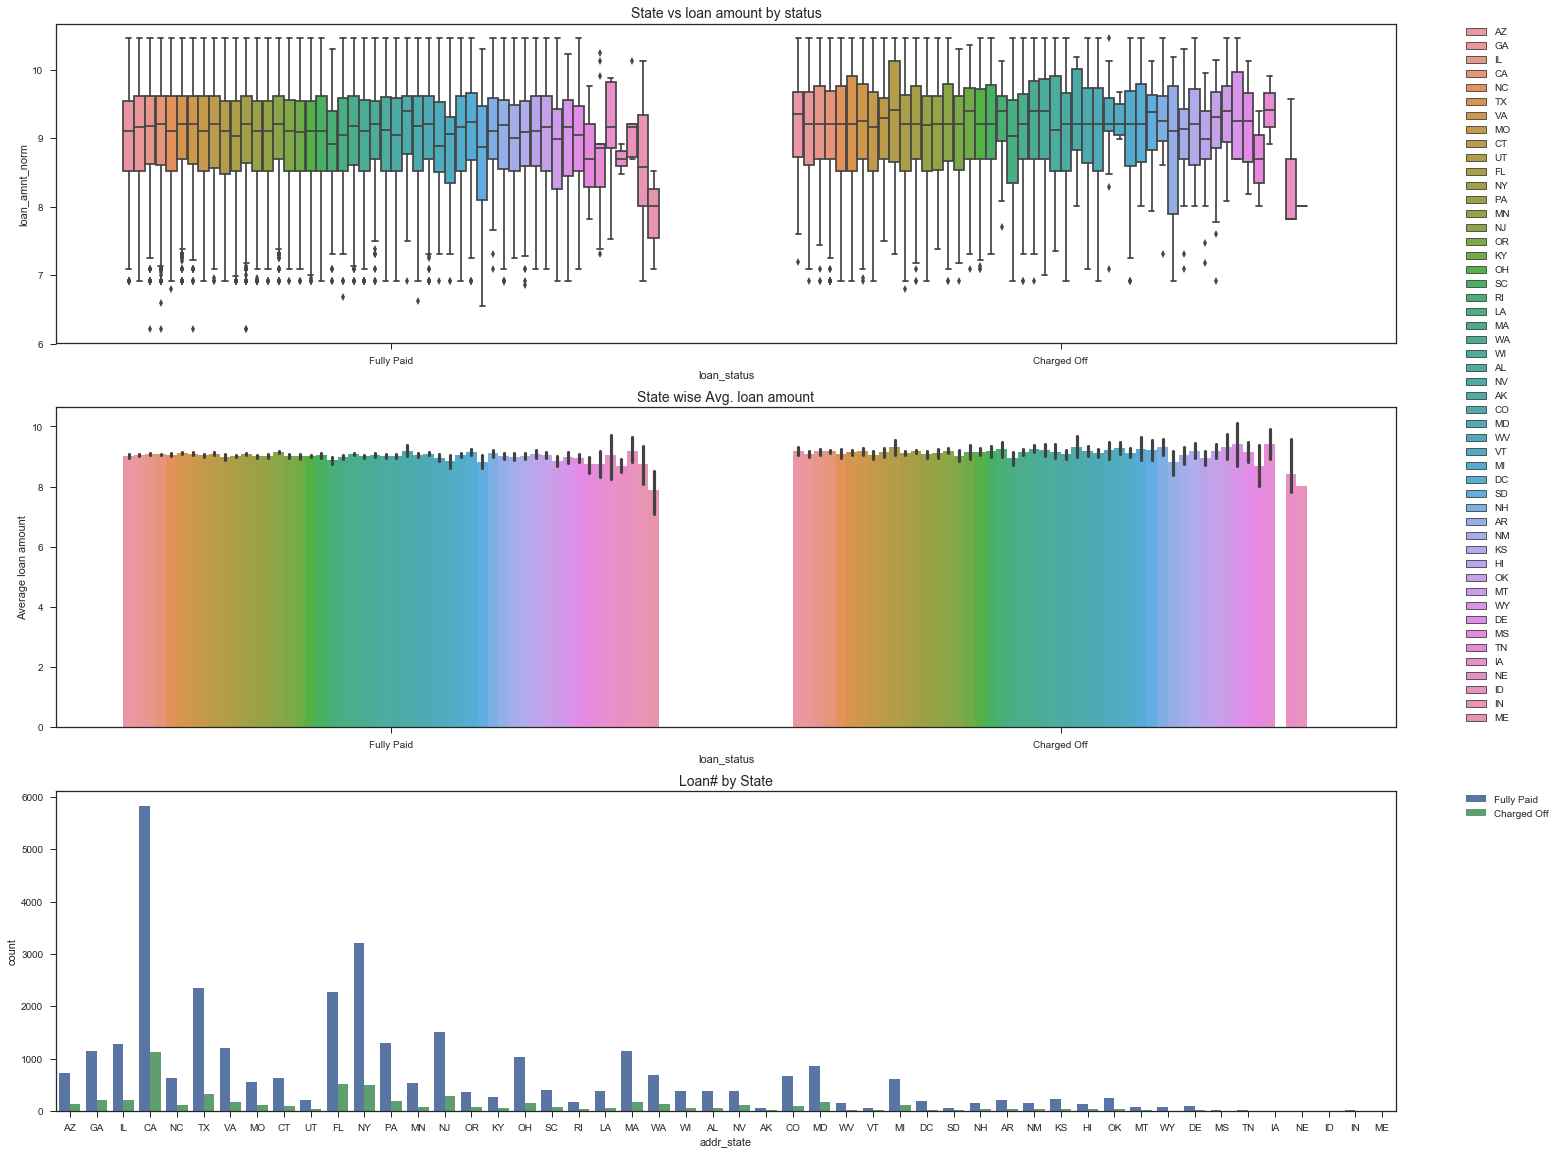

In [125]:
# Are there a particular Region/State causing the problem?
fig = plt.figure(figsize = (24,20))

gs=GridSpec(3,2)

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,:]) # Second row, first column
ax3=fig.add_subplot(gs[2,:]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'addr_state', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('State vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'addr_state', ax = ax2)
ax2.set_title('State wise Avg. loan amount', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='addr_state', data = loan_df, hue = 'loan_status', ax = ax3)
ax3.set_title('Loan# by State', fontsize = 14)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [126]:
df = loan_df.groupby(['addr_state','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
addr_state,,,,,,,,
WY,4.00,76.00,80.00,0.05,0.95,0.00,0.00,0.31
DC,15.00,196.00,211.00,0.07,0.93,0.00,0.01,0.45
MS,2.00,17.00,19.00,0.11,0.89,0.00,0.00,0.69
DE,12.00,101.00,113.00,0.11,0.89,0.00,0.00,0.70
VT,6.00,47.00,53.00,0.11,0.89,0.00,0.00,0.75
AR,27.00,208.00,235.00,0.11,0.89,0.00,0.01,0.76
TN,2.00,15.00,17.00,0.12,0.88,0.00,0.00,0.78
TX,316.00,2343.00,2659.00,0.12,0.88,0.06,0.07,0.79
KS,31.00,224.00,255.00,0.12,0.88,0.01,0.01,0.81


- There are multiple states with high default ratio
- State 'NE' shows the highest dafult ratio, but the number of loans issued are very less. Follwed by state 'NV'

Can we group them by Region wise & find a behavior if a particular region has a problem

In [127]:
# Make a list with each of the regions by state.
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

Source for the grouping above: https://www.nationalgeographic.org/maps/united-states-regions/

In [128]:
def group_regions(st):
    if st in west:
        return 'West'
    elif st in south_west:
        return 'SouthWest'
    elif st in south_east:
        return 'SouthEast'
    elif st in mid_west:
        return 'MidWest'
    elif st in north_east:
        return 'NorthEast'
loan_df['region'] = loan_df['addr_state'].apply(group_regions)

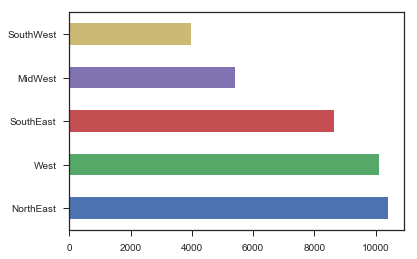

In [129]:
plt.figure(figsize= (6,4))
loan_df['region'].value_counts().plot(kind = 'barh')

So a large number of loans has been issued in NorthEast, followed by West region. <br>
Now lets see if region has any influence on loan status

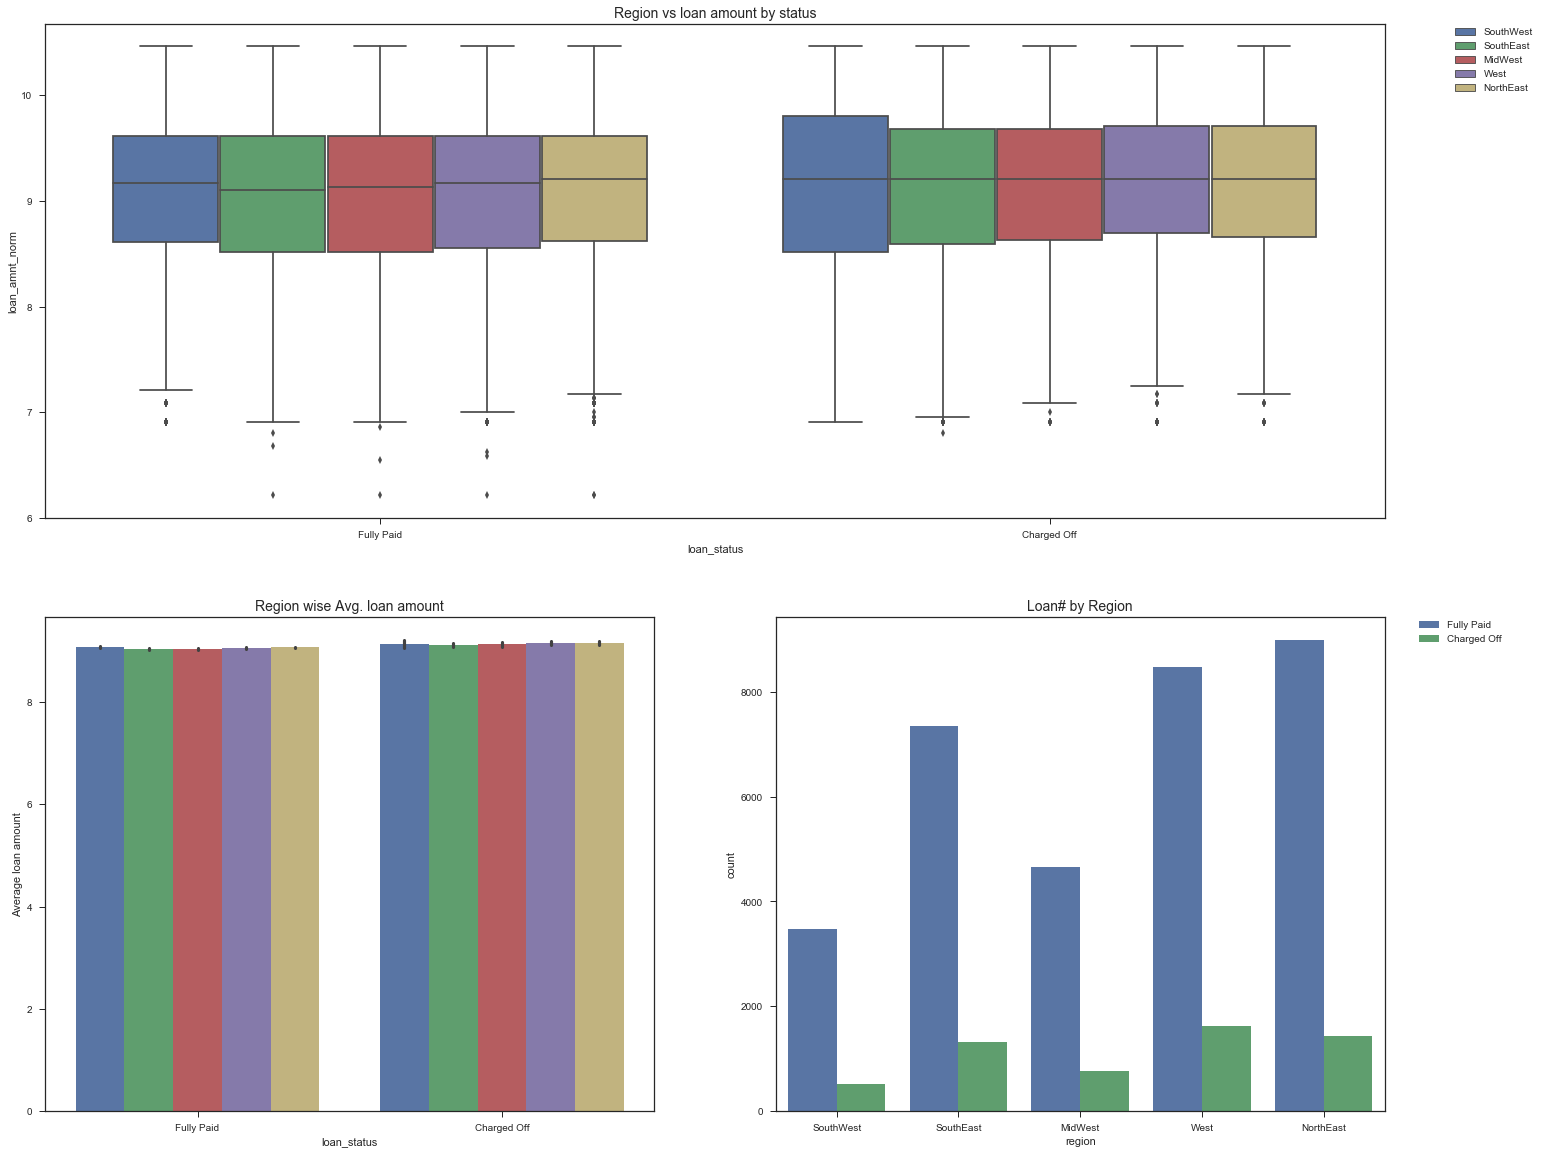

In [130]:
fig = plt.figure(figsize = (24,20))

gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'region', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Region vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status', y= 'loan_amnt_norm', data = loan_df, hue = 'region', ax = ax2)
ax2.set_title('Region wise Avg. loan amount', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='region', data = loan_df, hue = 'loan_status', ax = ax3)
ax3.set_title('Loan# by Region', fontsize = 14)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [131]:
df = loan_df.groupby(['region','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'BGLI', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
region,,,,,,,,
SouthWest,509,3469,3978,0.13,0.87,0.09,0.11,0.86
NorthEast,1424,8994,10418,0.14,0.86,0.25,0.27,0.93
MidWest,759,4652,5411,0.14,0.86,0.13,0.14,0.96
SouthEast,1307,7351,8658,0.15,0.85,0.23,0.22,1.04
West,1628,8484,10112,0.16,0.84,0.29,0.26,1.12


- Most of the loans are issued to NorthEast, West & SouthEast regions
- Based on the index, we can infer that West has highest defaulter ratio

In [132]:
df = loan_df.groupby(['region','loan_status'], as_index = False)['int_rate_mod'].mean()
df = df.pivot_table('int_rate_mod', ['region'], 'loan_status')
df

loan_status,Charged Off,Fully Paid
region,,
MidWest,13.77,11.48
NorthEast,13.85,11.63
SouthEast,13.70,11.52
SouthWest,13.97,11.65
West,13.86,11.72


Across all the regions, the interest rate seems to be constant. <br>
Let's validate it through hypothesis

    H0 (Null Hypothesis): Interest rate is same for all states.
    H1 (Alternative Hypothesis): Interest rate is different for atleast one state.

In [133]:
state_vs_loan_int = loan_df.pivot_table(values ='int_rate_mod', index = 'addr_state', dropna=True, aggfunc='mean').reset_index()
state_vs_loan_int['expected']= loan_df['int_rate_mod'].mean()

import scipy.stats as stats
#from scipy.stats import chisquare
chisq = stats.chisquare(state_vs_loan_int.expected, state_vs_loan_int.int_rate_mod)
print("chi-square=", chisq[0])
print("p-value=",chisq[1])
crit = stats.chi2.ppf(q = 1-0.95, # Find the critical value for 95% confidence*
                      df = loan_df['addr_state'].nunique()-1)   # Df = number of variable categories - 1

print("Critical value")
print(crit)
if(chisq[0] > crit):
   print("Reject the NULL hypothesis")
else:
   print("cannot reject NULL hypothesis")

chi-square= 1.8302635697814382
p-value= 1.0
Critical value
33.93030561852784
cannot reject NULL hypothesis


In [134]:
df = loan_df.groupby(['region','issue_Year'], as_index = False)['int_rate_mod'].mean()
df = df.pivot_table('int_rate_mod', ['region'], 'issue_Year')
df

issue_Year,2007,2008,2009,2010,2011
region,,,,,
MidWest,9.87,11.04,12.06,11.48,11.99
NorthEast,10.62,11.29,12.21,11.85,11.99
SouthEast,10.13,10.97,12.04,11.56,12.06
SouthWest,10.16,11.05,12.32,11.69,12.08
West,10.31,11.28,12.30,11.95,12.14


Inference: <br>
    p-value is higher i.e. more than 0.05. So, we failed to reject null hypothesis. It means that the interest rate is same across all the states. <br>

On an average interest rate is same across the years & regions. So, hypothesis is hence proved

### Debt to Income Ratio

Text(0.5,1,'Distribution of dti by status - Violin plot')

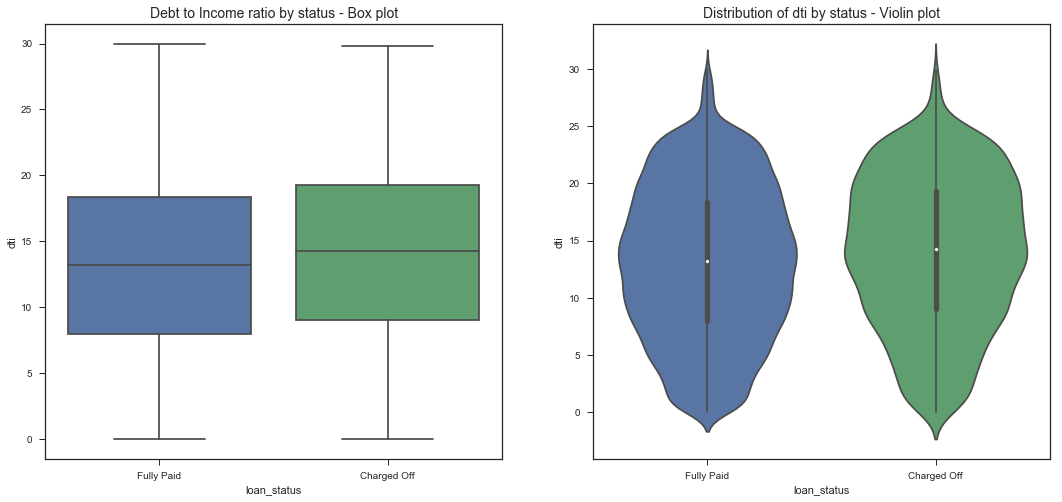

In [135]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.boxplot(x='loan_status', y= 'dti', data = loan_df, ax = ax[0])
ax[0].set_title('Debt to Income ratio by status - Box plot',fontsize=14)
sns.violinplot(x='loan_status', y= 'dti', data = loan_df, ax = ax[1])
ax[1].set_title('Distribution of dti by status - Violin plot',fontsize=14)

Defaulters has slightly higher dti than non-defaulter, but the variation is not huge
Let's check dti with other features

In [136]:
df = loan_df.groupby(['region','issue_Year'], as_index = False)['dti'].mean()
df = df.pivot_table('dti', ['region'], 'issue_Year')
df

issue_Year,2007,2008,2009,2010,2011
region,,,,,
MidWest,9.61,12.72,12.62,13.45,14.36
NorthEast,8.85,11.44,11.96,12.46,13.23
SouthEast,12.00,11.91,12.84,13.35,14.23
SouthWest,11.13,11.78,13.01,13.30,14.29
West,11.20,12.31,12.05,12.77,13.47


Across all the regions *debt to income ratio* has shown a steady increase by every year <br>

*What about the Grades??*

In [137]:
df = loan_df.groupby(['grade','issue_Year'], as_index = False)['dti'].mean()
df = df.pivot_table('dti', ['grade'], 'issue_Year').reset_index()
df

issue_Year,grade,2007,2008,2009,2010,2011
0,A,4.83,8.26,10.61,11.63,12.81
1,B,9.68,11.18,12.61,13.04,13.97
2,C,13.02,13.11,13.47,13.52,14.31
3,D,13.07,14.68,12.91,13.71,14.26
4,E,12.83,16.20,13.14,13.37,14.42
5,F,11.86,17.76,11.51,14.11,14.42
6,G,nan,16.87,11.21,14.29,14.20


Strange, even Grade A borrowers has shown a increase in their **dti**, but still less when compared to others & overall mean

In [138]:
df = loan_df.groupby(['purpose','issue_Year'], as_index = False)['dti'].mean()
df = df.pivot_table('dti', ['purpose'], 'issue_Year')
df

issue_Year,2007,2008,2009,2010,2011
purpose,,,,,
car,7.09,10.36,9.21,10.63,11.69
credit_card,11.22,13.65,13.99,14.29,14.97
debt_consolidation,11.73,13.27,13.79,14.04,14.85
educational,9.74,11.90,11.25,10.95,nan
home_improvement,7.27,9.56,9.69,10.69,11.81
house,0.28,10.28,8.83,11.54,10.75
major_purchase,11.17,10.74,9.84,10.48,11.21
medical,5.46,8.15,11.98,12.08,12.63
moving,7.20,11.09,9.25,11.82,12.16


### Deliquency in last 2 years

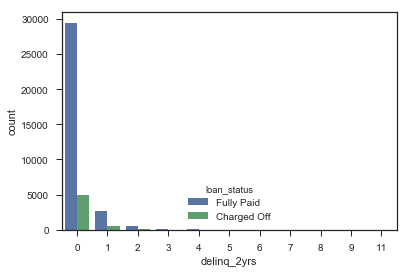

In [139]:
sns.countplot(x='delinq_2yrs', data = loan_df, hue = 'loan_status')

In [140]:
df = loan_df.groupby(['delinq_2yrs','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'delinq_2yrs', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
delinq_2yrs,,,,,,,,
0,4936.00,29450.00,34386.00,0.14,0.86,0.88,0.89,0.98
1,507.00,2700.00,3207.00,0.16,0.84,0.09,0.08,1.10
2,130.00,543.00,673.00,0.19,0.81,0.02,0.02,1.40
3,35.00,177.00,212.00,0.17,0.83,0.01,0.01,1.16
4,13.00,47.00,60.00,0.22,0.78,0.00,0.00,1.62
5,3.00,18.00,21.00,0.14,0.86,0.00,0.00,0.98
6,1.00,9.00,10.00,0.10,0.90,0.00,0.00,0.65
7,1.00,3.00,4.00,0.25,0.75,0.00,0.00,1.95
8,1.00,1.00,2.00,0.50,0.50,0.00,0.00,5.86


It clear from the data, that if a borrower delays a payment the risk of default increases (The count is very less from 5 & above. So lets ignore them)

### Inquiry in last 6 months

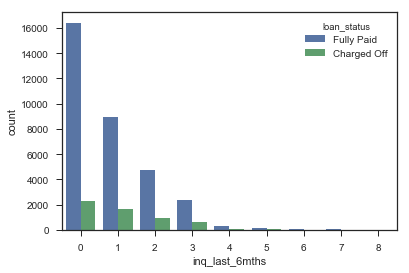

In [141]:
sns.countplot(x='inq_last_6mths', data = loan_df, hue = 'loan_status')

In [142]:
df = loan_df.groupby(['inq_last_6mths','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'inq_last_6mths', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
inq_last_6mths,,,,,,,,
0,2280,16429,18709,0.12,0.88,0.41,0.50,0.81
1,1677,8983,10660,0.16,0.84,0.30,0.27,1.09
2,943,4711,5654,0.17,0.83,0.17,0.14,1.17
3,619,2364,2983,0.21,0.79,0.11,0.07,1.53
4,51,265,316,0.16,0.84,0.01,0.01,1.13
5,28,116,144,0.19,0.81,0.00,0.00,1.41
6,16,47,63,0.25,0.75,0.00,0.00,1.99
7,10,24,34,0.29,0.71,0.00,0.00,2.44
8,3,11,14,0.21,0.79,0.00,0.00,1.60


Number of enquiries for the loans should be nil. As it increase the default ratio increases

### Open Accounts

In [143]:
df = loan_df.groupby(['open_acc','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'open_acc', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
open_acc,,,,,,,,
2,127.00,469.00,596.00,0.21,0.79,0.02,0.01,1.59
3,258.00,1212.00,1470.00,0.18,0.82,0.05,0.04,1.25
4,364.00,1936.00,2300.00,0.16,0.84,0.06,0.06,1.10
5,425.00,2686.00,3111.00,0.14,0.86,0.08,0.08,0.93
6,543.00,3303.00,3846.00,0.14,0.86,0.10,0.10,0.96
7,557.00,3352.00,3909.00,0.14,0.86,0.10,0.10,0.97
8,546.00,3268.00,3814.00,0.14,0.86,0.10,0.10,0.98
9,518.00,3089.00,3607.00,0.14,0.86,0.09,0.09,0.98
10,465.00,2632.00,3097.00,0.15,0.85,0.08,0.08,1.03


Based on volume in each of these open accounts, we can clearly see that we can concentrate until 21 accounts. <br>
Let's do the analysis with <= 21 accounts

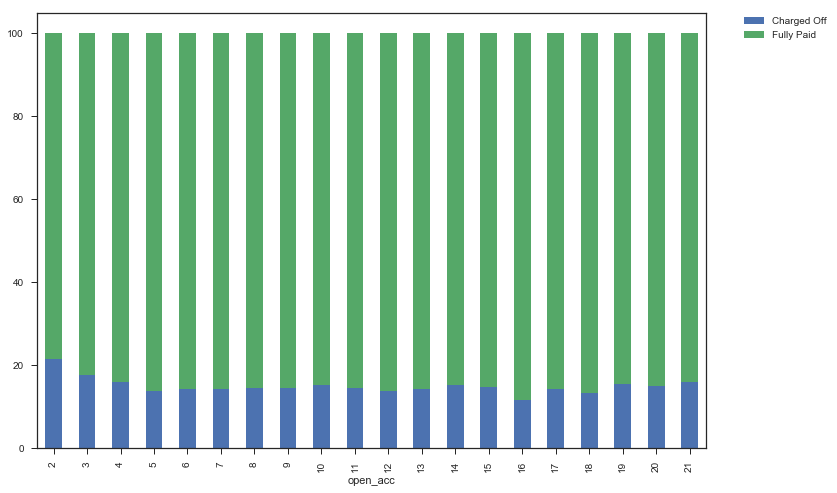

In [144]:
df = loan_df[loan_df['open_acc'] <= 21].groupby(['open_acc','loan_status'], as_index = False).size().unstack('loan_status')
percent = df.div(df.sum(1)/100,0)

ax = percent.plot(kind='bar', stacked=True, figsize=(12,8))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [145]:
df = loan_df[loan_df['open_acc'] <= 21].groupby(['open_acc'], as_index = False)['int_rate_mod'].mean()
df

,open_acc,int_rate_mod
0,2,13.68
1,3,13.73
2,4,12.57
3,5,12.01
4,6,11.36
5,7,11.55
6,8,11.62
7,9,11.66
8,10,11.77
9,11,11.86


From the above, we can infer that the interest rates are almost constant for all groups. The default rates are higher in 4 or fewer accounts.

### Public Records

In [146]:
df = loan_df.groupby(['pub_rec','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'pub_rec', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
pub_rec,,,,,,,,
0,5160.00,31347.00,36507.00,0.14,0.86,0.92,0.95,0.96
1,457.00,1556.00,2013.00,0.23,0.77,0.08,0.05,1.72
2,10.00,38.00,48.00,0.21,0.79,0.00,0.00,1.54
3,nan,7.00,nan,nan,nan,nan,0.00,nan
4,nan,2.00,nan,nan,nan,nan,0.00,nan


As long as any bankruptices or tax liens are not filed, we can lend the money to borrower atleast when compared to others who have public records

### Revol Utilization

Text(0.5,1,'Revolving Utilization by status - Violin plot')

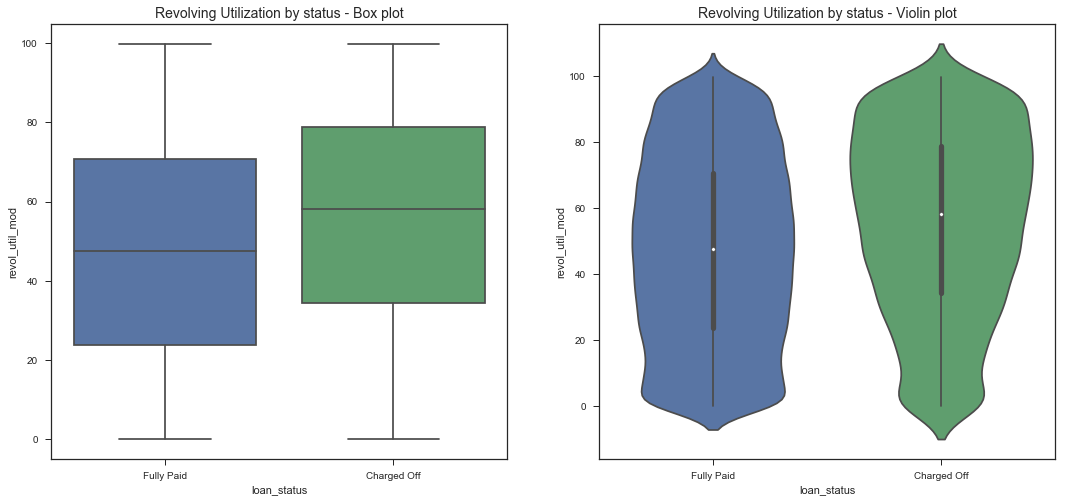

In [147]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.boxplot(x='loan_status', y= 'revol_util_mod', data = loan_df, ax = ax[0])
ax[0].set_title('Revolving Utilization by status - Box plot',fontsize=14)
sns.violinplot(x='loan_status', y= 'revol_util_mod', data = loan_df, ax = ax[1])
ax[1].set_title('Revolving Utilization by status - Violin plot',fontsize=14)

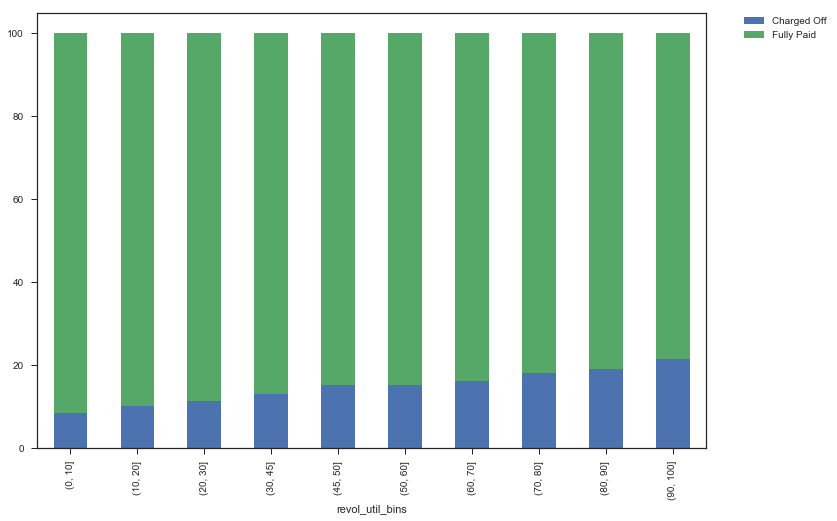

In [148]:
bins = [0, 10, 20, 30, 45, 50, 60, 70, 80, 90, 100]
loan_df['revol_util_bins'] = pd.cut(loan_df['revol_util_mod'], bins)

df = loan_df.groupby(['revol_util_bins','loan_status'], as_index = False).size().unstack('loan_status')
percent = df.div(df.sum(1)/100,0)

ax = percent.plot(kind='bar', stacked=True, figsize=(12,8))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [149]:
df = loan_df.groupby(['revol_util_bins','loan_status'], as_index = False).size().unstack('loan_status')
df['Total'] = df['Charged Off'] + df['Fully Paid']
df['ChargedOff_row%'] = df['Charged Off']/df['Total']
df['FullyPaid_row%'] = df['Fully Paid']/df['Total']

df['Badloan%'] = df['Charged Off']/df['Charged Off'].sum()
df['Goodloan%'] = df['Fully Paid']/df['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df['BGLI'] = df['Badloan%']/df['Goodloan%']
df.sort_values(by = 'revol_util_bins', ascending = True)

loan_status,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
revol_util_bins,,,,,,,,
"(0, 10]",293,3188,3481,0.08,0.92,0.05,0.10,0.54
"(10, 20]",333,2992,3325,0.10,0.90,0.06,0.09,0.65
"(20, 30]",414,3290,3704,0.11,0.89,0.08,0.10,0.74
"(30, 45]",783,5285,6068,0.13,0.87,0.14,0.16,0.87
"(45, 50]",324,1833,2157,0.15,0.85,0.06,0.06,1.04
"(50, 60]",630,3554,4184,0.15,0.85,0.12,0.11,1.04
"(60, 70]",659,3458,4117,0.16,0.84,0.12,0.11,1.12
"(70, 80]",697,3200,3897,0.18,0.82,0.13,0.10,1.28
"(80, 90]",678,2887,3565,0.19,0.81,0.12,0.09,1.38


In [150]:
df = loan_df.groupby(['revol_util_bins','loan_status'], as_index = False)['int_rate_mod'].mean()
df = df.pivot_table('int_rate_mod', ['loan_status'], 'revol_util_bins')
df

revol_util_bins,"(0, 10]","(10, 20]","(20, 30]","(30, 45]","(45, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
loan_status,,,,,,,,,,
Charged Off,11.41,11.76,11.97,12.76,13.46,13.48,13.82,14.88,15.20,16.38
Fully Paid,9.18,9.31,10.07,10.98,11.43,12.00,12.37,13.17,13.66,15.29


The default rate of loans raises with rising revolving line utilization of the borrowers

Text(0.5,1,'Distribution of interest rates by Revolving Utilization')

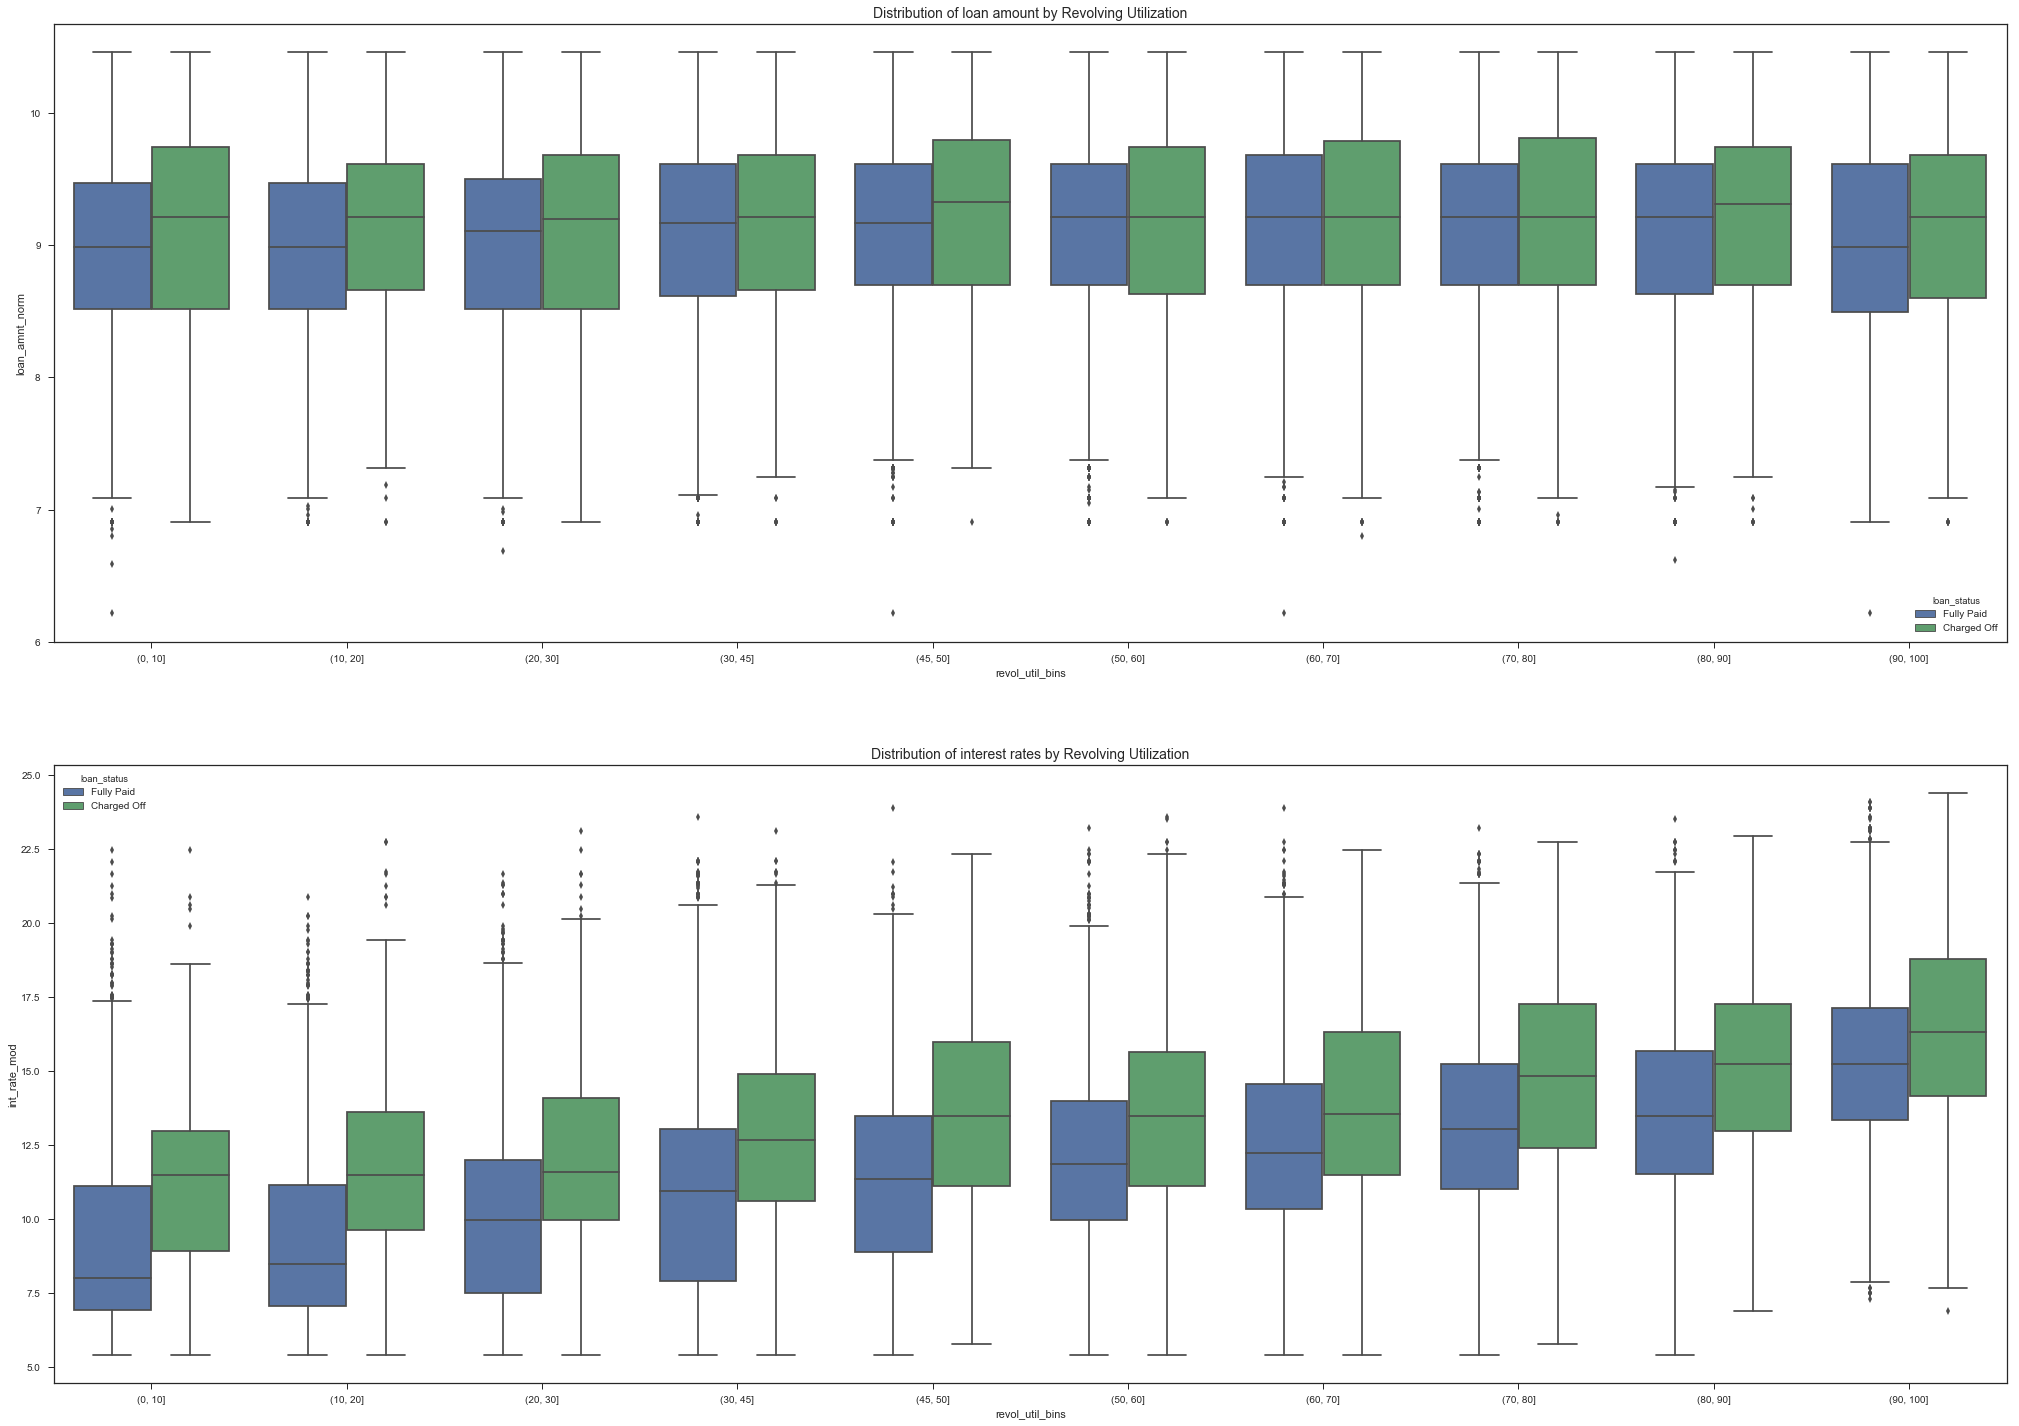

In [151]:
fig, ax = plt.subplots(2, 1, figsize=(35,25))
sns.boxplot(x='revol_util_bins', y= 'loan_amnt_norm', hue = 'loan_status', data = loan_df, ax = ax[0])
ax[0].set_title('Distribution of loan amount by Revolving Utilization',fontsize=14)

sns.boxplot(x='revol_util_bins', y= 'int_rate_mod', hue = 'loan_status', data = loan_df, ax = ax[1])
ax[1].set_title('Distribution of interest rates by Revolving Utilization',fontsize=14)

### Installment

Text(0.5,1,'Installment by status - Violin plot')

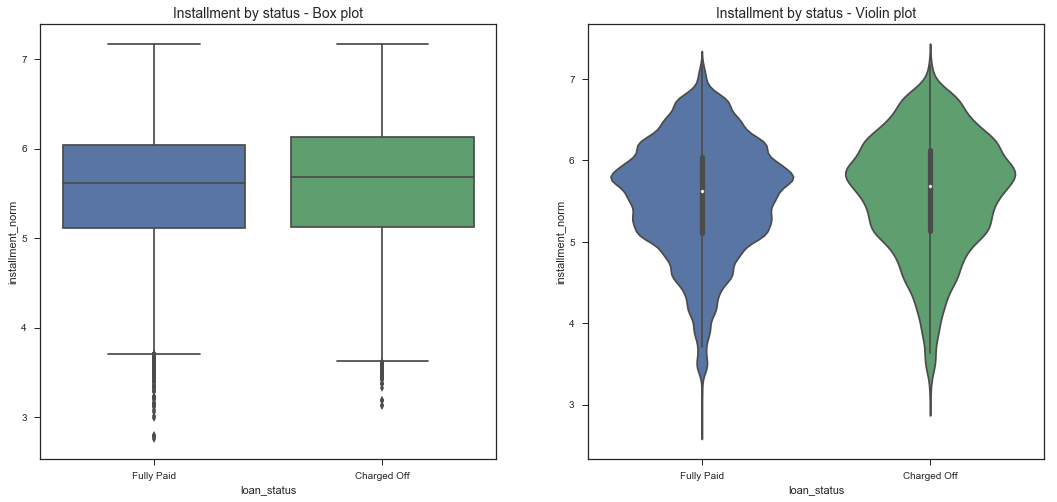

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.boxplot(x='loan_status', y= 'installment_norm', data = loan_df, ax = ax[0])
ax[0].set_title('Installment by status - Box plot',fontsize=14)
sns.violinplot(x='loan_status', y= 'installment_norm', data = loan_df, ax = ax[1])
ax[1].set_title('Installment by status - Violin plot',fontsize=14)

C:\Users\vm5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Installment by status - Violin plot')

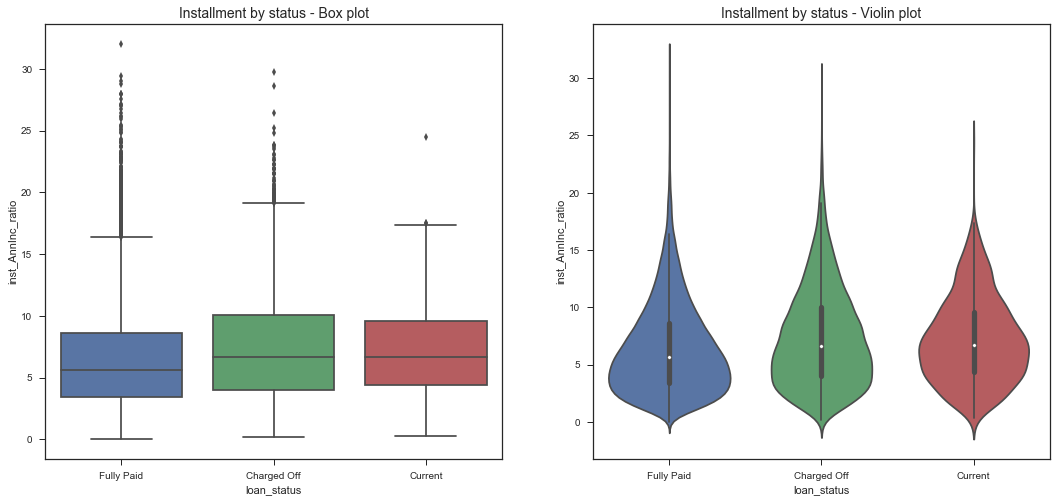

In [153]:
df = loan[['installment','annual_inc','loan_status','int_rate_mod']]
df['inst_AnnInc_ratio'] = 100 * ((df['installment']*12)/df['annual_inc'])

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.boxplot(x='loan_status', y= 'inst_AnnInc_ratio', data = df, ax = ax[0])
ax[0].set_title('Installment by status - Box plot',fontsize=14)
sns.violinplot(x='loan_status', y= 'inst_AnnInc_ratio', data = df, ax = ax[1])
ax[1].set_title('Installment by status - Violin plot',fontsize=14)

In [154]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
df['inst_AnnInc_bins'] = pd.cut(df['inst_AnnInc_ratio'], bins)

df_ratio = df[df['loan_status']!= 'Current'].groupby(['inst_AnnInc_bins','loan_status'], as_index = False)['int_rate_mod'].mean()
df_ratio = df_ratio.pivot_table('int_rate_mod', ['loan_status'], 'inst_AnnInc_bins')
df_ratio

C:\Users\vm5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


inst_AnnInc_bins,"(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]"
loan_status,,,,,,,
Charged Off,13.00,14.05,14.60,14.61,13.68,11.96,nan
Fully Paid,10.93,11.94,12.59,12.42,12.41,12.22,9.76


In [155]:
df_ratio = df[df['loan_status']!= 'Current'].groupby(['inst_AnnInc_bins','loan_status'], as_index = False).size().unstack('loan_status').reset_index()

df_ratio['Total'] = df_ratio['Charged Off'] + df_ratio['Fully Paid']
df_ratio['ChargedOff_row%'] = df_ratio['Charged Off']/df_ratio['Total']
df_ratio['FullyPaid_row%'] = df_ratio['Fully Paid']/df_ratio['Total']

df_ratio['Badloan%'] = df_ratio['Charged Off']/df_ratio['Charged Off'].sum()
df_ratio['Goodloan%'] = df_ratio['Fully Paid']/df_ratio['Fully Paid'].sum()
# Lets create a index variable named BGLI (Bad_to_Good_loan_Index) = Bad%/Good%
df_ratio['BGLI'] = df_ratio['Badloan%']/df_ratio['Goodloan%']
df_ratio.sort_values(by = 'inst_AnnInc_bins', ascending = True)

loan_status,inst_AnnInc_bins,Charged Off,Fully Paid,Total,ChargedOff_row%,FullyPaid_row%,Badloan%,Goodloan%,BGLI
0,"(0, 5]",1935.00,14189.00,16124.00,0.12,0.88,0.34,0.43,0.80
1,"(5, 10]",2268.00,13064.00,15332.00,0.15,0.85,0.40,0.40,1.02
2,"(10, 15]",1099.00,4530.00,5629.00,0.20,0.80,0.20,0.14,1.42
3,"(15, 20]",285.00,1022.00,1307.00,0.22,0.78,0.05,0.03,1.63
4,"(20, 25]",36.00,124.00,160.00,0.23,0.78,0.01,0.00,1.70
5,"(25, 30]",4.00,20.00,24.00,0.17,0.83,0.00,0.00,1.17
6,"(30, 35]",nan,1.00,nan,nan,nan,nan,0.00,nan


Installment to Annual Income ratio is nothing but the total yearly installment divided by Annual income. This ratio helps us in understanding the borrowers ability to pay back the loan. <br>

From the above table, we can infer that if the ratio is less than 5% - risk of default is less. With little risk, we can go upto 10%. <br> Anything above will be high risk of default

## Risk Assessment

## Steps:
### Identify few derived variables
   ### 1. Month since last derogatory records by bucketing the mths_since_last_record

In [156]:
# Derrogotary Record since Month buckets
loan_df['der_record_mnth_buckets'] = loan_df['mths_since_last_record'].apply(lambda x: 1 if x <= 0 
                                                  else (2 if x <= 5 
                                                        else (3 if x <= 11
                                                              else (4 if x <= 23
                                                                        else 5
                                                                  )
                                                            )
                                                       )
                                                 )
loan_df['der_record_mnth_buckets'].value_counts().sort_index()

1      670
2        1
3        4
4       29
5    37873
Name: der_record_mnth_buckets, dtype: int64

In [157]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
loan_amnt                  38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
grade                      38577 non-null object
sub_grade                  38577 non-null object
home_ownership             38577 non-null object
verification_status        38577 non-null object
loan_status                38577 non-null object
purpose                    38577 non-null object
addr_state                 38577 non-null object
dti                        38577 non-null float64
delinq_2yrs                38577 non-null int64
earliest_cr_line           38577 non-null object
inq_last_6mths             38577 non-null int64
mths_since_last_delinq     13672 non-null float64
mths_since_last_record     2740 non-null float64
open_acc                   38577 non-null int64
pub_rec                    38577 non-null int64
revol_bal  

   ### 2. Average revolving credit. This is derived with revoling balance and revolving utilzation percentage  per open account 

In [158]:
loan_df['Avg_revol_Credit'] = (round(loan_df['revol_bal'],2)*(1-round(loan_df['revol_util_mod'],2)/100))/round(loan_df['open_acc'],2)

In [159]:
# Revolving credit buckets
loan_df['Avg_revol_Credit_bucket'] = loan_df['Avg_revol_Credit'].apply(lambda x: 1 if x <= 0 
                                                  else (2 if x <= 99 
                                                        else (3 if x <= 499
                                                              else (4 if x <= 749
                                                                  else (5 if x <= 999
                                                                        else 6
                                                                      )
                                                                  )
                                                            )
                                                       )
                                                 )
loan_df['Avg_revol_Credit_bucket'].value_counts().sort_index()

1      972
2     4546
3    18045
4     6305
5     3491
6     5218
Name: Avg_revol_Credit_bucket, dtype: int64

In [160]:
loan_df['Avg_revol_Credit_norm'] = loan_df['Avg_revol_Credit'].apply(lambda x: np.log(x) if x>=0 else x)

   ### 3. How old the credit was establised by categorizing the earliest_cr_line_mod

In [161]:
# Creditline history
loan_df['Months_credit_estd'] = (loan_df['issue_d_mod'].dt.year-loan_df['earliest_cr_line_mod'].dt.year).apply(lambda x: 1 if x == 1 
                                                  else (2 if x == 2 
                                                        else (3 if x > 2 and x <= 4
                                                             else 4
                                                            )
                                                       )
                                                 )
loan_df['Months_credit_estd'].value_counts().sort_index()

3     1570
4    37007
Name: Months_credit_estd, dtype: int64

### 4. What is the need for the new credit line by categorizing the inquiries in the last 6 months inq_last_6mths

In [162]:
# Inquiry last 6 months bucket
loan_df['inq_last_6mths_bucket'] = loan_df['inq_last_6mths'].apply(lambda x: x if x <=3 
                                                  else 4
                                                 )
loan_df['inq_last_6mths_bucket'].value_counts().sort_index()

0    18709
1    10660
2     5654
3     2983
4      571
Name: inq_last_6mths_bucket, dtype: int64

### 5. What is the credit mix of the accounts by categorizing the open_acc 

In [163]:
# Credit Mix
loan_df['open_acc_bucket'] = loan_df['open_acc'].apply(lambda x: x if x <=3 
                                                  else 4
                                                 )
loan_df['open_acc_bucket'].value_counts().sort_index()

2      596
3     1470
4    36511
Name: open_acc_bucket, dtype: int64

### 6. Number of delinquencies in the last 2 years by categorizing the delinq_2yrs

In [164]:
# delinq_2yrs_bucket
loan_df['delinq_2yrs_bucket'] = loan_df['delinq_2yrs'].apply(lambda x: x if x <=3 
                                                  else 4
                                                 )
loan_df['delinq_2yrs_bucket'].value_counts().sort_index()

0    34386
1     3207
2      673
3      212
4       99
Name: delinq_2yrs_bucket, dtype: int64

### 7. Utilization percentage of the revolving account by categorizing the revol_util_mod

In [165]:
# revol_util_mod
loan_df['revol_util_mod_bucket'] = loan_df['revol_util_mod'].apply(lambda x: 1 if x <= 10 
                                                              else (2 if x <= 25
                                                                  else (3 if x<=50 
                                                                      else (4 if x<=80 
                                                                                 else 5
                                                                           )
                                                                       )
                                                                   )
                                                            )
loan_df['revol_util_mod_bucket'].value_counts().sort_index()

1     4485
2     5155
3    10099
4    12198
5     6640
Name: revol_util_mod_bucket, dtype: int64

In [166]:
loan_df['loan_status'].value_counts().sort_index()

Charged Off     5627
Fully Paid     32950
Name: loan_status, dtype: int64

In [167]:
# Creditline history
loan_df['loan_status_code'] = loan_df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' 
                                                  else (2 if x == 'Current' 
                                                             else 3
                                                       )
                                                 )
loan_df['loan_status_code'].value_counts().sort_index()

1    32950
3     5627
Name: loan_status_code, dtype: int64

In [168]:
cs_df = loan_df.filter(['id','annual_inc','loan_amnt','loan_amnt_norm','loan_status_code','dti','int_rate_mod', 
                          'der_record_mnth','Avg_revol_Credit','Months_credit_estd','inq_last_6mths','delinq_2yrs',
                          'revol_util_mod','open_acc','Avg_revol_Credit_bucket','der_record_mnth_buckets', 'inq_last_6mths_bucket',
                          'delinq_2yrs_bucket','revol_util_mod_bucket','open_acc_bucket'
                         ], 
                         axis=1)

#created new data frame to calculated the score based on the derived variables

In [169]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
loan_amnt                  38577 non-null int64
loan_amnt_norm             38577 non-null float64
loan_status_code           38577 non-null int64
dti                        38577 non-null float64
int_rate_mod               38577 non-null float64
Avg_revol_Credit           38577 non-null float64
Months_credit_estd         38577 non-null int64
inq_last_6mths             38577 non-null int64
delinq_2yrs                38577 non-null int64
revol_util_mod             38577 non-null float64
open_acc                   38577 non-null int64
Avg_revol_Credit_bucket    38577 non-null int64
der_record_mnth_buckets    38577 non-null int64
inq_last_6mths_bucket      38577 non-null int64
delinq_2yrs_bucket         38577 non-null int64
revol_util_mod_bucket      38577 non-null int64
open_acc_bucket            38577 non-null int64
dtypes: float64(5), int64(12)
memory usage: 6.5 MB


### Calculating Risk Sores for each derived categories

In [170]:
# Assign scores
#1 - Months_credit_estd
cs_df['Months_credit_estd_score'] = cs_df['Months_credit_estd'].apply(lambda x: 12 if x == 1 
                                                                        else (35 if  x == 2  
                                                                        else (60 if  x == 3  
                                                                        else 75
                                                                        )
                                                                        )
                                                                        )
#2 - Avg_revol_Credit_bucket
cs_df['Avg_revol_Credit_bucket_score'] = cs_df['Avg_revol_Credit_bucket'].apply(lambda x: 55 if x == 1 
                                                                                    else (65 if x == 2  
                                                                                    else (50 if x == 3  
                                                                                    else (40 if x == 4  
                                                                                    else (25 if x == 5  
                                                                                    else 15
                                                                                    )
                                                                                    )
                                                                                    )
                                                                                    )
                                                                                    )
#3 - der_record_mnth_buckets
cs_df['der_record_mnth_buckets_score'] = cs_df['der_record_mnth_buckets'].apply(lambda x: 75 if x == 1 
                                                                                    else (10 if x == 2 
                                                                                    else (15 if x == 3
                                                                                    else (25 if x == 4
                                                                                    else 55
                                                                                    )
                                                                                    )
                                                                                    )
                                                                                   )
#4 - inq_last_6mths_bucket                                                                                    
cs_df['inq_last_6mths_bucket_score'] = cs_df['inq_last_6mths_bucket'].apply(lambda x: 70 if x == 0 
                                                                                else (60 if x == 1  
                                                                                else (45 if x == 2 
                                                                                else (25 if x == 3 
                                                                                else 20
                                                                                )
                                                                                )
                                                                                )
                                                                                )
#5 - delinq_2yrs_bucket                                                                                    
cs_df['delinq_2yrs_bucket_score'] = cs_df['delinq_2yrs_bucket'].apply(lambda  x: 70 if x == 0 
                                                                                else (60 if x == 1  
                                                                                else (45 if x == 2 
                                                                                else (25 if x == 3 
                                                                                else 20
                                                                                )
                                                                                )
                                                                                )
                                                                     )

#6 - revol_util_mod_bucket                                                                                    
cs_df['revol_util_mod_bucket_score'] = cs_df['revol_util_mod_bucket'].apply(lambda  x: 55 if x == 1 
                                                                                else (65 if x == 2  
                                                                                else (50 if x == 3 
                                                                                else (40 if x == 4 
                                                                                else 25
                                                                                )
                                                                                )
                                                                                )
                                                                     )
#7 - open_acc_bucket                                                                                    
cs_df['open_acc_bucket_score'] = cs_df['open_acc_bucket'].apply(lambda  x: 15 if x == 1 
                                                                                else (25 if x == 2  
                                                                                else (50 if x == 3 
                                                                                else (60 if x == 4 
                                                                                else 50
                                                                                )
                                                                                )
                                                                                )
                                                                     )
# These score values are categorized based on the sample FICO score metrics referenced in the below URL
# https://www.doughroller.net/credit/a-rare-glimpse-inside-the-fico-credit-score-formula/

These score values are categorized based on the sample FICO score metrics referenced in the below URL <br>
 https://www.doughroller.net/credit/a-rare-glimpse-inside-the-fico-credit-score-formula/

In [171]:
cs_df['Total_Credit_score'] =   cs_df['open_acc_bucket_score']*1.67 + cs_df['revol_util_mod_bucket_score']*2.31
cs_df['Total_Credit_score']+= cs_df['inq_last_6mths_bucket_score']*1.43 + cs_df['delinq_2yrs_bucket_score']*2.14
cs_df['Total_Credit_score']+= cs_df['der_record_mnth_buckets_score']*2.67 + cs_df['Avg_revol_Credit_bucket_score']*3.08
cs_df['Total_Credit_score']+= cs_df['Months_credit_estd_score']*1.33

cs_df['Total_Credit_score'].value_counts().sort_index()

568.60       1
597.75       1
601.35       1
603.25       1
604.35       1
612.50       1
614.90       1
617.35       1
617.45       1
623.55       1
626.35       1
627.90       1
628.30       1
631.10       1
634.05       1
634.30       1
636.30       7
639.00       2
640.55       4
640.95       1
641.10       3
642.20       8
643.30       1
643.70       1
646.05       1
646.65       1
647.10       1
647.15       1
647.80       1
648.20       2
648.25       3
649.55       6
650.40       1
651.00       1
652.10       1
653.70       1
654.25       3
655.45       3
655.50       1
657.15       1
659.80       2
662.10       3
662.55       4
662.90       1
662.95       1
663.35       2
663.80      24
664.20       1
664.25       1
664.90      16
664.95       2
665.10       1
665.50       4
665.70       1
667.05       1
667.10       9
667.50       2
667.90       1
669.15       1
669.65       2
669.80       3
670.20       3
670.95     104
671.75       1
672.65       3
673.00       2
673.35    

In [172]:
bins = [550, 600, 650, 700, 750, 800, 850, 900, 950, 10000]
cs_df['credit_score_bins'] = pd.cut(cs_df['Total_Credit_score'], bins)

score_df = cs_df.filter(['id','annual_inc','loan_amnt','loan_amnt_norm','dti','loan_status_code','Total_Credit_score','credit_score_bins'
                            ,'int_rate_mod','revol_util_mod','inq_last_6mths', 'Avg_revol_Credit','delinq_2yrs',
                            'Months_credit_estd','open_acc','mths_since_last_record'],
                         axis=1)

In [173]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 13 columns):
loan_amnt             38577 non-null int64
loan_amnt_norm        38577 non-null float64
dti                   38577 non-null float64
loan_status_code      38577 non-null int64
Total_Credit_score    38577 non-null float64
credit_score_bins     38577 non-null category
int_rate_mod          38577 non-null float64
revol_util_mod        38577 non-null float64
inq_last_6mths        38577 non-null int64
Avg_revol_Credit      38577 non-null float64
delinq_2yrs           38577 non-null int64
Months_credit_estd    38577 non-null int64
open_acc              38577 non-null int64
dtypes: category(1), float64(6), int64(6)
memory usage: 5.1 MB


## Exploration

### Distribution

Text(0.5,1,'Box Plot - Credit Score')

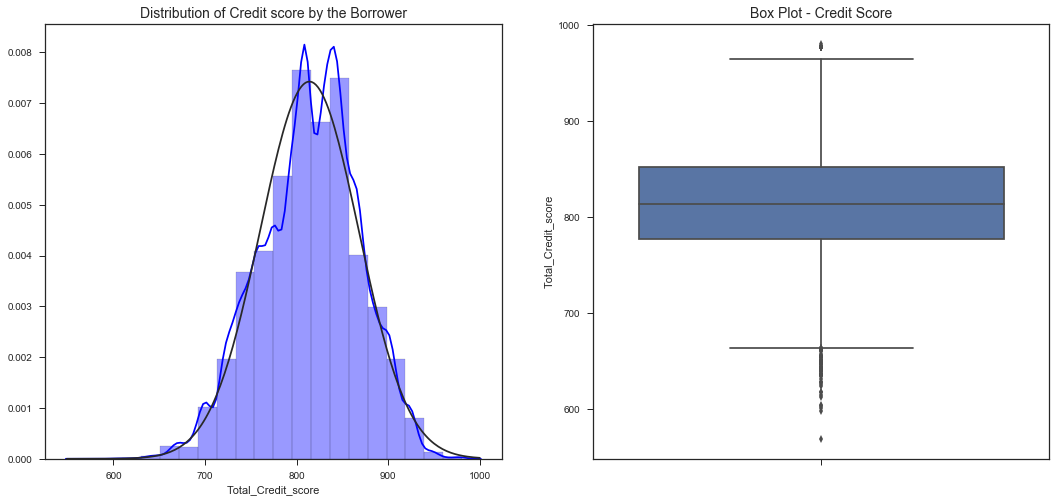

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.distplot(cs_df['Total_Credit_score'], hist = True, kde = True, bins = 20, ax=ax[0] , color = 'blue', 
             hist_kws={'edgecolor':'black'}, fit = norm)
ax[0].set_title('Distribution of Credit score by the Borrower',fontsize=14)
sns.boxplot(y = cs_df['Total_Credit_score'],ax=ax[1])
ax[1].set_title('Box Plot - Credit Score',fontsize=14)

The credit score factor is normally distributed

## Correlation

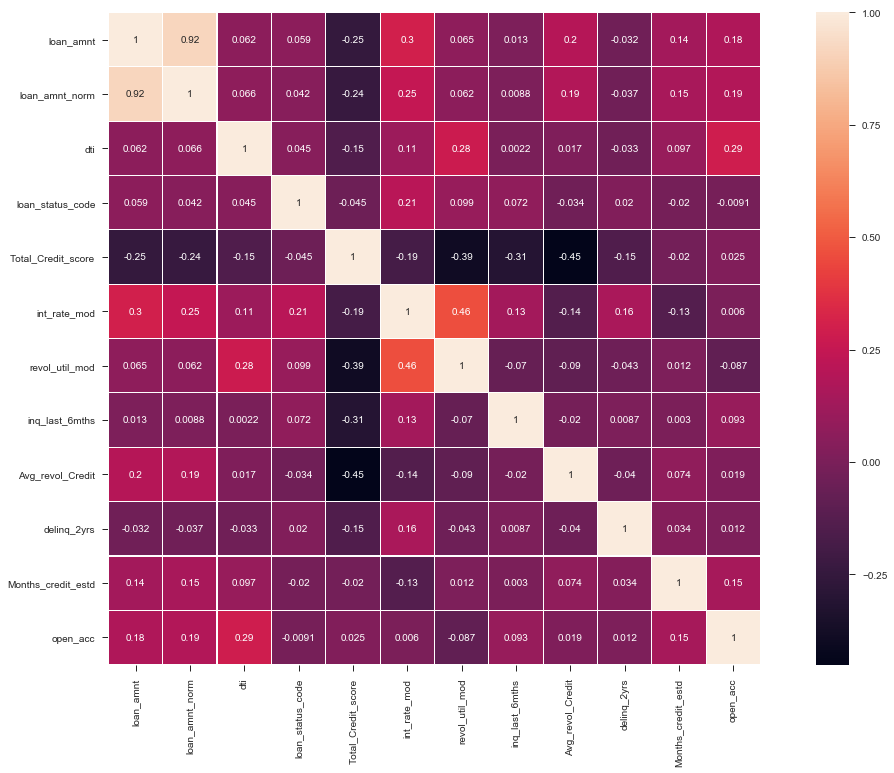

In [175]:
# Correlation plot using Seaborn
plt.figure(figsize=(20,12))

sns.heatmap(score_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, linecolor='white', annot=True)
plt.show()

From the correlation, we can infer only few relationship as strong parameters
 1. Interest rate is related to Revolving credit utilization percentage with a r value of 0.46
 2. Loan amount is somewhat related to the interest rate with a r value or .3
 3 There is some relationship between revolving ustilization percentage and Debt to income ratio 0.29
 4. We also noticed some correlation exists between dti and number of accounts open <br>
 
Overall this derived analysis gives a negative factor of -0.45 with revolving credit  as it influence the risk of credit failure
But with lending bank, there is not specific correlation with the loan status vs credit score.

## Rare Findings

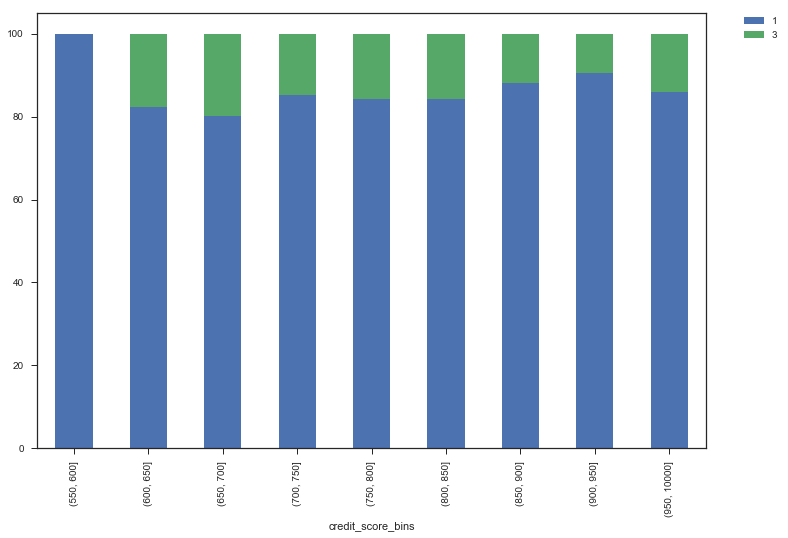

In [176]:
df = score_df.groupby(['credit_score_bins','loan_status_code'], as_index = False).size().unstack('loan_status_code')
percent = df.div(df.sum(1)/100,0)

ax = percent.plot(kind='bar', stacked=True, figsize=(12,8))
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Above graphs between the various credit score bins and the percentage of Satisfied vs defaulted borrowers shown a unique findings
- There is no defaulters in the low credit score, which means the banks had given enough validation to get the loan processed and able to have the customers satisfy the loans
- The defaulters percentage is high in the low score and decreased as the score increases, but the fact that the defaulters are available in all cateogry of score is surprising.
- The main explaration is showing the increased percentage of defaulters when the score is high. This could be an area to investigate more as it was not visible with the raw information


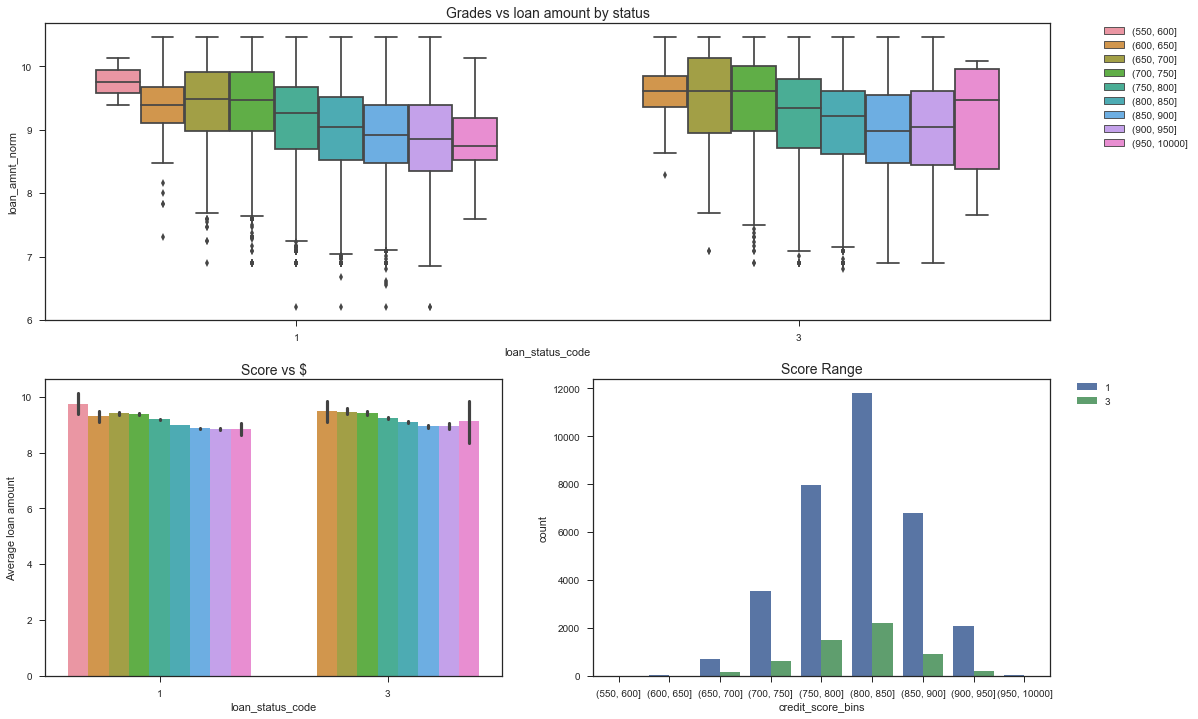

In [177]:
# Now we will check the behavior by Risk score
fig = plt.figure(figsize = (18,12))

gs=GridSpec(2,2)

ax1=fig.add_subplot(gs[0,:]) # First row, span across all columns
ax2=fig.add_subplot(gs[1,0]) # Second row, first column
ax3=fig.add_subplot(gs[1,1]) # Second row, second column

sns.boxplot(x='loan_status_code', y= 'loan_amnt_norm', data = score_df, hue = 'credit_score_bins', ax = ax1)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.set_title('Grades vs loan amount by status', fontsize = 14)

sns.barplot(x='loan_status_code', y= 'loan_amnt_norm', data = score_df, hue = 'credit_score_bins', ax = ax2)
ax2.set_title('Score vs $', fontsize = 14)
ax2.set_ylabel('Average loan amount')
ax2.legend().set_visible(False)

sns.countplot(x='credit_score_bins', data = score_df, hue = 'loan_status_code', ax = ax3)
ax3.set_title('Score Range', fontsize = 14)
#ax3.legend().set_visible(False)
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

The behaviour of Risk score follows the normal distribution as expected.